# Libraries

In [32]:
import pandas as pd
from scipy.io import arff
import numpy as np
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# Load Dataset

Dataset: https://www.openml.org/search?type=data&sort=qualities.NumberOfInstances&status=active&qualities.NumberOfClasses=lte_1&id=42737

In [33]:
# Load from an ARFF file
data = arff.loadarff('../data/fps-in-video-games.arff')

In [34]:
# Convert into DataFrame
df = pd.DataFrame(data[0])

In [35]:
# Get categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['CpuName', 'CpuMultiplierUnlocked', 'GpuName', 'GpuArchitecture',
       'GpuBus nterface', 'GpuDirectX', 'GpuMemoryType', 'GpuOpenCL',
       'GpuOpenGL', 'GpuShaderModel', 'GpuVulkan', 'GameName', 'GameSetting',
       'Dataset'],
      dtype='object')

In [36]:
# Convert bytes to string
for column in categorical_columns:
    df[column] = df[column].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Data Exploration

In [37]:
# Display the first rows
df.head()

CpuName  CpuNumberOfCores  CpuNumberOfThreads  CpuBaseClock  \
0   Intel Core i7-920               4.0                 8.0         133.0   
1   Intel Core i7-920               4.0                 8.0         133.0   
2  Intel Core i5-4690               4.0                 4.0         100.0   
3  Intel Core i5-4690               4.0                 4.0         100.0   
4  Intel Core i5-4690               4.0                 4.0         100.0   

   CpuCacheL1  CpuCacheL2  CpuCacheL3  CpuDieSize  CpuFrequency  \
0       256.0      1024.0         8.0    0.000263        2666.0   
1       256.0      1024.0         8.0    0.000263        2666.0   
2       256.0      1024.0         6.0    0.000177        3400.0   
3       256.0      1024.0         6.0    0.000177        3400.0   
4       256.0      1024.0         6.0    0.000177        3400.0   

   CpuMultiplier CpuMultiplierUnlocked  CpuProcessSize  CpuTDP  \
0           20.0                     0            45.0   130.0   
1           20.0                     0            45.0   130.0   
2           34.0                     0            22.0    84.0   
3           34.0                     0            22.0    84.0   
4           34.0                     0            22.0    84.0   

   CpuNumberOfTransistors  CpuTurboClock                         GpuName  \
0                   731.0         2933.0               AMD Radeon RX 480   
1                   731.0         2933.0               AMD Radeon RX 480   
2                  1400.0         3800.0  NVIDIA GeForce GTX 1080 11Gbps   
3                  1400.0         3800.0  NVIDIA GeForce GTX 1080 11Gbps   
4                  1400.0         3800.0              AMD Radeon R7 260X   

  GpuArchitecture  GpuBandwidth  GpuBaseClock  GpuBoostClock GpuBus nterface  \
0         GCN 4.0      256000.0        1120.0         1266.0    PCIe 3.0 x16   
1         GCN 4.0      256000.0        1120.0         1266.0    PCIe 3.0 x16   
2          Pascal      352300.0        1607.0         1733.0    PCIe 3.0 x16   
3          Pascal      352300.0        1607.0         1733.0    PCIe 3.0 x16   
4         GCN 2.0      104000.0        1100.0         1100.0    PCIe 3.0 x16   

   GpuNumberOfComputeUnits  GpuDieSize GpuDirectX  GpuNumberOfExecutionUnits  \
0                     36.0    0.000232         12                        NaN   
1                     36.0    0.000232         12                        NaN   
2                      NaN    0.000314         12                        NaN   
3                      NaN    0.000314         12                        NaN   
4                     14.0    0.000160         12                        NaN   

   GpuFP32Performance  GpuMemoryBus  GpuMemorySize GpuMemoryType GpuOpenCL  \
0           5834000.0         256.0         8000.0         GDDR5         2   
1           5834000.0         256.0         8000.0         GDDR5         2   
2           8873000.0         256.0         8000.0        GDDR5X       1.2   
3           8873000.0         256.0         8000.0        GDDR5X       1.2   
4           1971000.0         128.0         2000.0         GDDR5         2   

  GpuOpenGL  GpuPixelRate  GpuProcessSize  GpuNumberOfROPs GpuShaderModel  \
0       4.6       40510.0            14.0             32.0            6.4   
1       4.6       40510.0            14.0             32.0            6.4   
2       4.6      110900.0            16.0             64.0            6.4   
3       4.6      110900.0            16.0             64.0            6.4   
4       4.6       17600.0            28.0             16.0            6.3   

   GpuNumberOfShadingUnits  GpuNumberOfTMUs  GpuTextureRate  \
0                   2304.0            144.0        182300.0   
1                   2304.0            144.0        182300.0   
2                   2560.0            160.0        277300.0   
3                   2560.0            160.0        277300.0   
4                    896.0             56.0         61600.0   

   GpuNumberOfTransis

In [38]:
# Display the last rows
df.tail()

CpuName  CpuNumberOfCores  CpuNumberOfThreads  CpuBaseClock  \
425828   AMD Ryzen 5 3600               6.0                12.0         100.0   
425829  AMD Ryzen 5 2600X               6.0                12.0         100.0   
425830  AMD Ryzen 5 1600X               6.0                12.0         100.0   
425831   AMD Ryzen 5 2600               6.0                12.0         100.0   
425832  AMD Ryzen 7 1700X               8.0                16.0         100.0   

        CpuCacheL1  CpuCacheL2  CpuCacheL3  CpuDieSize  CpuFrequency  \
425828       576.0      3072.0        32.0    0.000074        3600.0   
425829       576.0      3072.0        16.0    0.000192        3600.0   
425830       576.0      3072.0        16.0    0.000192        3600.0   
425831       576.0      3072.0        16.0    0.000192        3400.0   
425832       768.0      4096.0        16.0    0.000192        3400.0   

        CpuMultiplier CpuMultiplierUnlocked  CpuProcessSize  CpuTDP  \
425828           36.0                     1             7.0    65.0   
425829           36.0                     1            12.0    95.0   
425830           36.0                     1            14.0    95.0   
425831           34.0                     1            12.0    65.0   
425832           34.0                     1            14.0    95.0   

        CpuNumberOfTransistors  CpuTurboClock            GpuName  \
425828                  3800.0         4200.0  AMD Radeon RX 570   
425829                  4800.0         4250.0  AMD Radeon RX 570   
425830                  4800.0         4000.0  AMD Radeon RX 570   
425831                  4800.0         3900.0  AMD Radeon RX 570   
425832                  4800.0         3800.0  AMD Radeon RX 570   

       GpuArchitecture  GpuBandwidth  GpuBaseClock  GpuBoostClock  \
425828         GCN 4.0      224000.0        1168.0         1244.0   
425829         GCN 4.0      224000.0        1168.0         1244.0   
425830         GCN 4.0      224000.0        1168.0         1244.0   
425831         GCN 4.0      224000.0        1168.0         1244.0   
425832         GCN 4.0      224000.0        1168.0         1244.0   

       GpuBus nterface  GpuNumberOfComputeUnits  GpuDieSize GpuDirectX  \
425828    PCIe 3.0 x16                     32.0    0.000232         12   
425829    PCIe 3.0 x16                     32.0    0.000232         12   
425830    PCIe 3.0 x16                     32.0    0.000232         12   
425831    PCIe 3.0 x16                     32.0    0.000232         12   
425832    PCIe 3.0 x16                     32.0    0.000232         12   

        GpuNumberOfExecutionUnits  GpuFP32Performance  GpuMemoryBus  \
425828                        NaN           5095000.0         256.0   
425829                        NaN           5095000.0         256.0   
425830                        NaN           5095000.0         256.0   
425831                        NaN           5095000.0         256.0   
425832                        NaN           5095000.0         256.0   

        GpuMemorySize GpuMemoryType GpuOpenCL GpuOpenGL  GpuPixelRate  \
425828         4000.0         GDDR5         2       4.6       39810.0   
425829         4000.0         GDDR5         2       4.6       39810.0   
425830         4000.0         GDDR5         2       4.6       39810.0   
425831         4000.0         GDDR5         2       4.6       39810.0   
425832         4000.0         GDDR5         2       4.6       39810.0   

        GpuProcessSize  GpuNumberOfROPs GpuShaderModel  \
425828            14.0             32.0            6.4   
425829            14.0             32.0            6.4   
425830            14.0             32.0            6.4   
425831            14.0             32.0            6.4   
425832            14.0             32.0            6.4   

        GpuNumberOfShadingUnits  GpuNumberOfTMUs  GpuTextureRate  \
425828                   2048.0            128.0        159200.0   
425829                   2048.0            128.0   

In [39]:
# Checking the number of rows and columns
df.shape

(425833, 45)

In [40]:
# Get the name of the columns 
df.columns

Index(['CpuName', 'CpuNumberOfCores', 'CpuNumberOfThreads', 'CpuBaseClock',
       'CpuCacheL1', 'CpuCacheL2', 'CpuCacheL3', 'CpuDieSize', 'CpuFrequency',
       'CpuMultiplier', 'CpuMultiplierUnlocked', 'CpuProcessSize', 'CpuTDP',
       'CpuNumberOfTransistors', 'CpuTurboClock', 'GpuName', 'GpuArchitecture',
       'GpuBandwidth', 'GpuBaseClock', 'GpuBoostClock', 'GpuBus nterface',
       'GpuNumberOfComputeUnits', 'GpuDieSize', 'GpuDirectX',
       'GpuNumberOfExecutionUnits', 'GpuFP32Performance', 'GpuMemoryBus',
       'GpuMemorySize', 'GpuMemoryType', 'GpuOpenCL', 'GpuOpenGL',
       'GpuPixelRate', 'GpuProcessSize', 'GpuNumberOfROPs', 'GpuShaderModel',
       'GpuNumberOfShadingUnits', 'GpuNumberOfTMUs', 'GpuTextureRate',
       'GpuNumberOfTransistors', 'GpuVulkan', 'GameName', 'GameResolution',
       'GameSetting', 'Dataset', 'FPS'],
      dtype='object')

In [41]:
# Checking basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425833 entries, 0 to 425832
Data columns (total 45 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CpuName                    425833 non-null  object 
 1   CpuNumberOfCores           425833 non-null  float64
 2   CpuNumberOfThreads         425833 non-null  float64
 3   CpuBaseClock               425833 non-null  float64
 4   CpuCacheL1                 425833 non-null  float64
 5   CpuCacheL2                 425833 non-null  float64
 6   CpuCacheL3                 420778 non-null  float64
 7   CpuDieSize                 223299 non-null  float64
 8   CpuFrequency               425833 non-null  float64
 9   CpuMultiplier              425833 non-null  float64
 10  CpuMultiplierUnlocked      425833 non-null  object 
 11  CpuProcessSize             425833 non-null  float64
 12  CpuTDP                     425833 non-null  float64
 13  CpuNumberOfTransistors     19

In [42]:
# Looking at descriptive statistics
df.describe().T

count          mean           std           min  \
CpuNumberOfCores           425833.0  4.879042e+00  1.722288e+00      1.000000   
CpuNumberOfThreads         425833.0  7.893435e+00  3.838796e+00      1.000000   
CpuBaseClock               425833.0  1.085957e+02  2.817399e+01    100.000000   
CpuCacheL1                 425833.0  3.481523e+02  1.683798e+02     64.000000   
CpuCacheL2                 425833.0  1.989471e+03  1.805838e+03    512.000000   
CpuCacheL3                 420778.0  9.626468e+00  6.103498e+00      2.000000   
CpuDieSize                 223299.0  1.944811e-04  6.125670e-05      0.000074   
CpuFrequency               425833.0  3.495853e+03  4.459820e+02   1500.000000   
CpuMultiplier              425833.0  3.342225e+01  6.455594e+00      8.000000   
CpuProcessSize             425833.0  1.729602e+01  7.029708e+00      7.000000   
CpuTDP                     425833.0  8.136545e+01  2.206849e+01     10.000000   
CpuNumberOfTransistors     199794.0  2.745347e+03  1.757615e+03    105.000000   
CpuTurboClock              425833.0  3.998218e+03  4.907809e+02   1600.000000   
GpuBandwidth               410392.0  2.508934e+05  1.182169e+05   4256.000000   
GpuBaseClock               425833.0  1.283728e+03  3.226468e+02    100.000000   
GpuBoostClock              425833.0  1.443066e+03  2.997737e+02    350.000000   
GpuNumberOfComputeUnits     68726.0  2.954294e+01  1.321213e+01      1.000000   
GpuDieSize                 414637.0  2.887840e-04  1.254364e-04      0.000056   
GpuNumberOfExecutionUnits   12898.0  2.208839e+01  8.404941e+00      6.000000   
GpuFP32Performance         425777.0  5.281301e+06  3.041677e+06  20800.000000   
GpuMemoryBus               410392.0  2.477259e+02  2.145917e+02     32.000000   
GpuMemorySize              410392.0  6.034502e+03  2.707272e+03    128.000000   
GpuPixelRate               425833.0  7.331663e+04  3.860308e+04    425.000000   
GpuProcessSize             425833.0  1.851175e+01  7.090753e+00      7.000000   
GpuNumberOfROPs            425833.0  4.847946e+01  2.160716e+01      1.000000   
GpuNumberOfShadingUnits    425777.0  1.749804e+03  9.068049e+02      8.000000   
GpuNumberOfTMUs            425833.0  1.111653e+02  5.546864e+01      2.000000   
GpuTextureRate             425833.0  1.666997e+05  9.352237e+04    850.000000   
GpuNumberOfTransistors     414294.0  5.994061e+03  3.076806e+03     75.000000   
GameResolution             425833.0  1.065088e+03  1.626612e+02    720.000000   
FPS                        425833.0  1.385457e+02  8.781819e+01      0.000000   

                                    25%           50%           75%  \
CpuNumberOfCores           4.000000e+00  4.000000e+00  6.000000e+00   
CpuNumberOfThreads         4.000000e+00  8.000000e+00  1.200000e+01   
CpuBaseClock               1.000000e+02  1.000000e+02  1.000000e+02   
CpuCacheL1                 2.560000e+02  2.560000e+02  3.840000e+02   
CpuCacheL2                 1.024000e+03  1.024000e+03  2.048000e+03   
CpuCacheL3                 6.000000e+00  8.000000e+00  1.200000e+01   
CpuDieSize                 1.770000e-04  1.920000e-04  1.920000e-04   
CpuFrequency               3.300000e+03  3.500000e+03  3.700000e+03   
CpuMultiplier              3.200000e+01  3.500000e+01  3.700000e+01   
CpuProcessSize             1.400000e+01  1.400000e+01  2.200000e+01   
CpuTDP                     6.500000e+01  8.800000e+01  9.500000e+01   
CpuNumberOfTransistors     1.200000e+03  1.400000e+03  4.800000e+03   
CpuTurboClock              3.700000e+03  4.000000e+03  4.350000e+03   
GpuBandwidth               1.923000e+05  2.400000e+05  3.360000e+05   
GpuBaseClock               1.050000e+03  1.410000e+03  1.506000e+03   
GpuBoostClock              1.178000e+03  1.582000e+03  1.709000e+03   
GpuNumberOfComputeUnits    2.000000e+01  3.600000e+01  3.600000e+01   
GpuDieSize                 2.000000e-04  3.140000e-04  3.320000e-04   
GpuNumberOfExecutionUnits  2.400000e+01  2.400000e+01  2.400000e+01   
GpuFP32Performanc

In [43]:
# Checking missing values
df.isna().sum()/df.shape[0]*100

CpuName                       0.000000
CpuNumberOfCores              0.000000
CpuNumberOfThreads            0.000000
CpuBaseClock                  0.000000
CpuCacheL1                    0.000000
CpuCacheL2                    0.000000
CpuCacheL3                    1.187085
CpuDieSize                   47.561838
CpuFrequency                  0.000000
CpuMultiplier                 0.000000
CpuMultiplierUnlocked         0.000000
CpuProcessSize                0.000000
CpuTDP                        0.000000
CpuNumberOfTransistors       53.081607
CpuTurboClock                 0.000000
GpuName                       0.000000
GpuArchitecture               0.000000
GpuBandwidth                  3.626069
GpuBaseClock                  0.000000
GpuBoostClock                 0.000000
GpuBus nterface               0.000000
GpuNumberOfComputeUnits      83.860809
GpuDieSize                    2.629200
GpuDirectX                    0.000000
GpuNumberOfExecutionUnits    96.971113
GpuFP32Performance       

In [44]:
# Quantity of unique values
df.duplicated().value_counts()

True     222898
False    202935
Name: count, dtype: int64

# Data Analysis Report

In [45]:
# Generating report using sweetviz
report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)


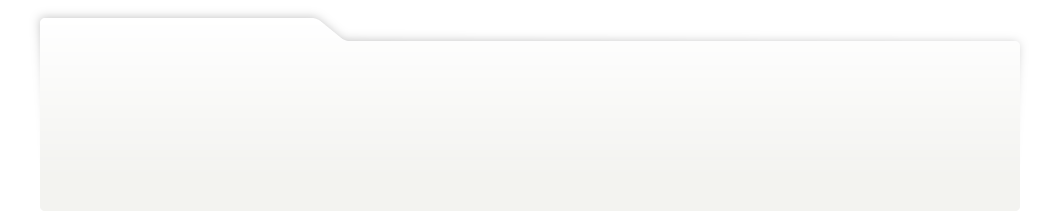
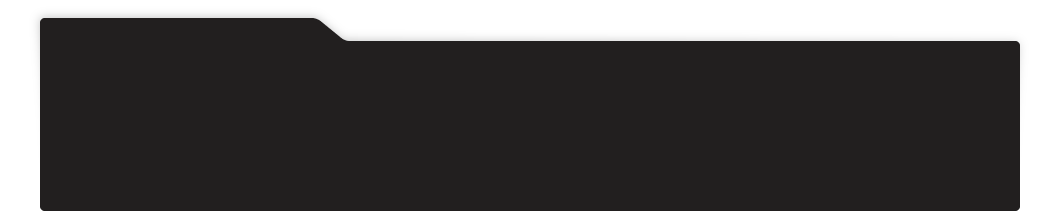
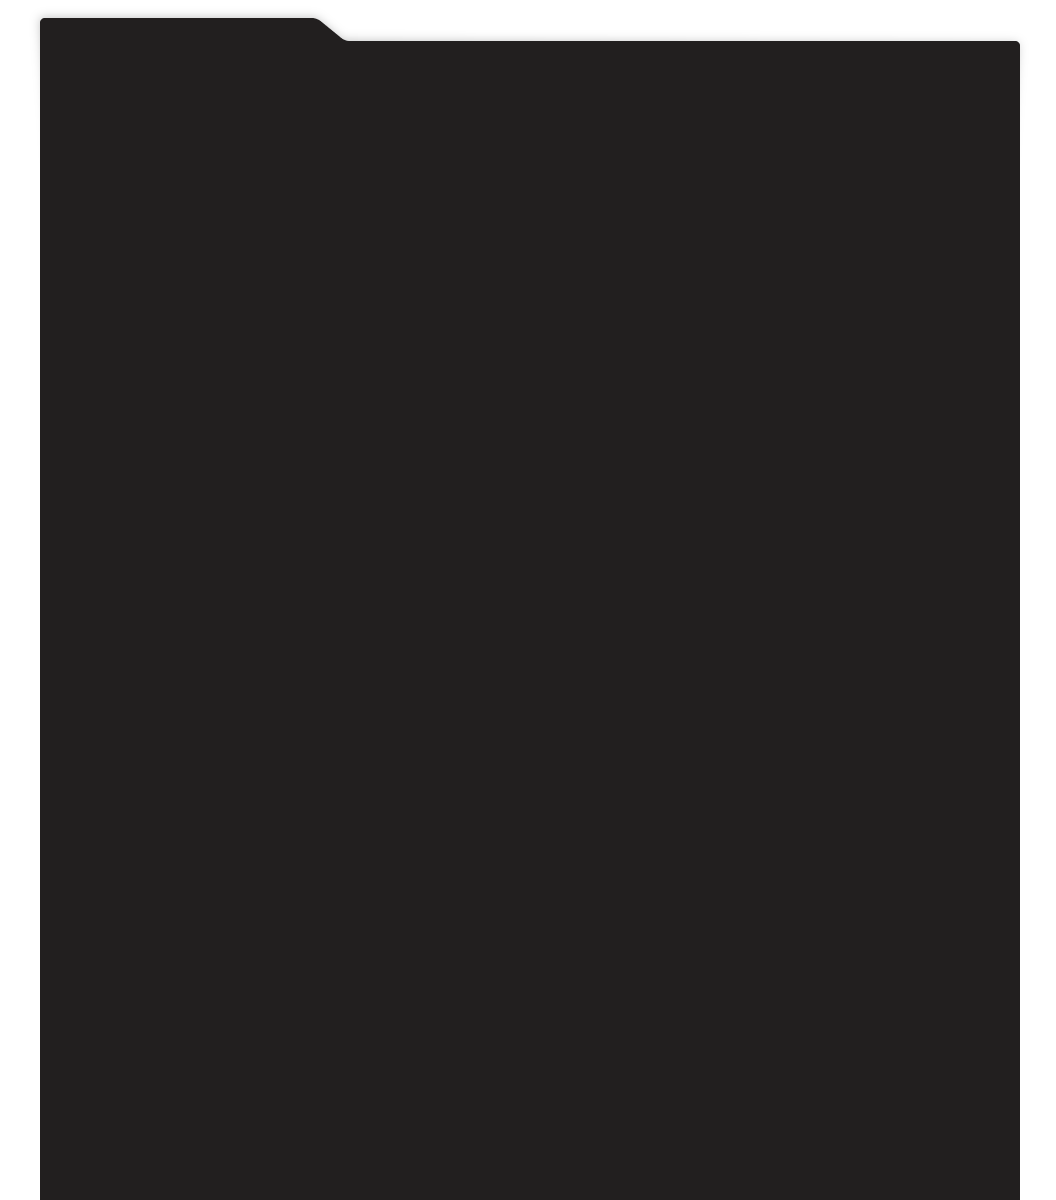
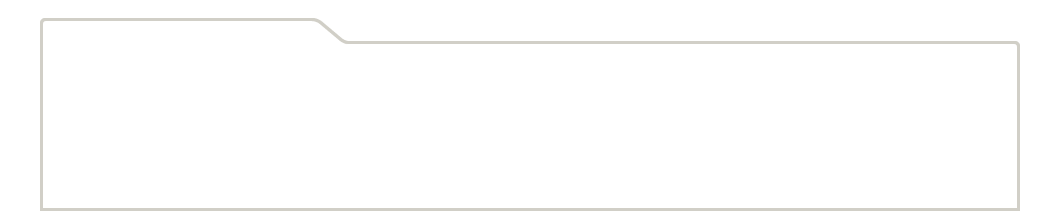
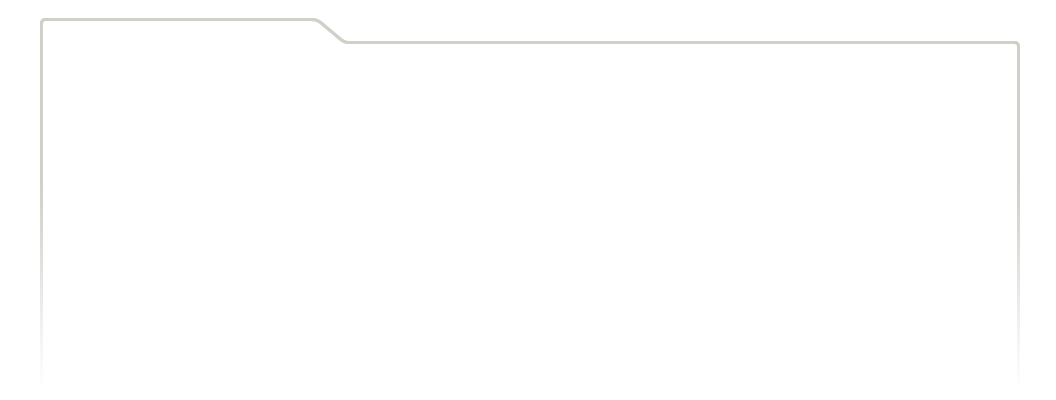
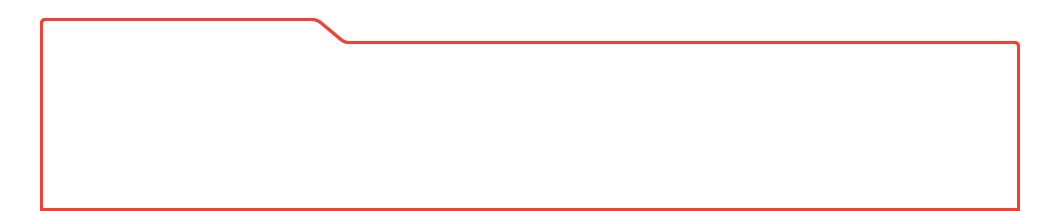
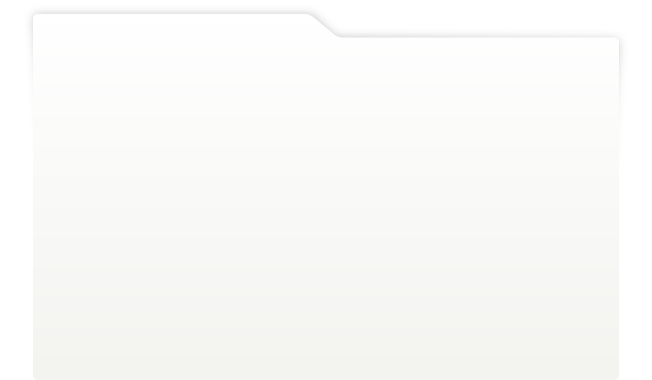
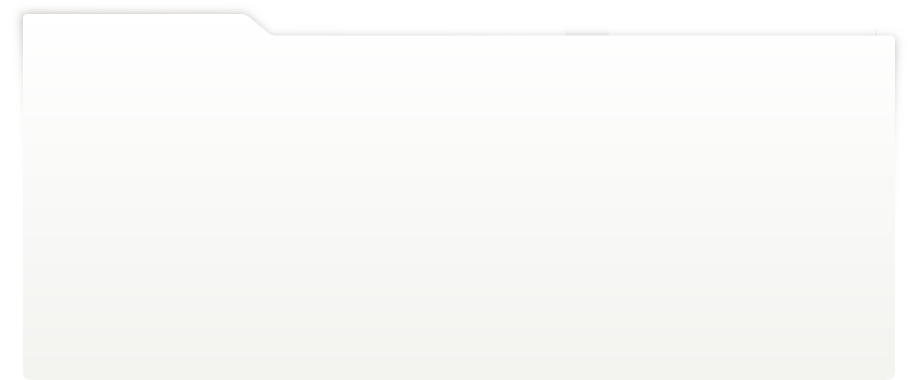
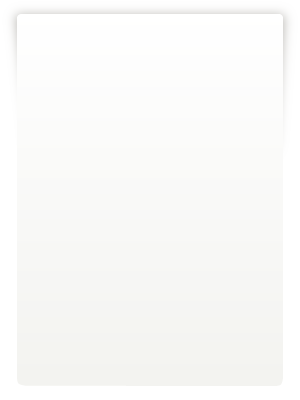
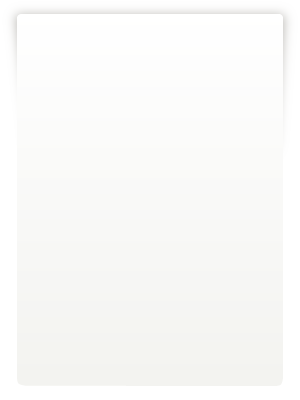
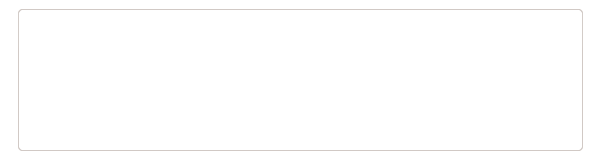
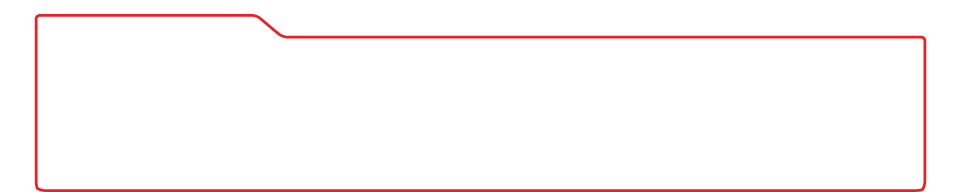
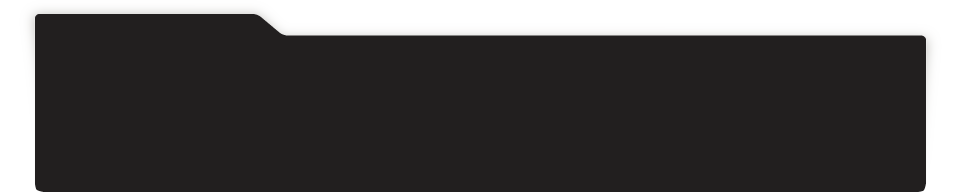
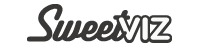
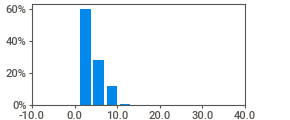
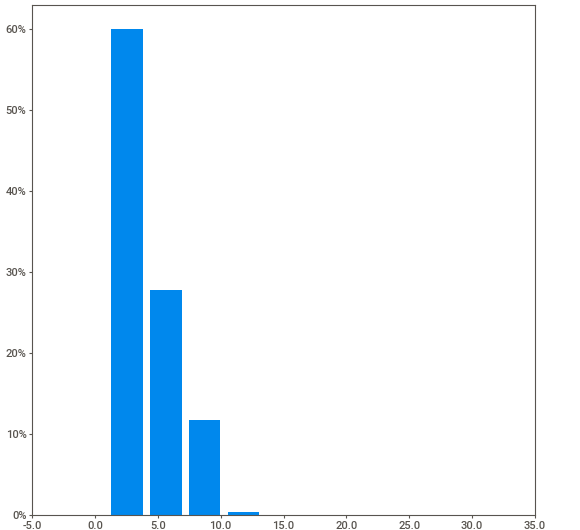
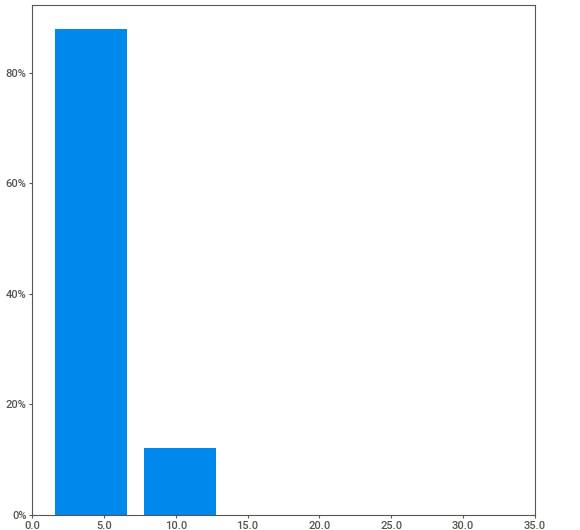
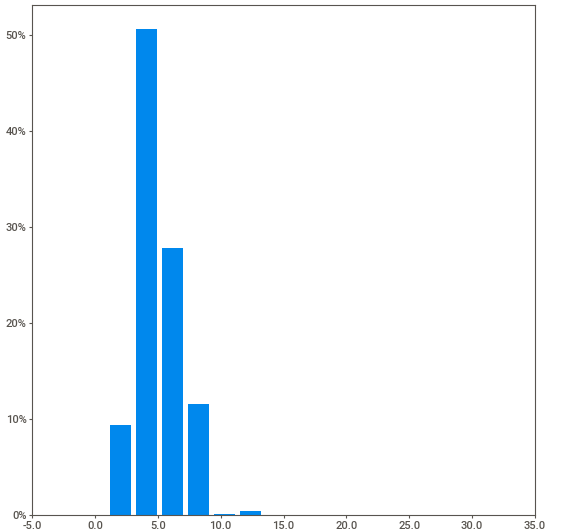
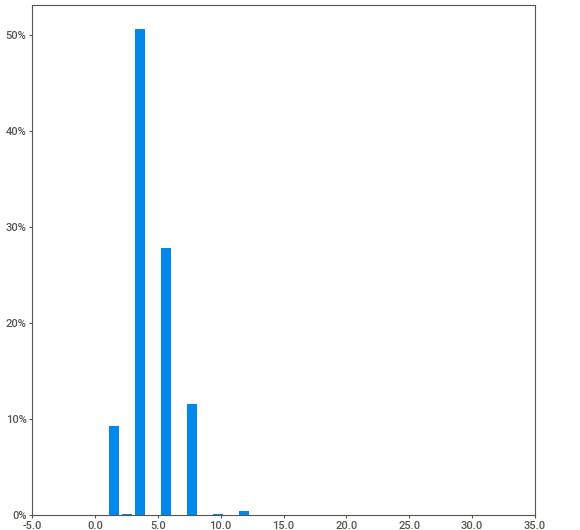
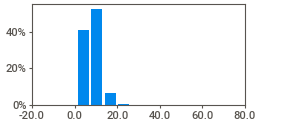
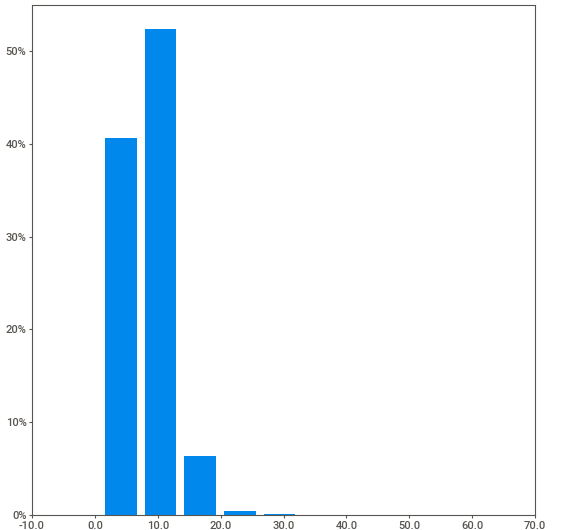
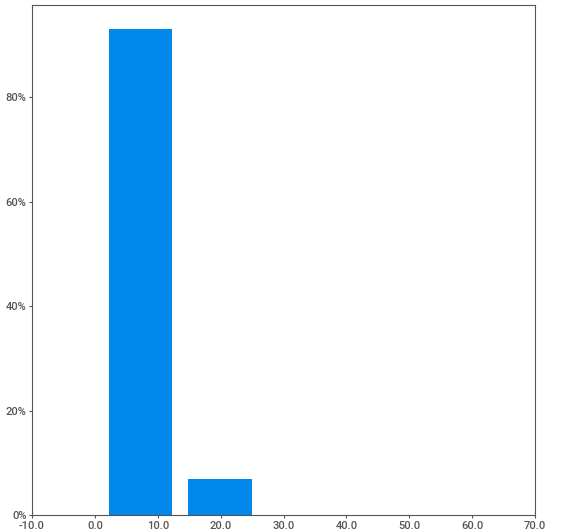
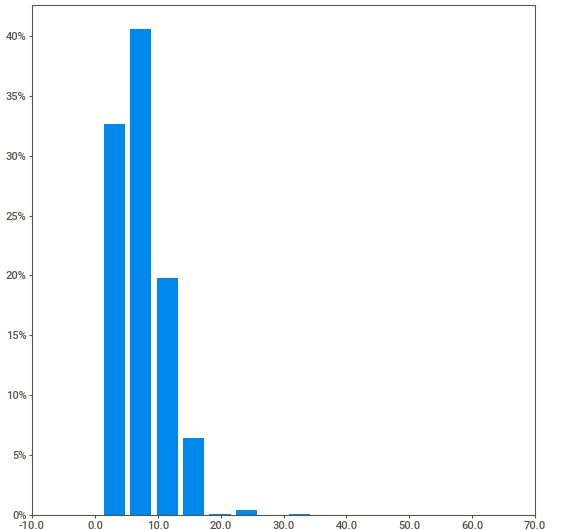
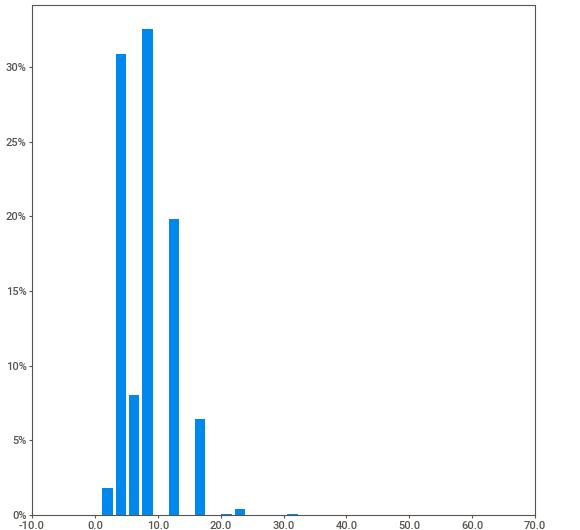
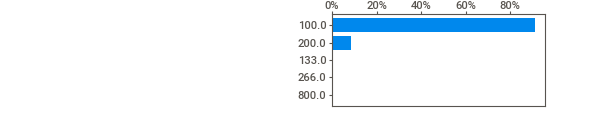
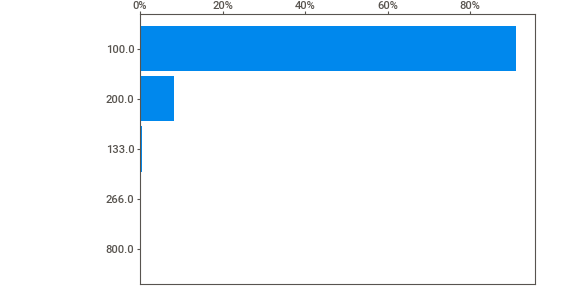
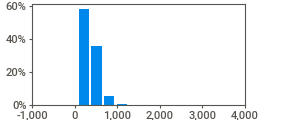
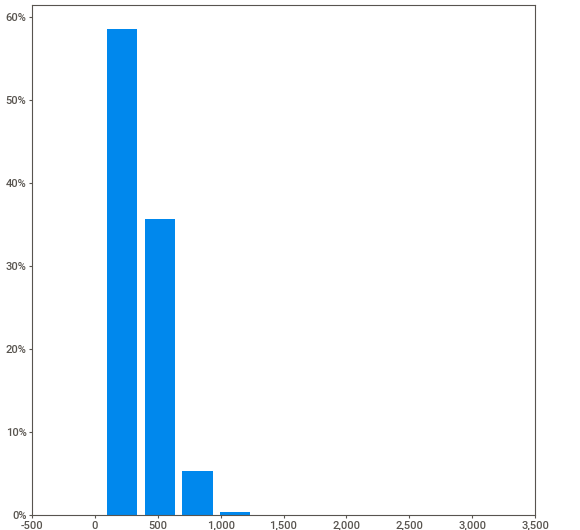
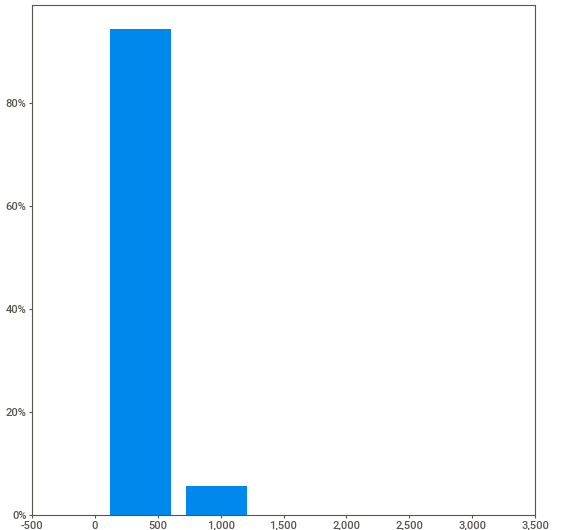
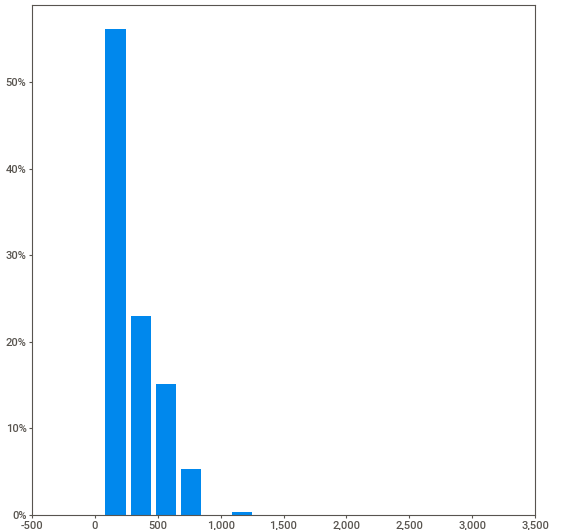
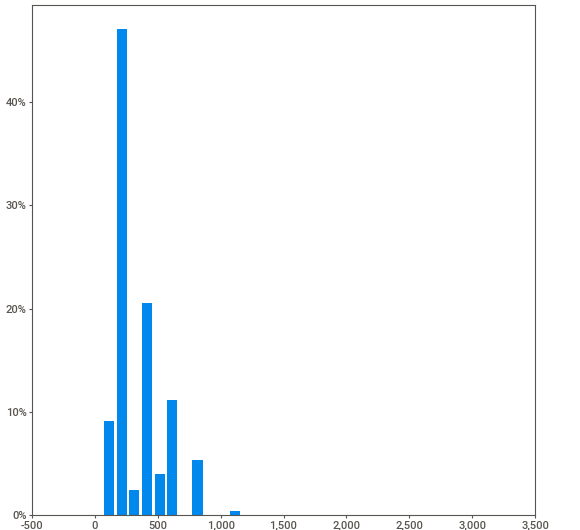
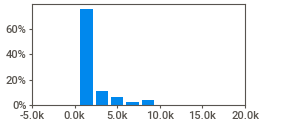
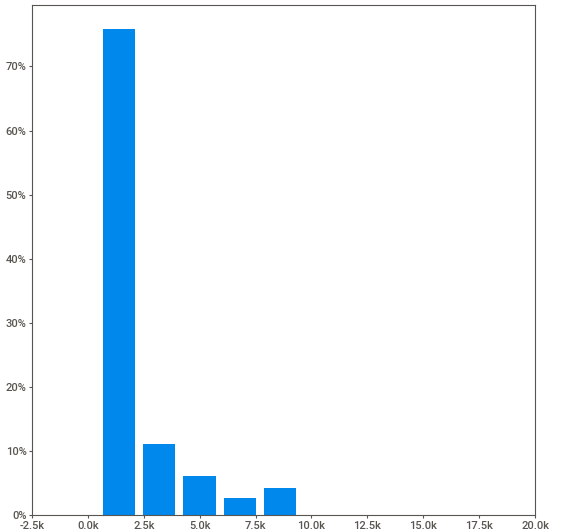
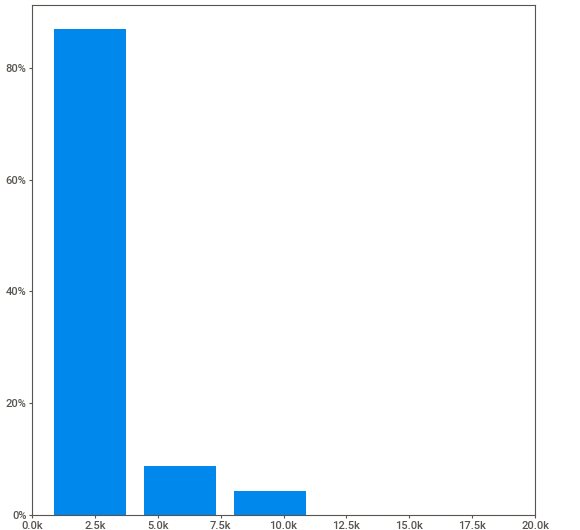
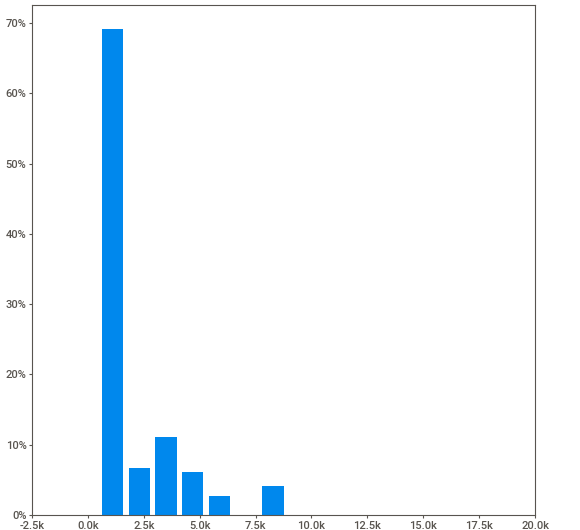
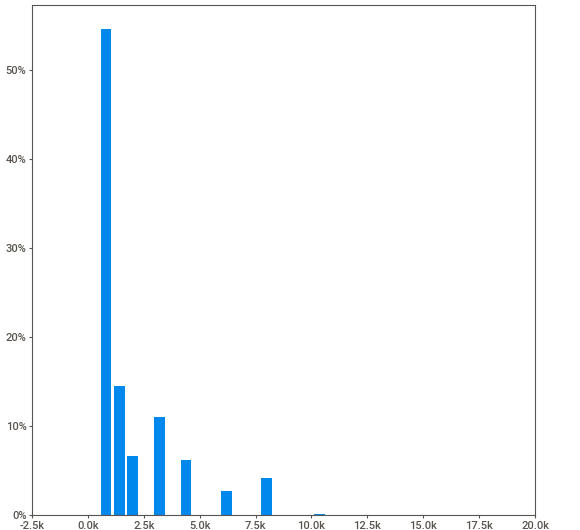
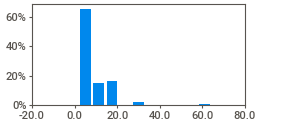
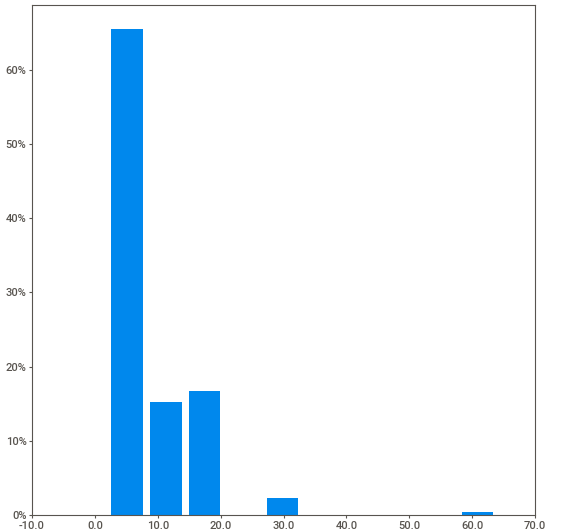
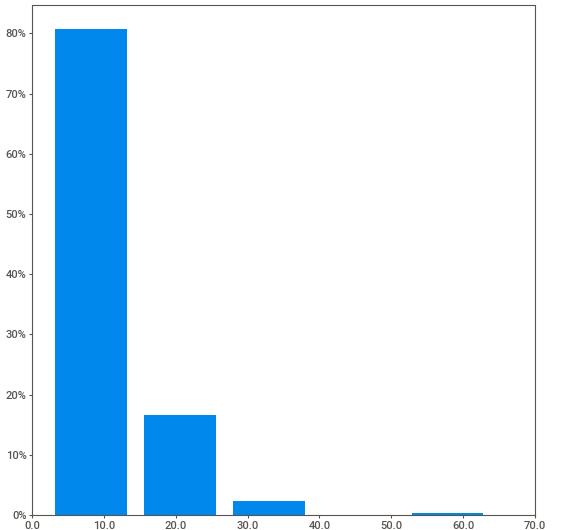
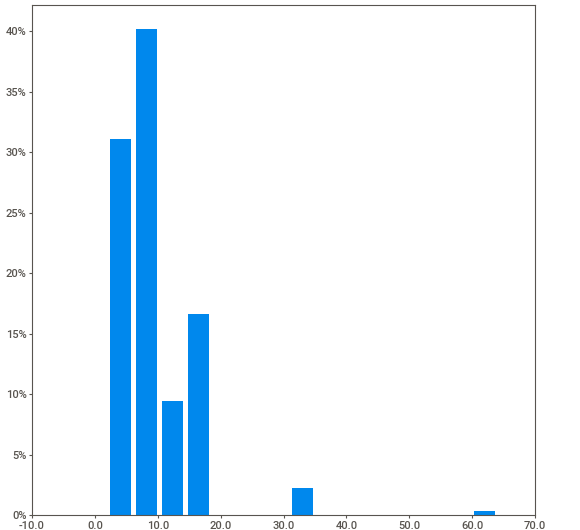
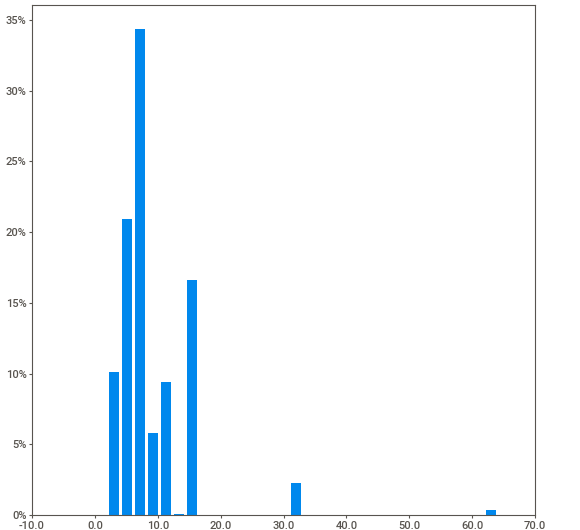
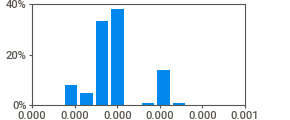
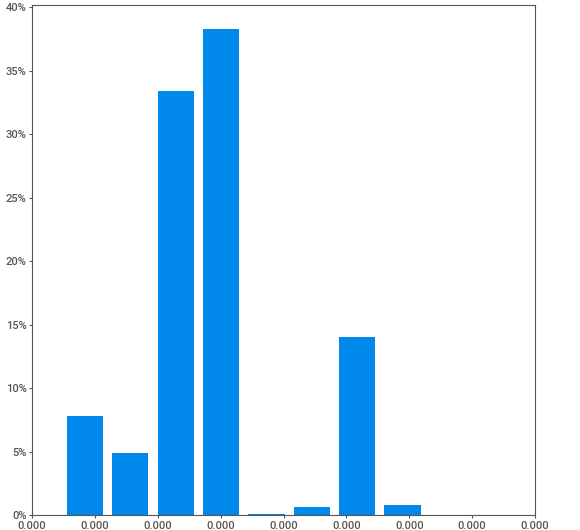
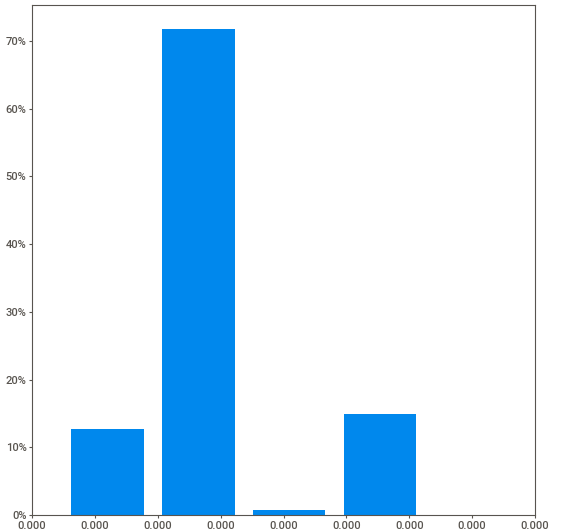
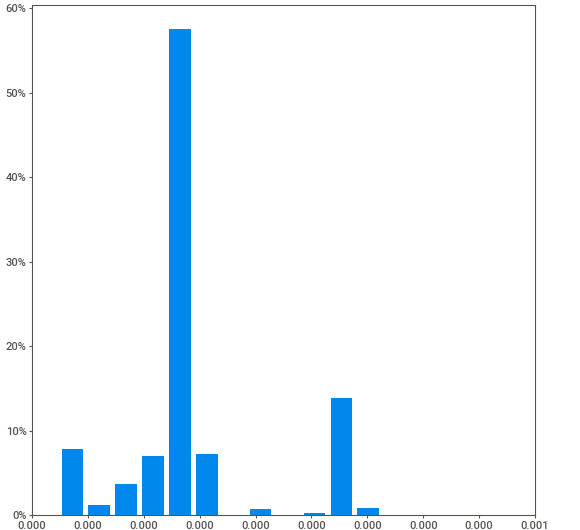
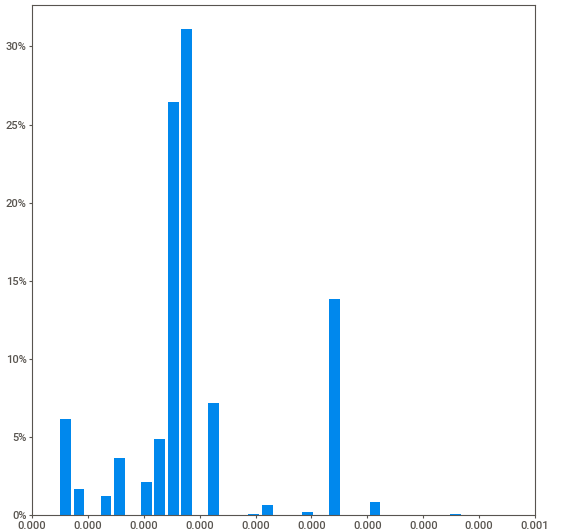
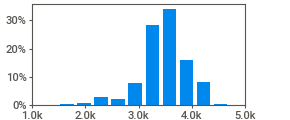
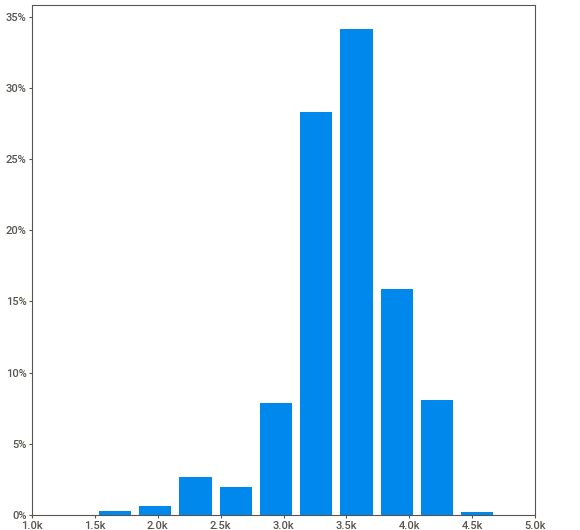
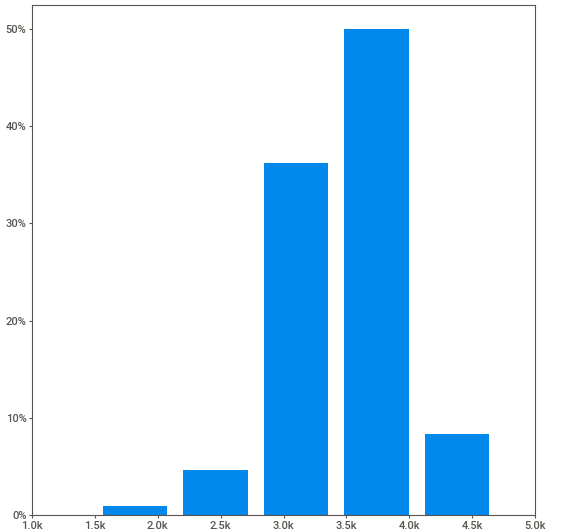
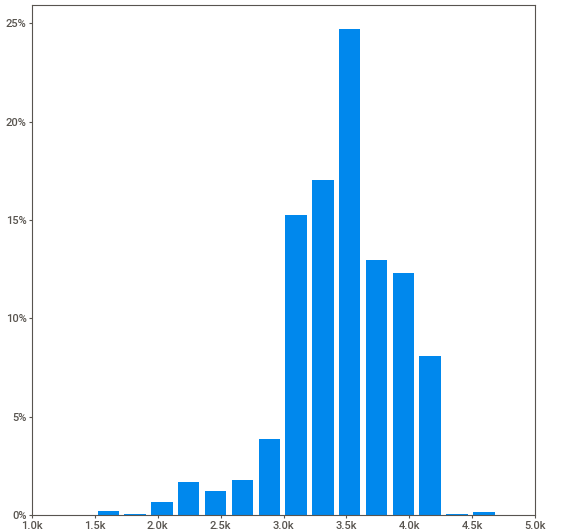
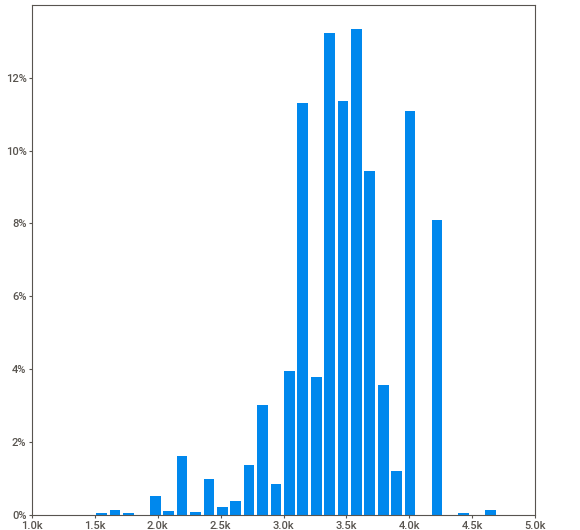
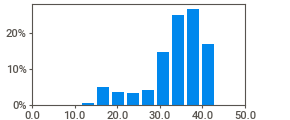
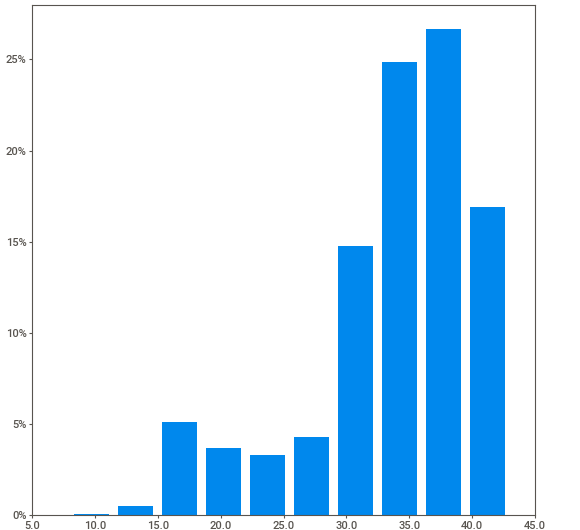
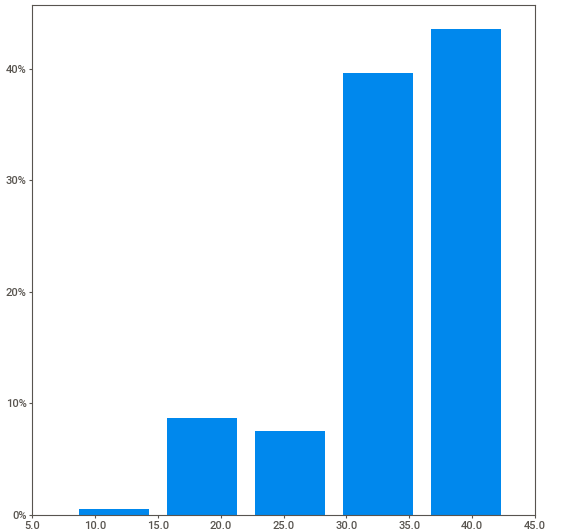
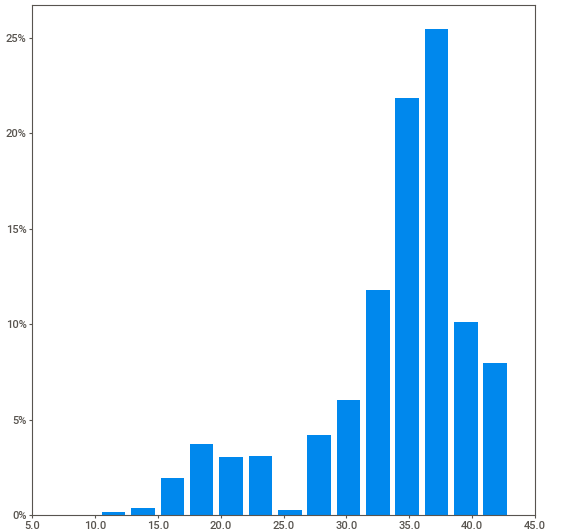
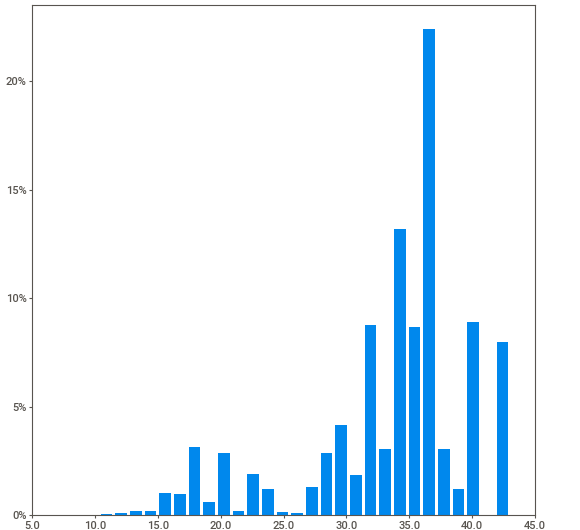
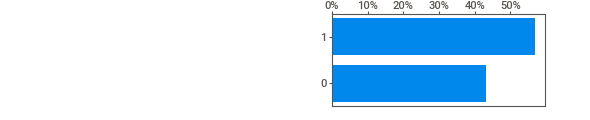
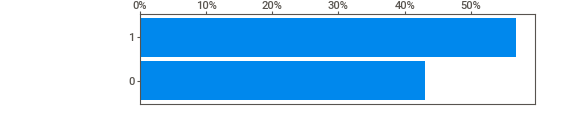
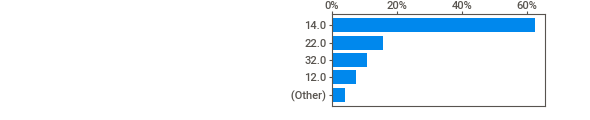
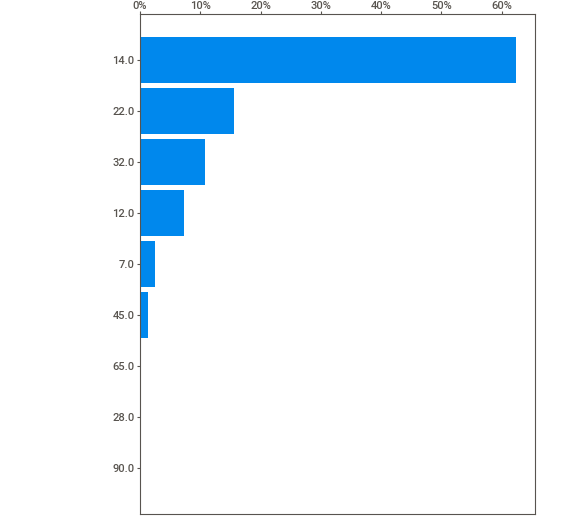
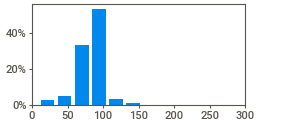
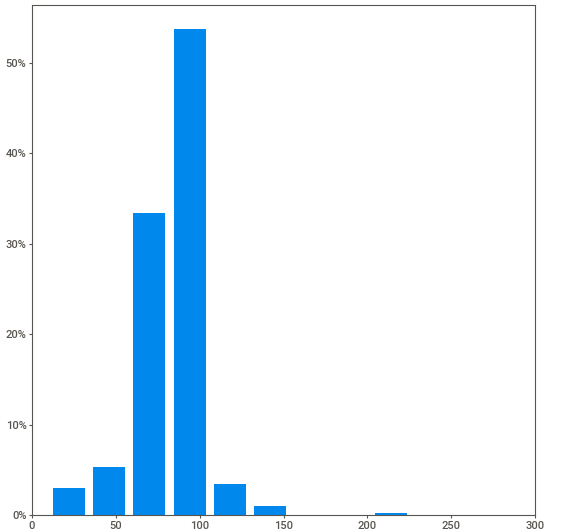
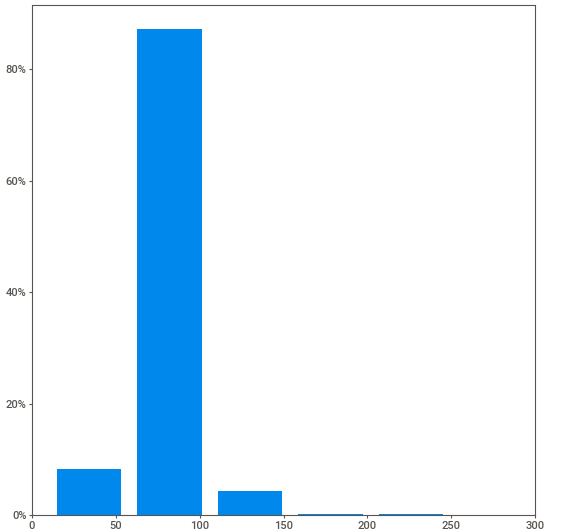
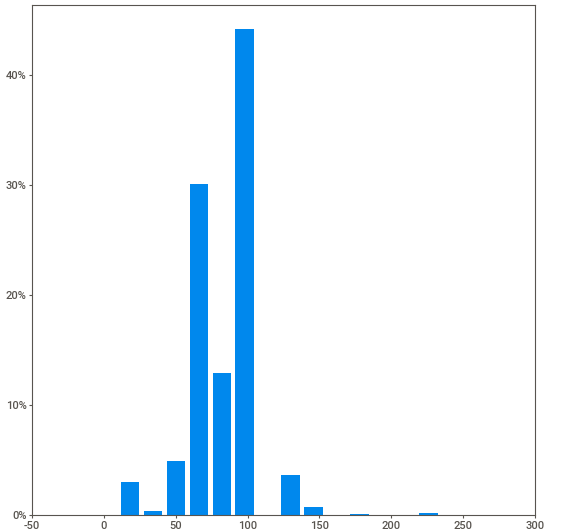
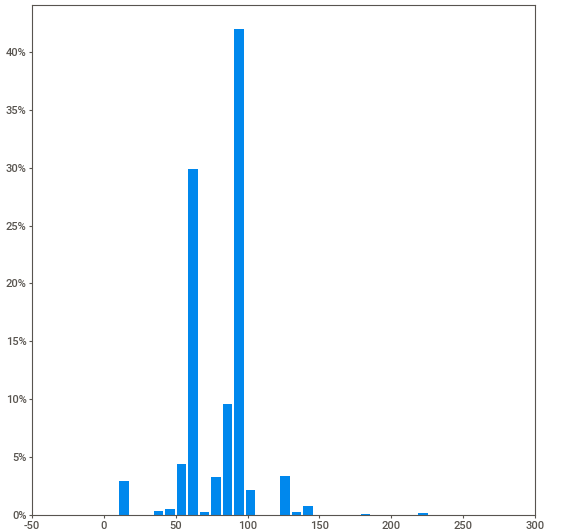
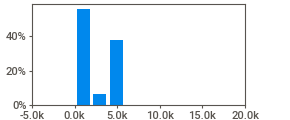
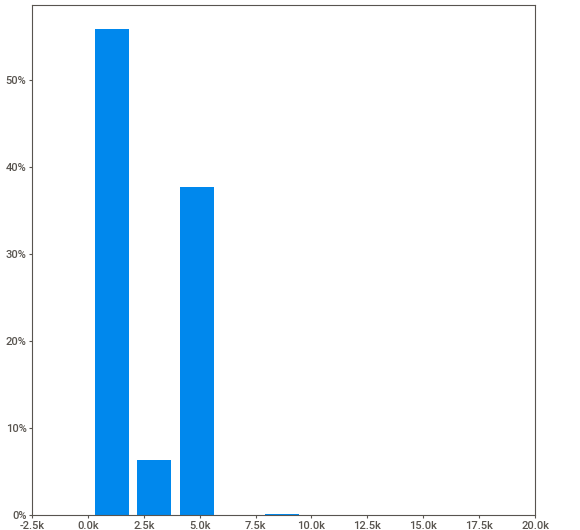
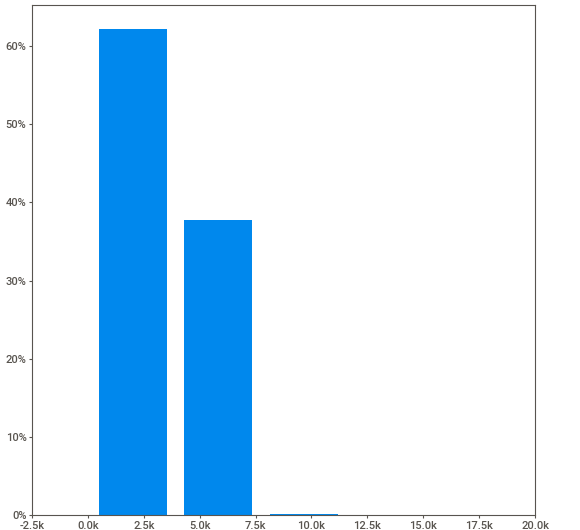
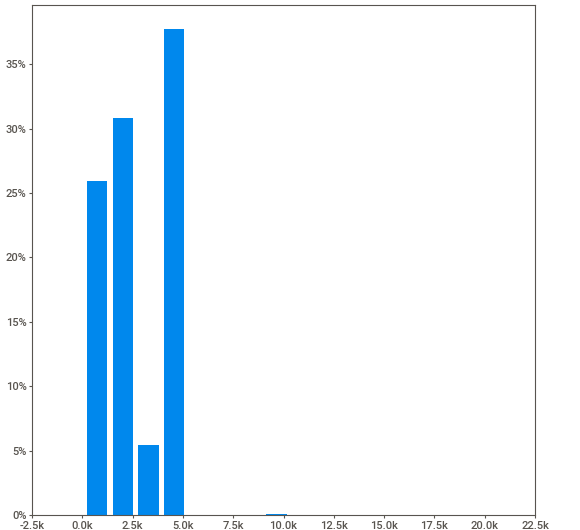
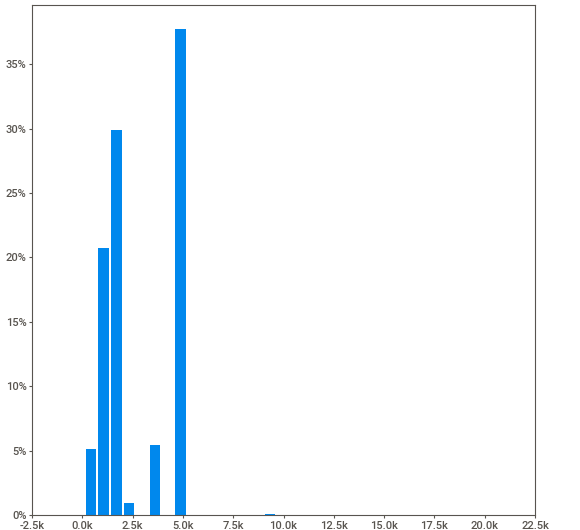
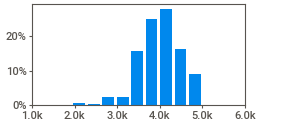
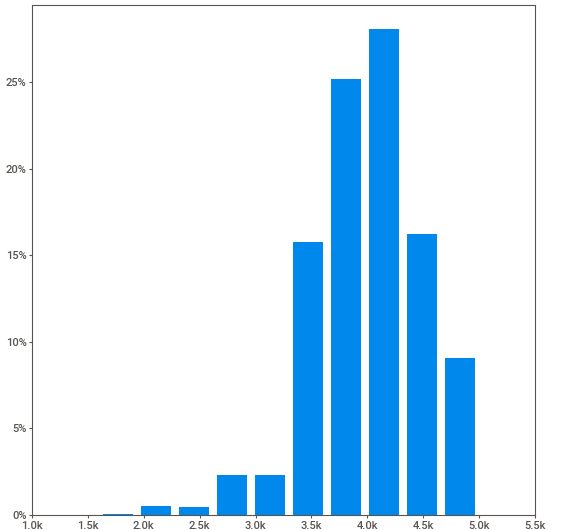
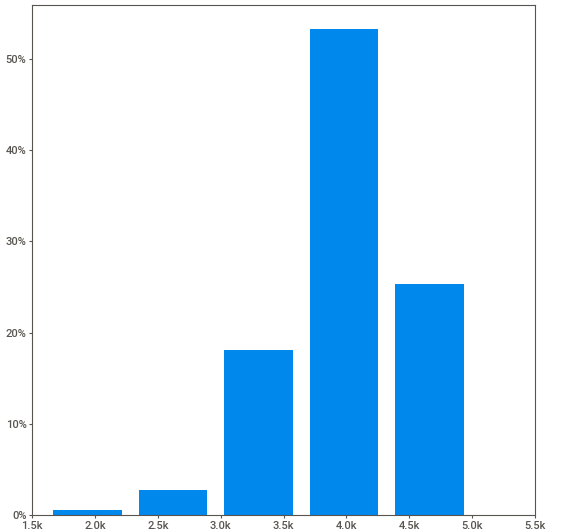
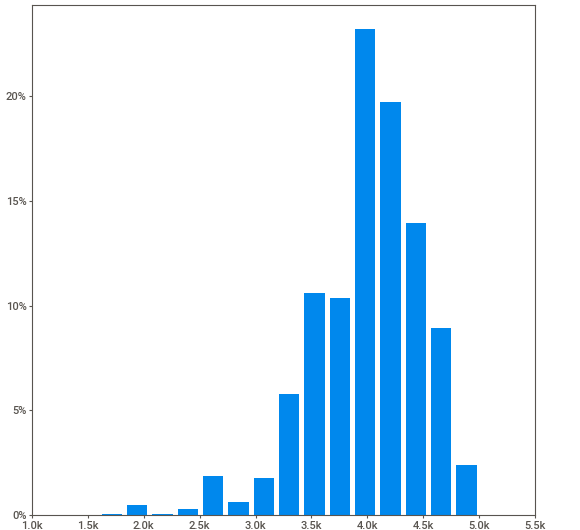
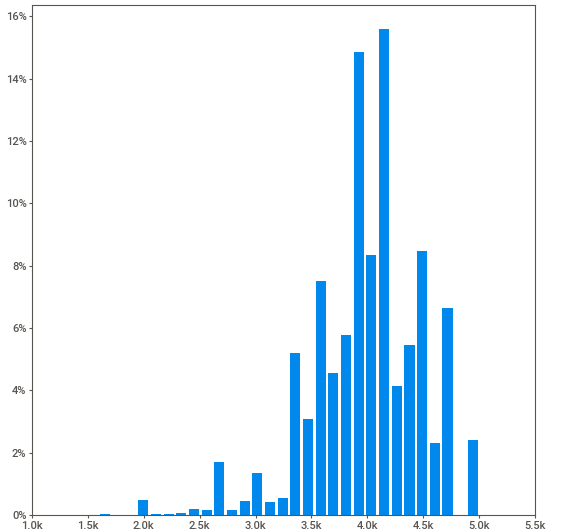
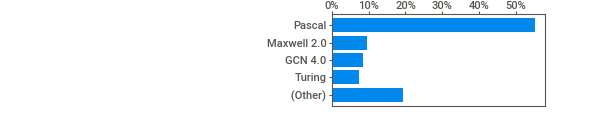
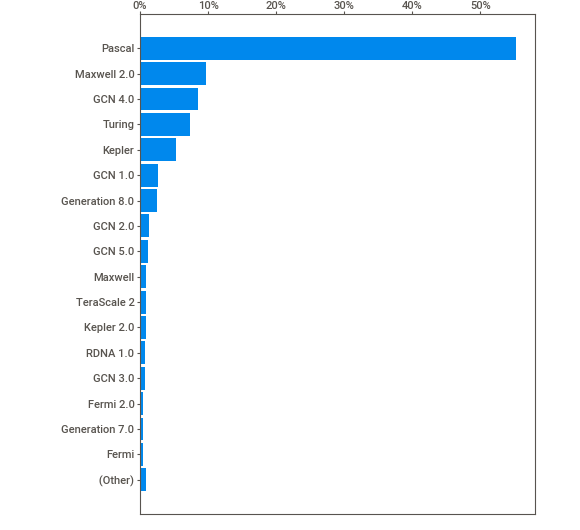
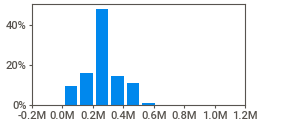
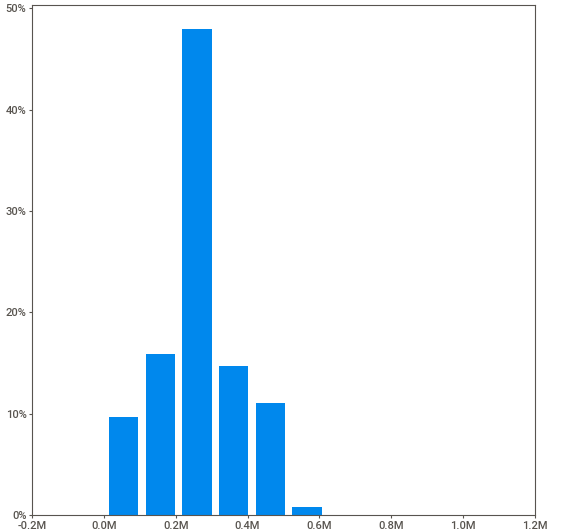
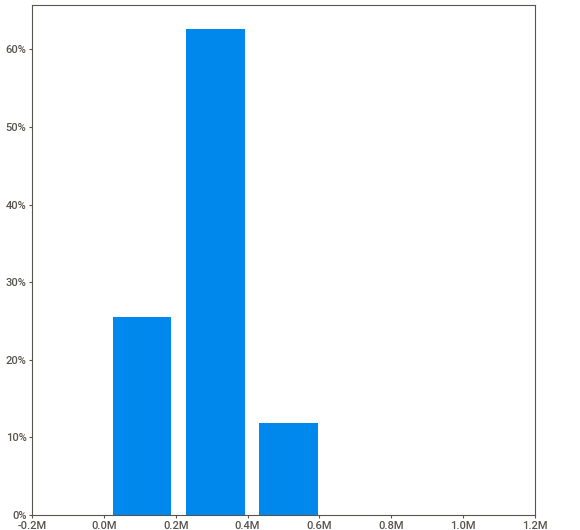
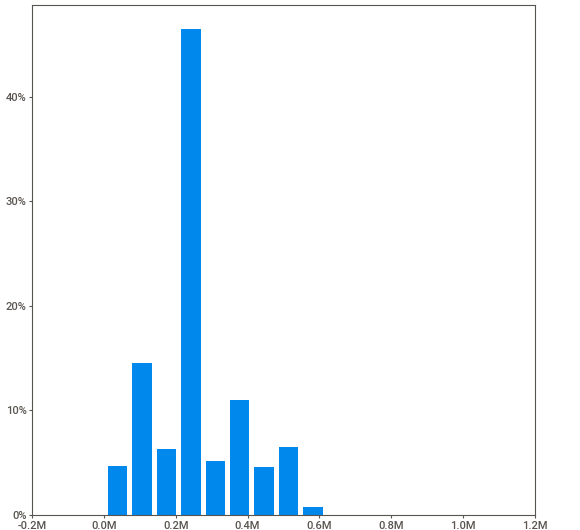
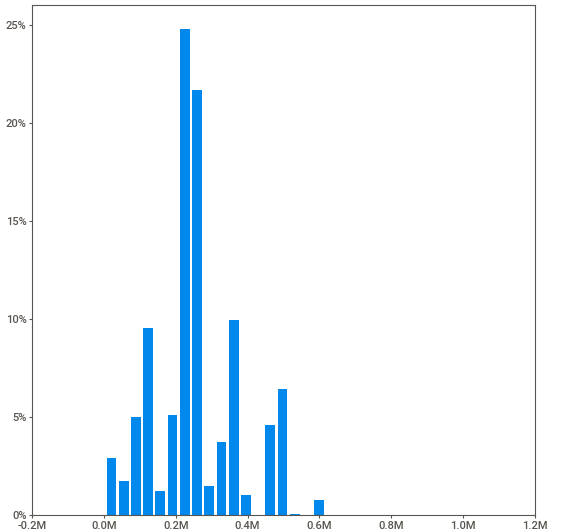
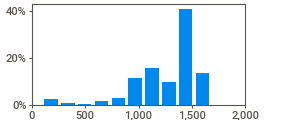
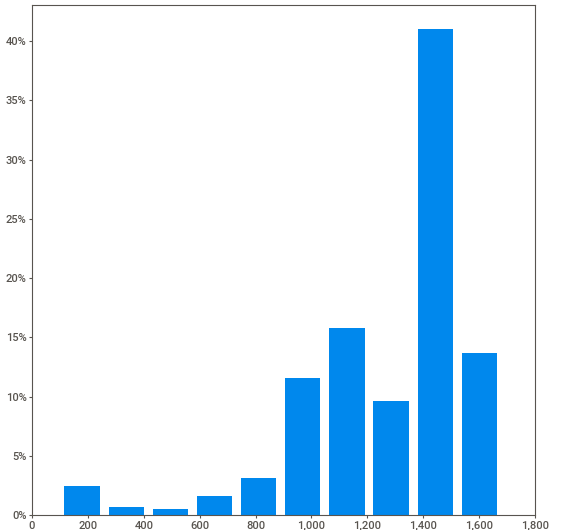
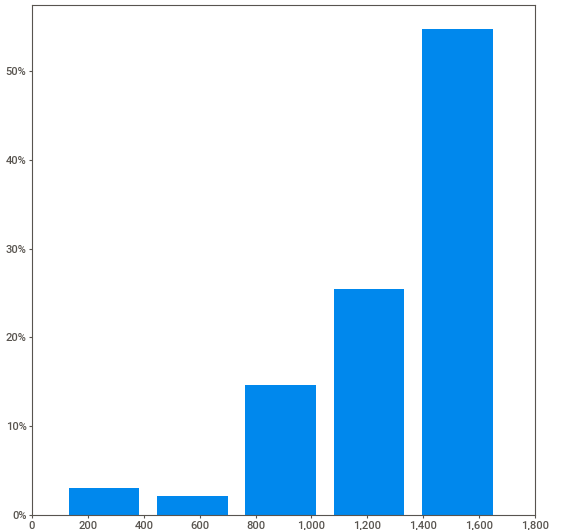
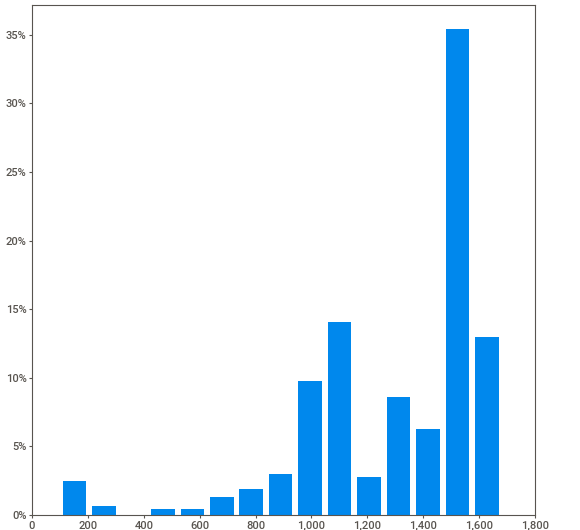
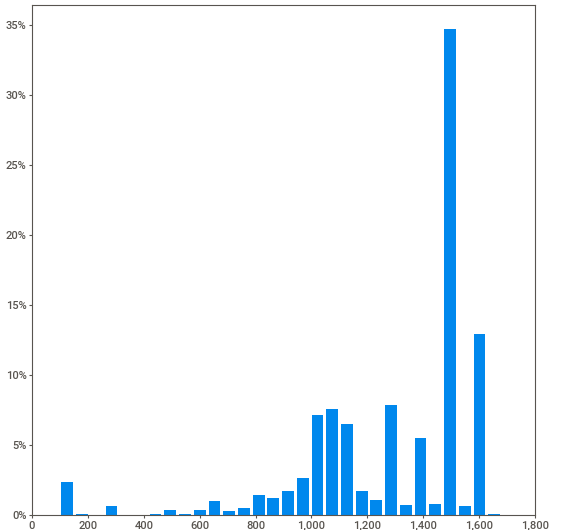
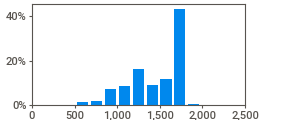
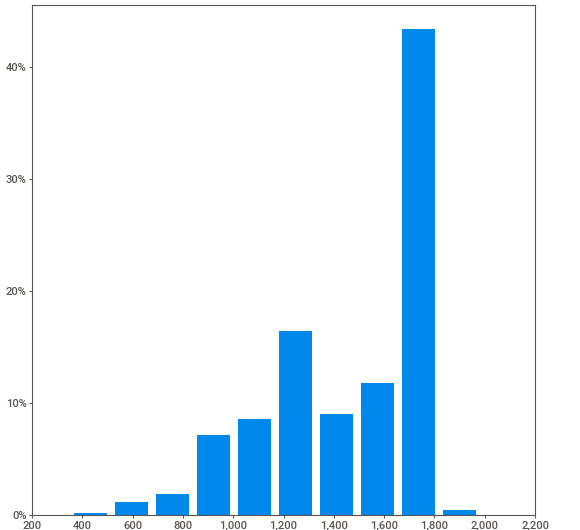
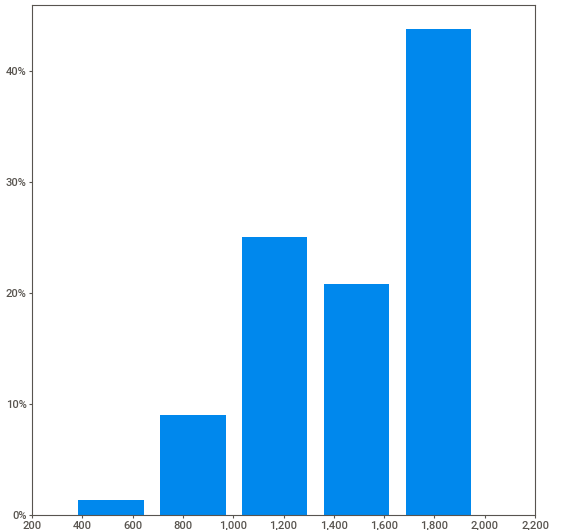
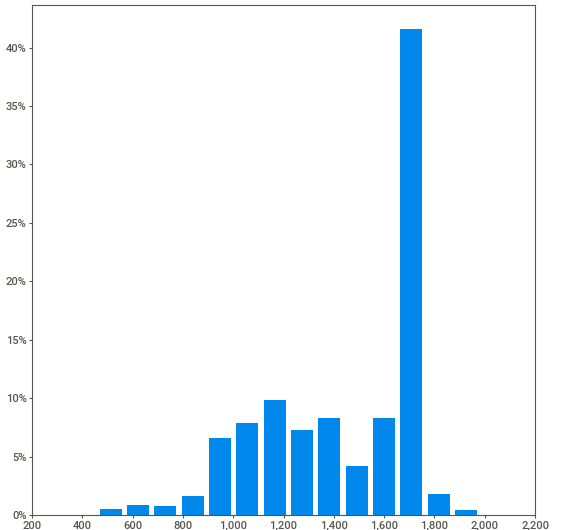
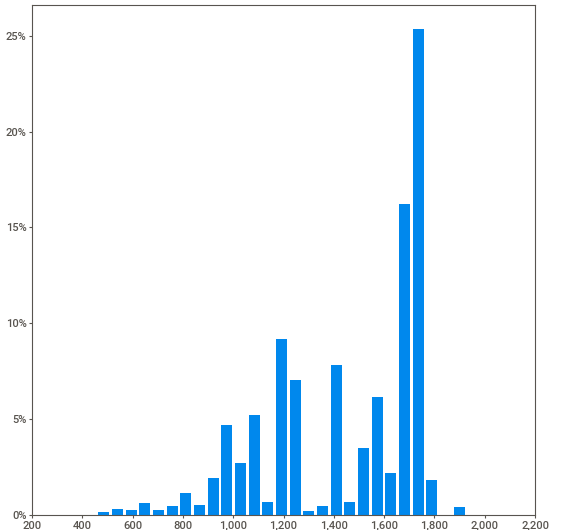
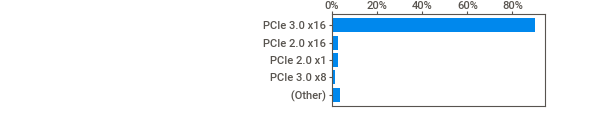
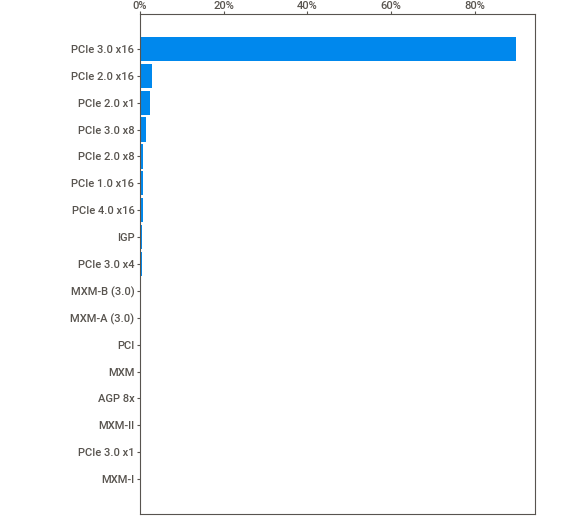
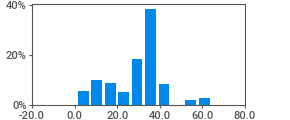
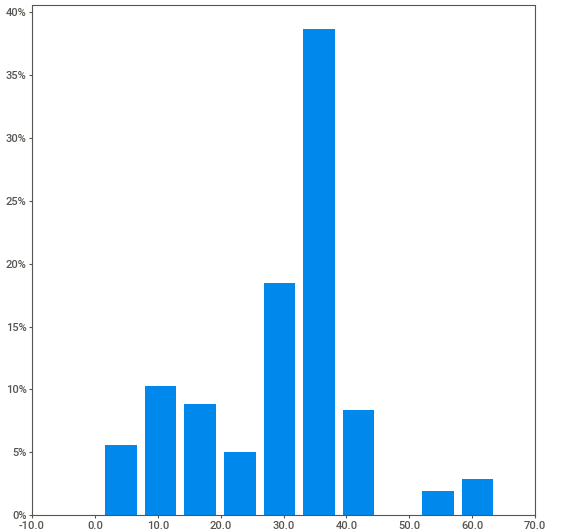
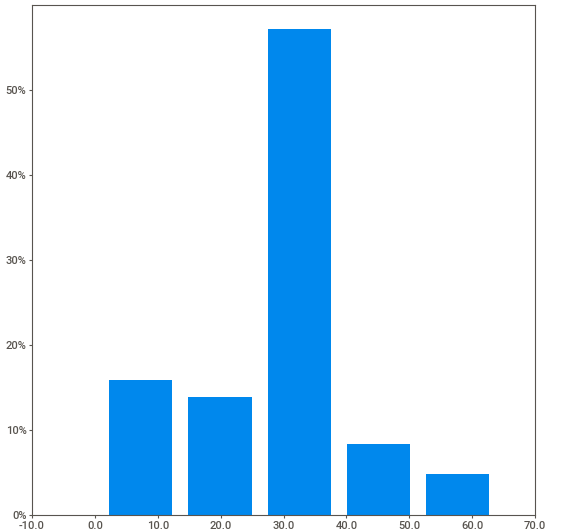
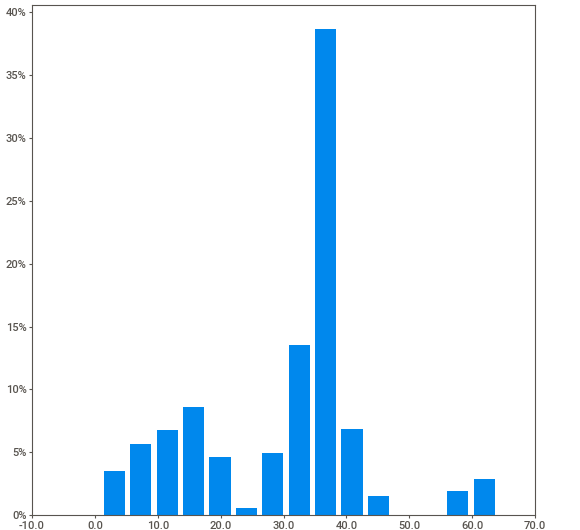
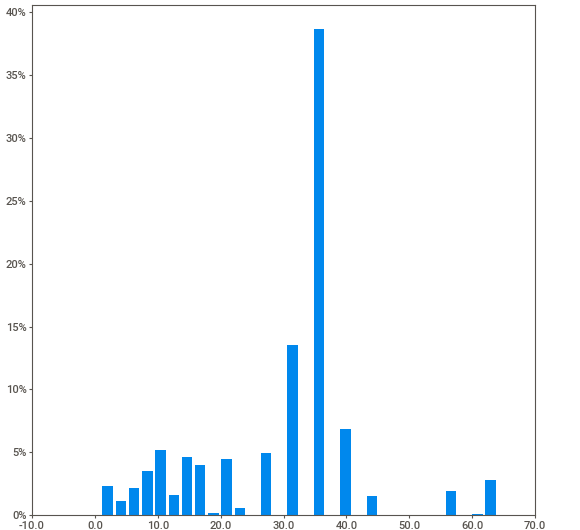
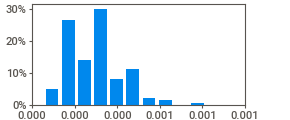
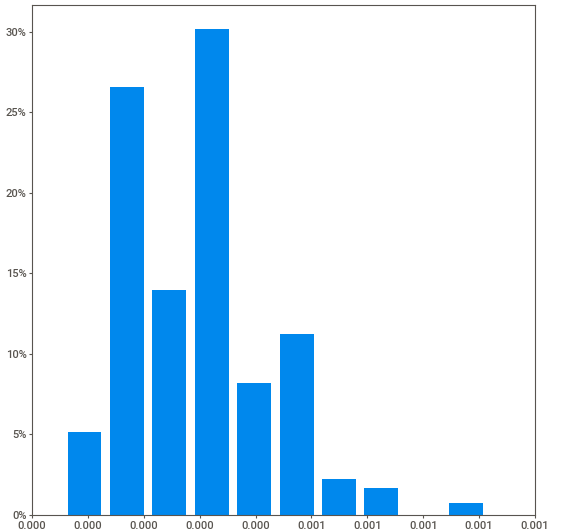
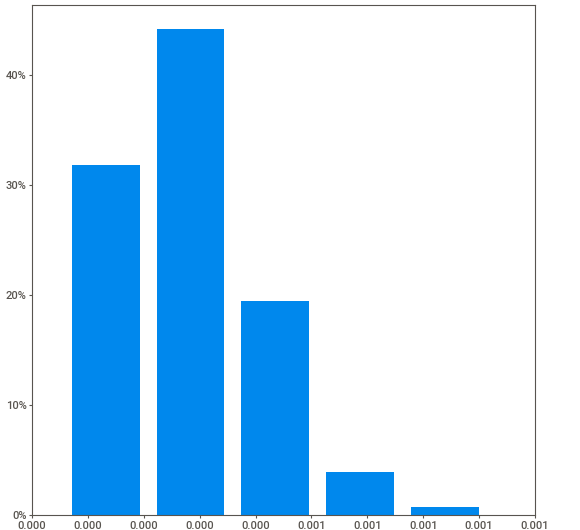
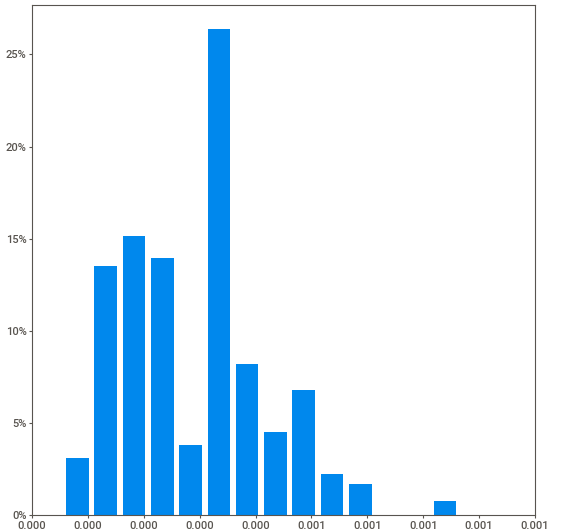
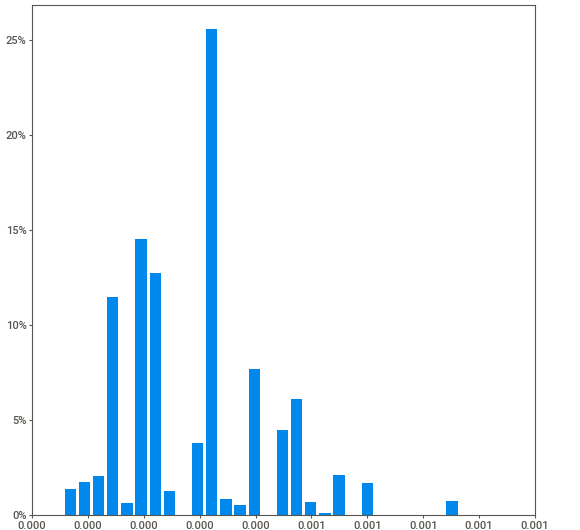
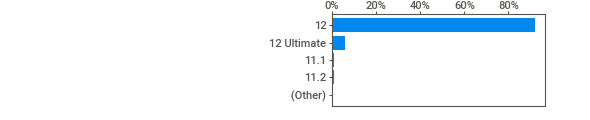
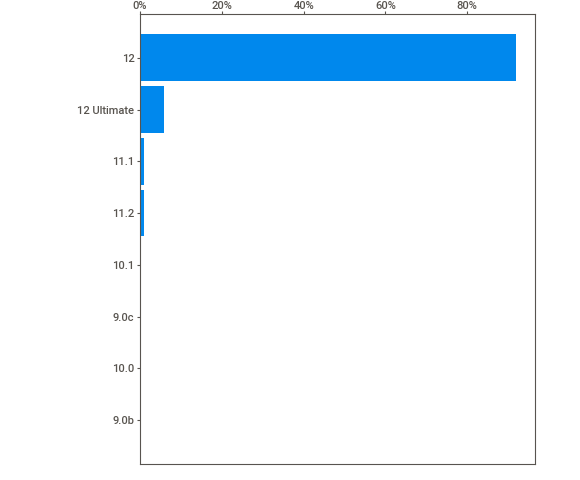
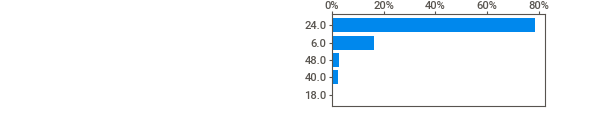
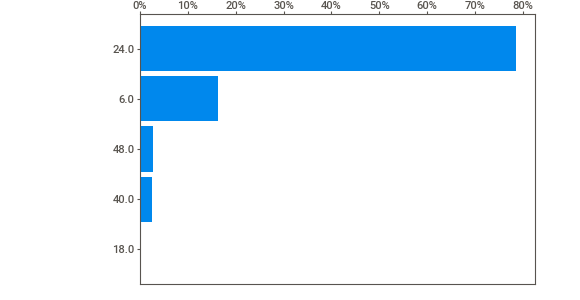
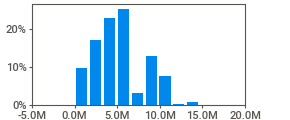
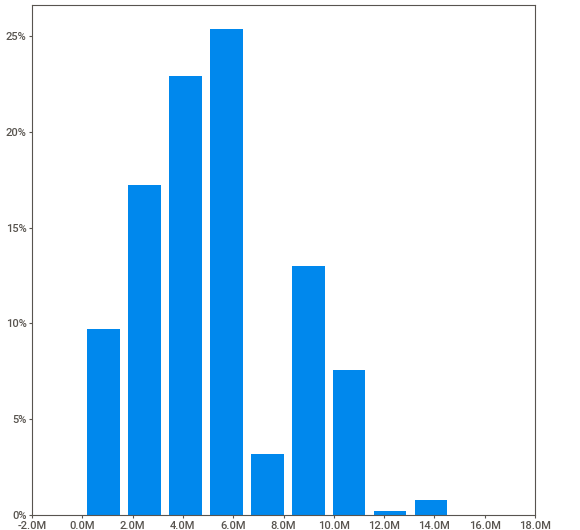
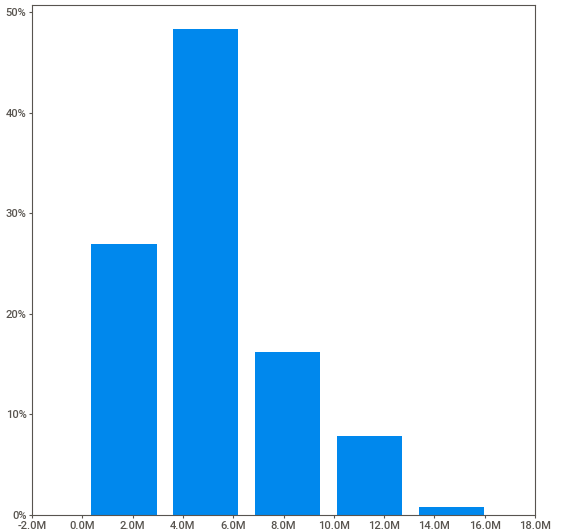
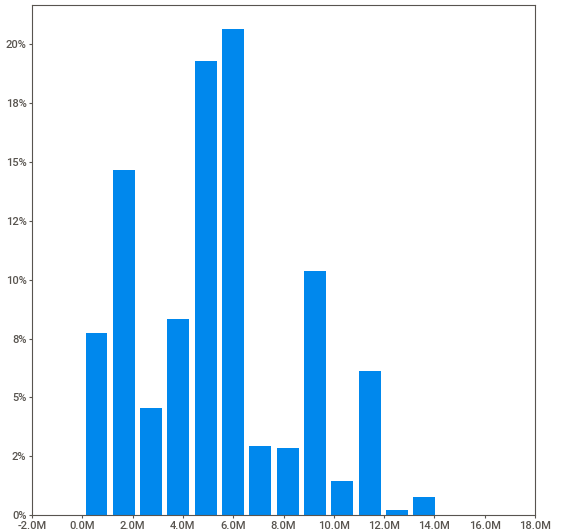
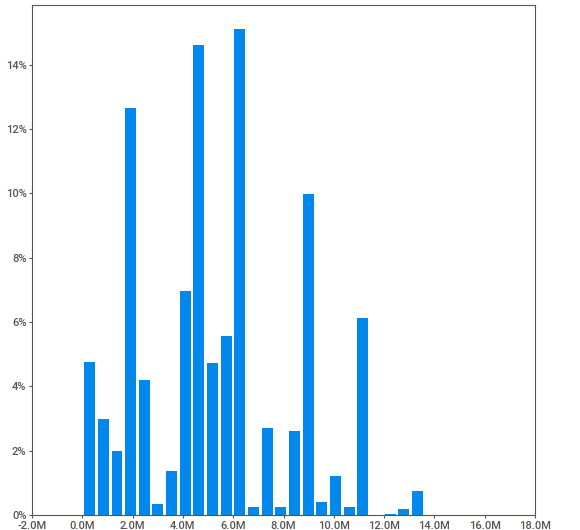
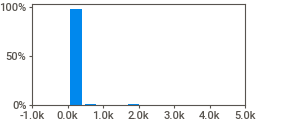
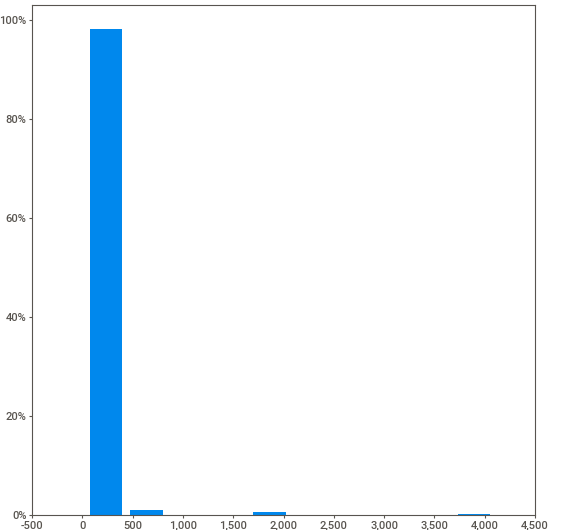
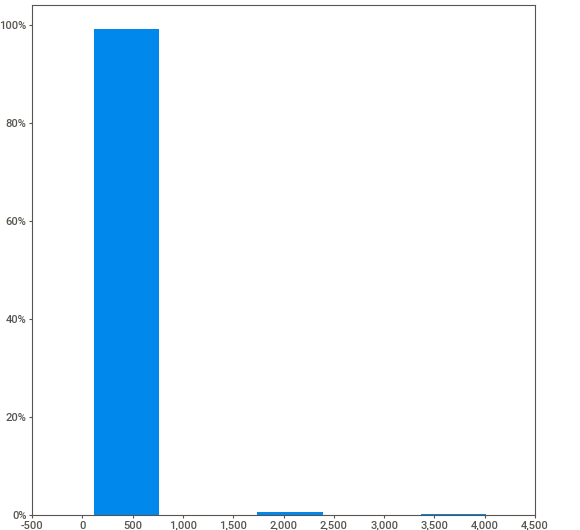
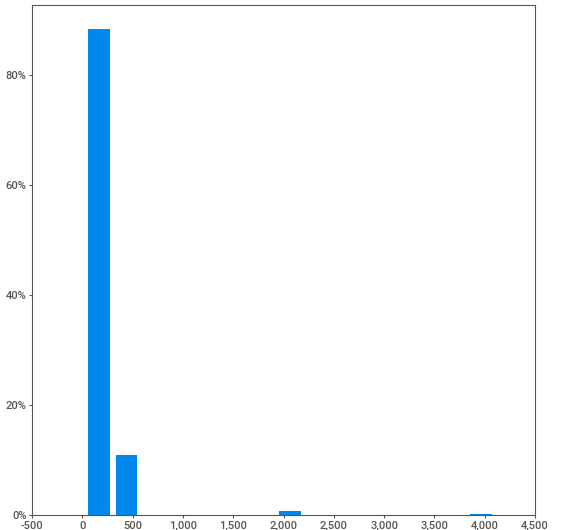
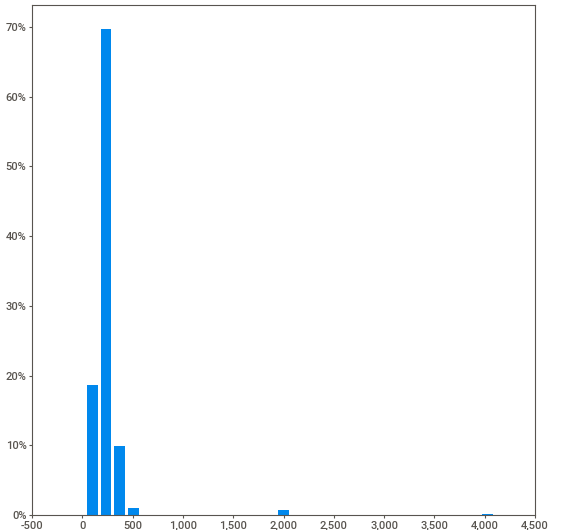
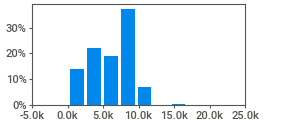
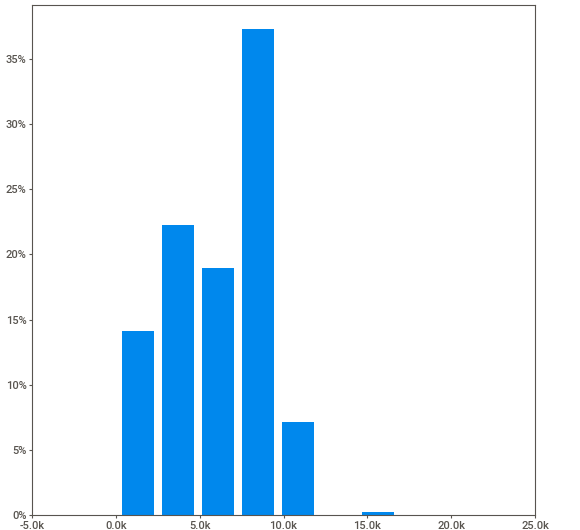
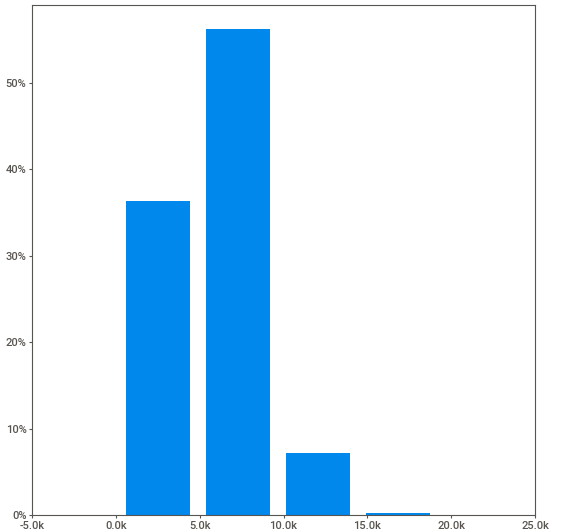
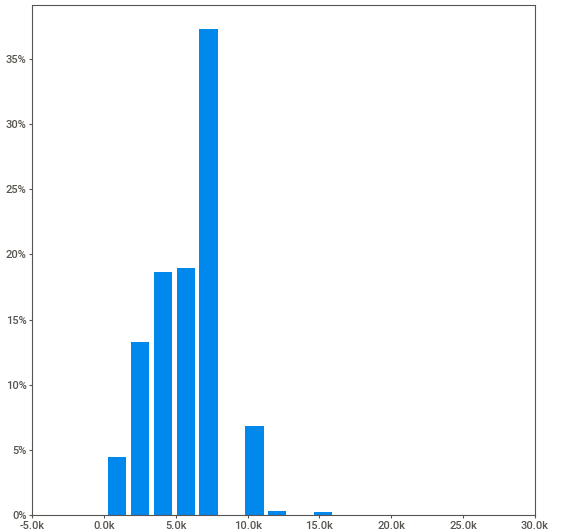
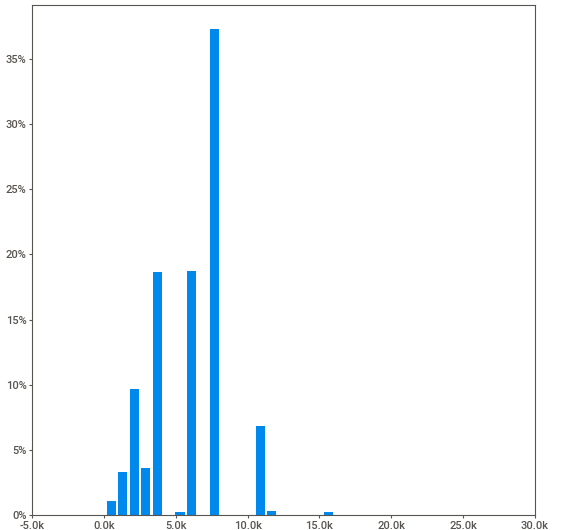
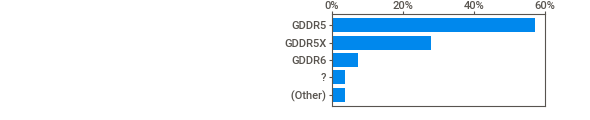
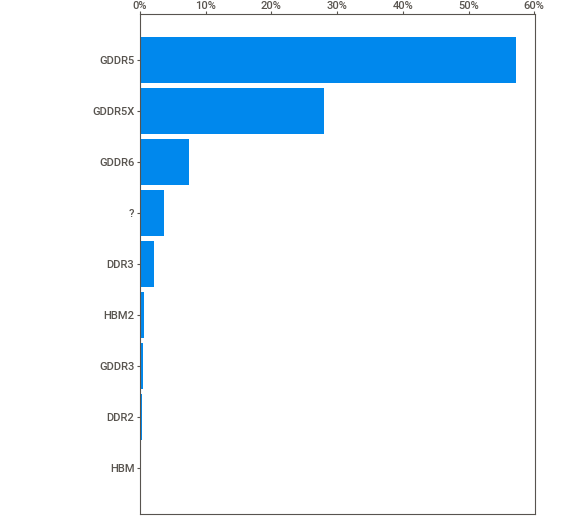
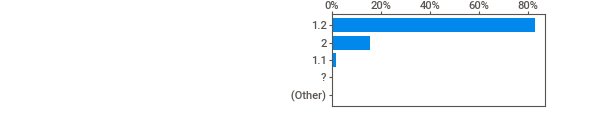
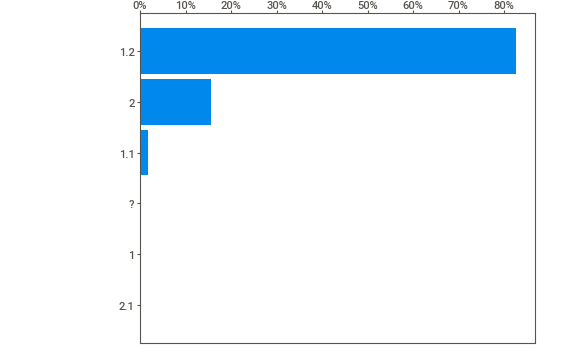
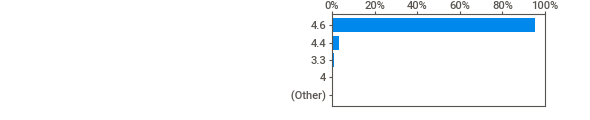
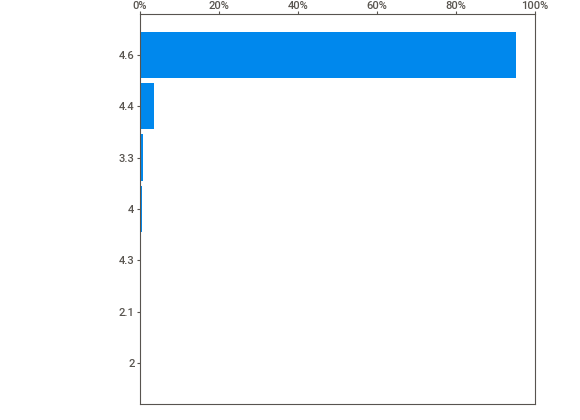
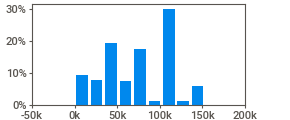
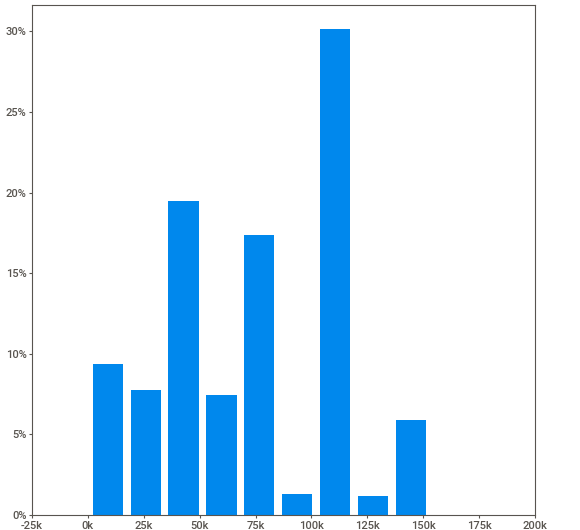
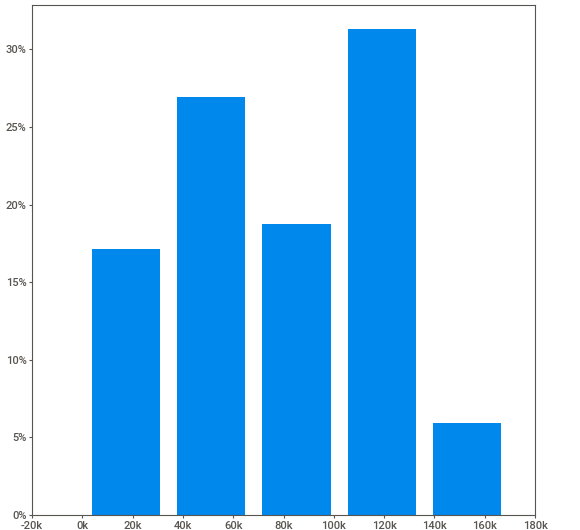
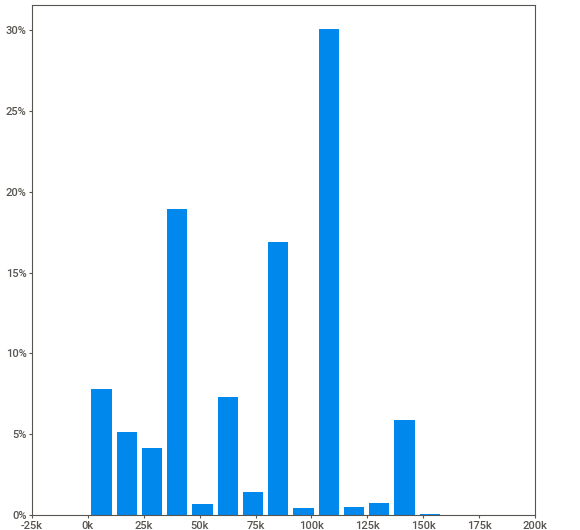
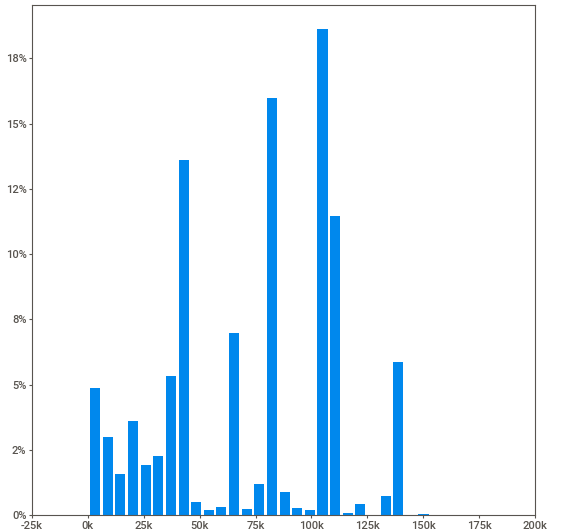
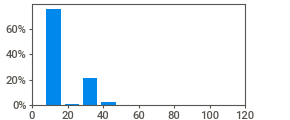
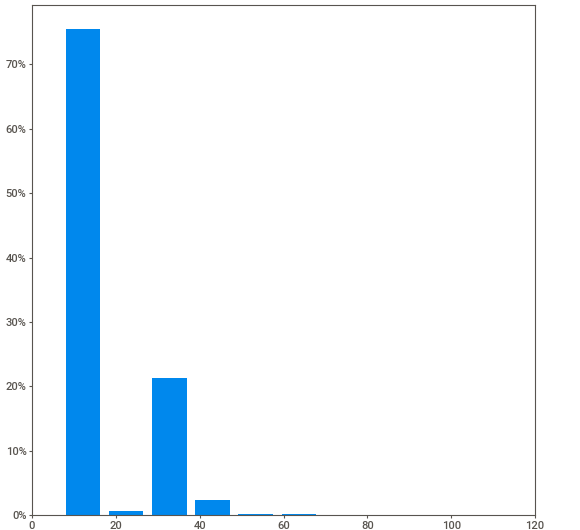
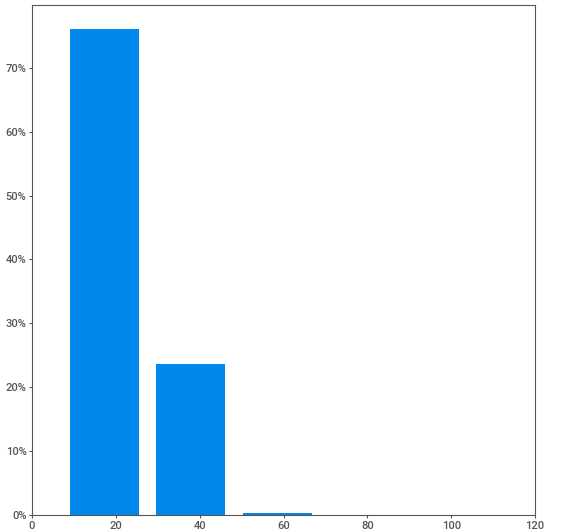
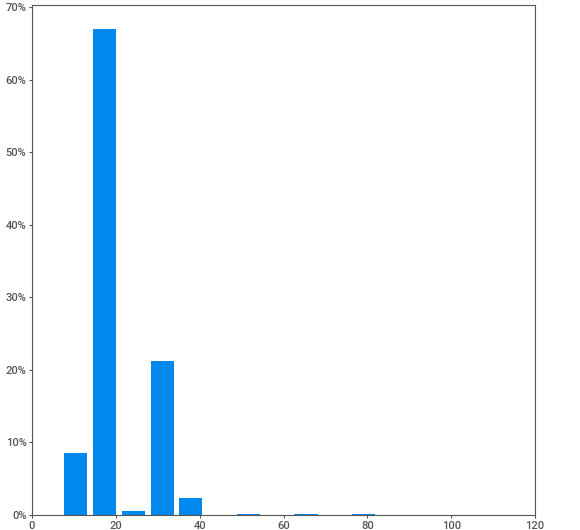
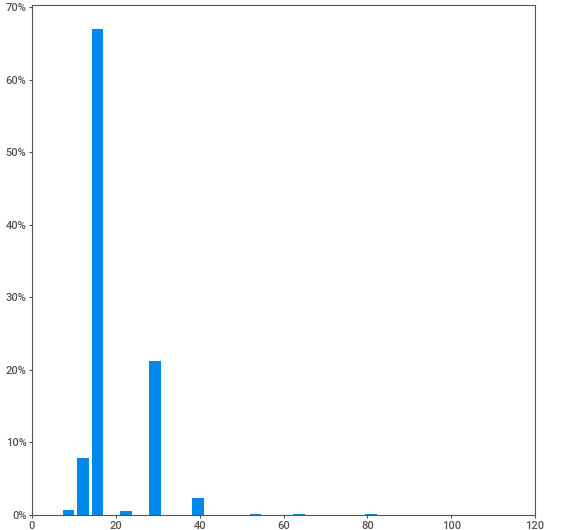
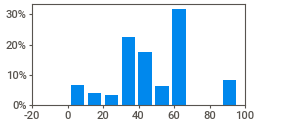
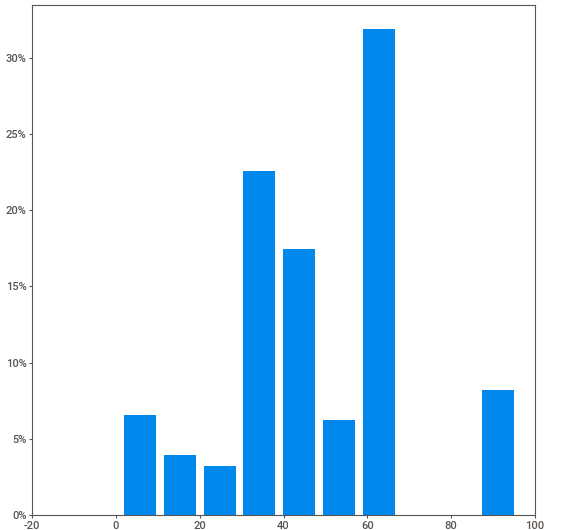
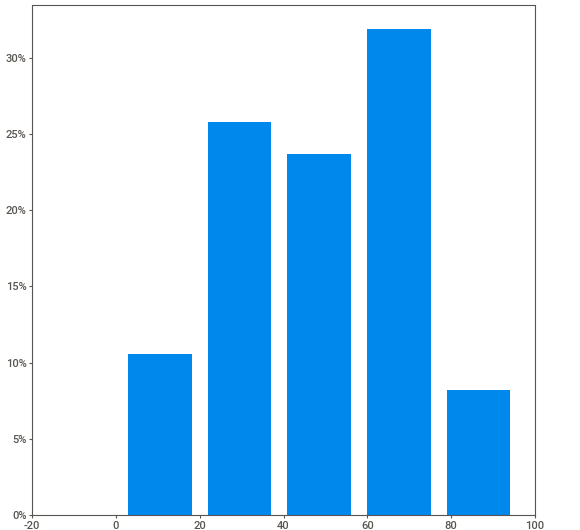
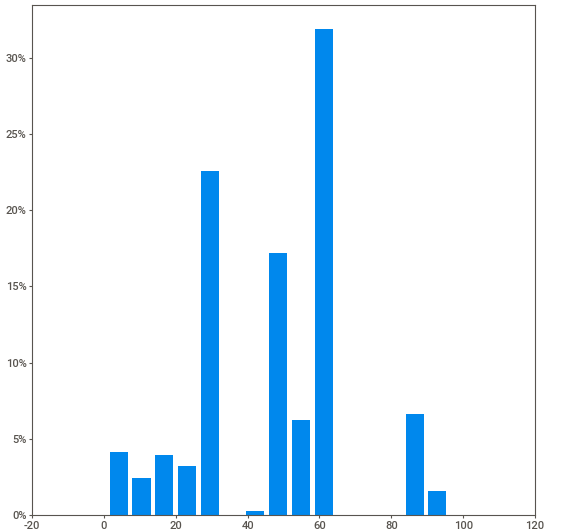
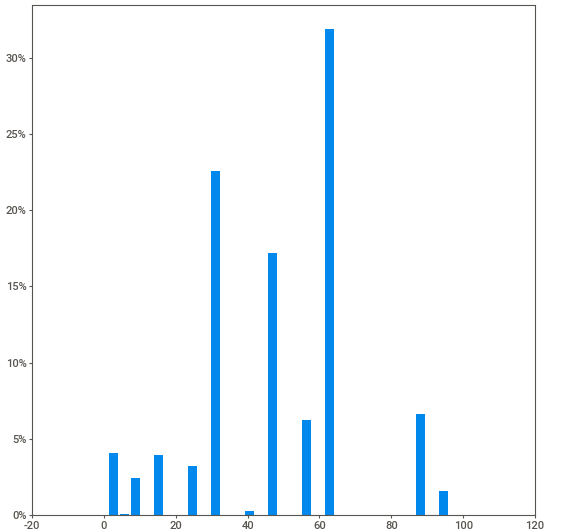
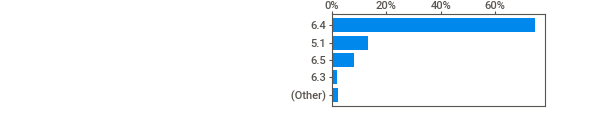
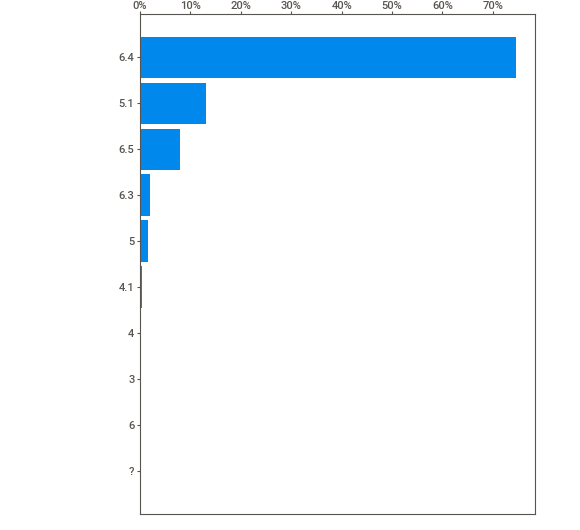
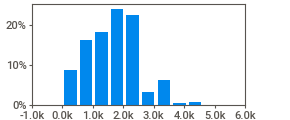
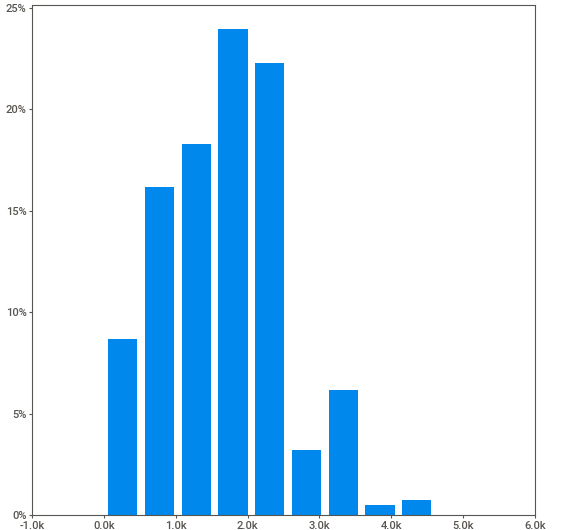
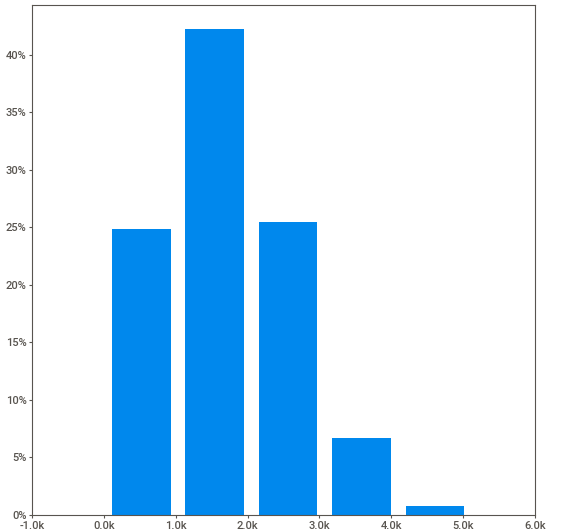
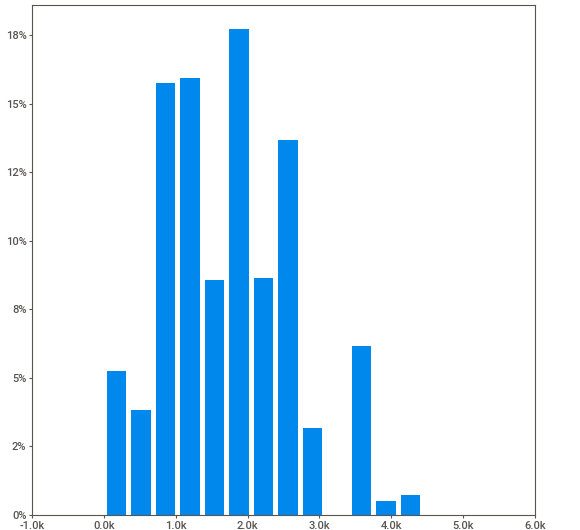
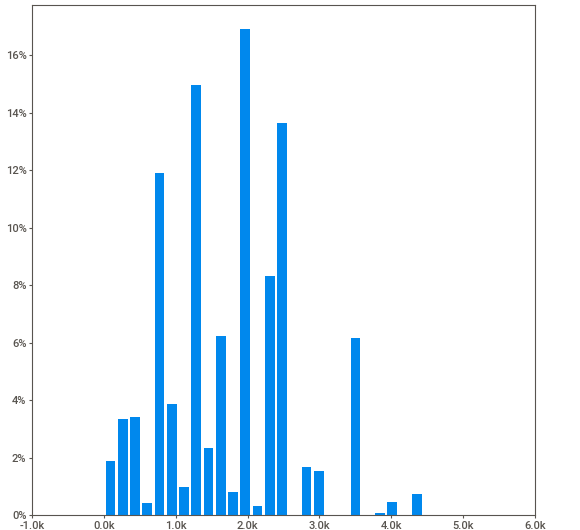
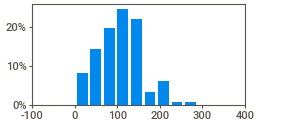
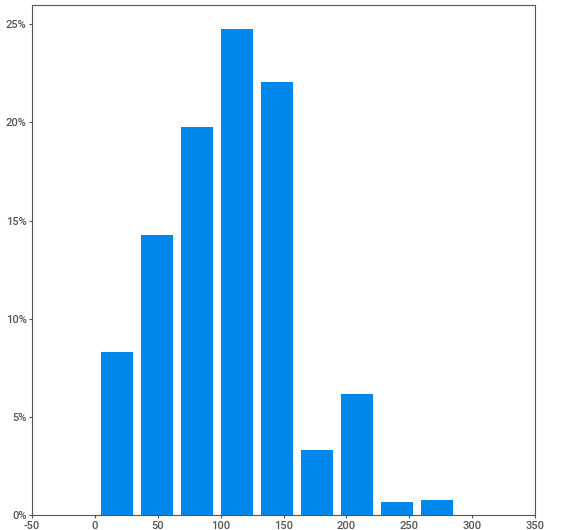
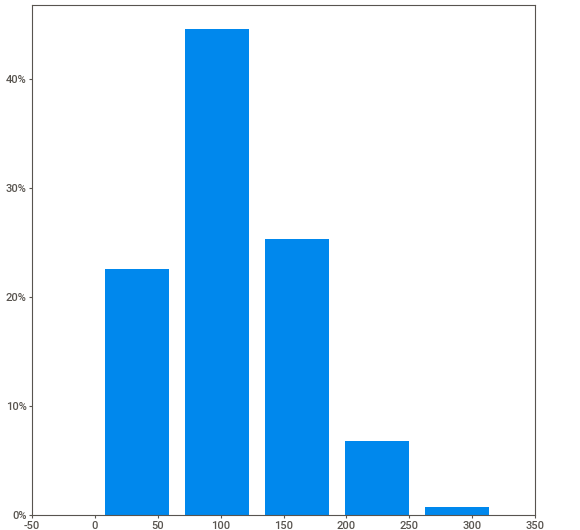
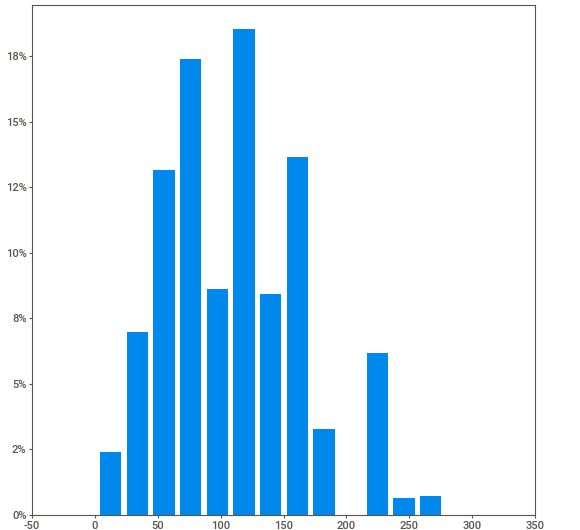
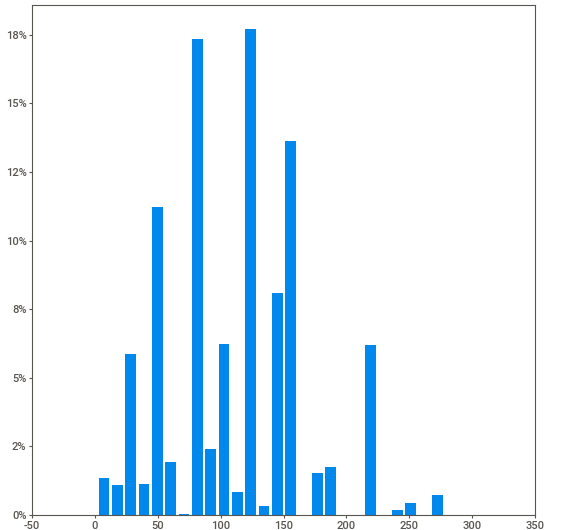
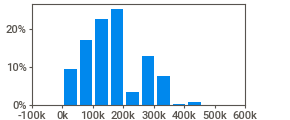
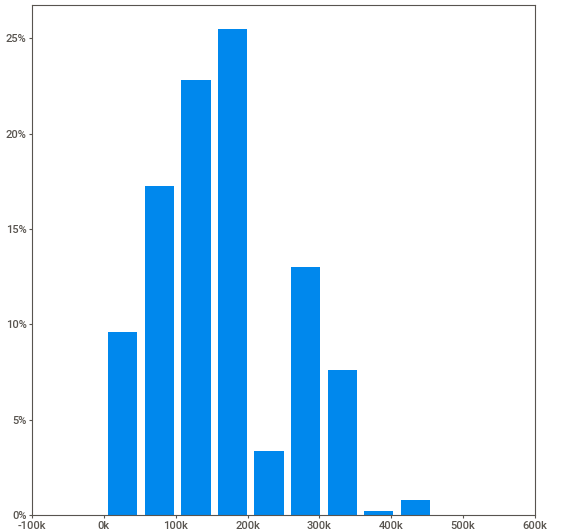
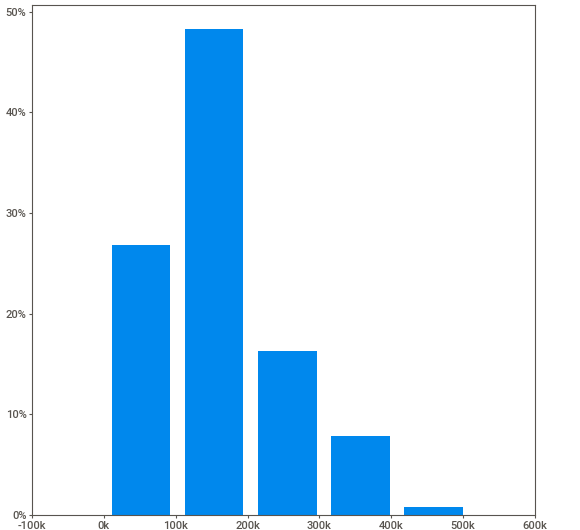
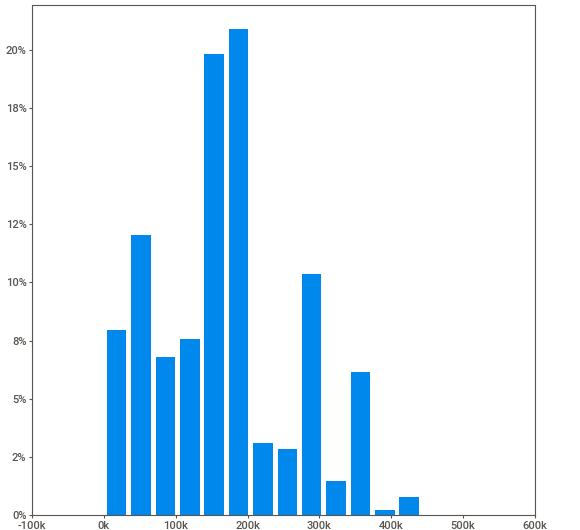
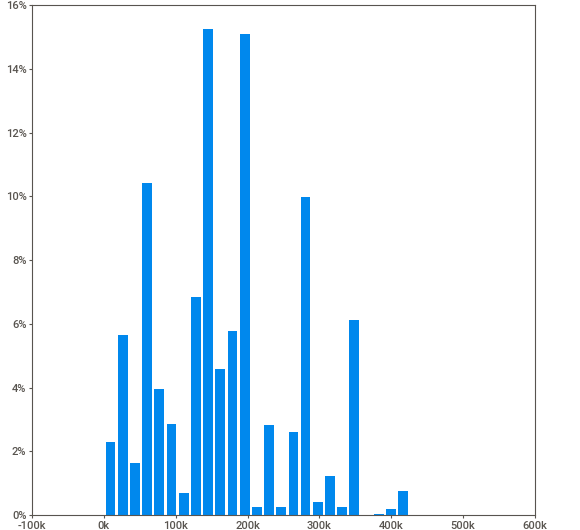
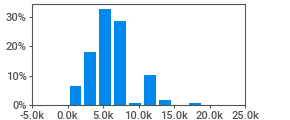
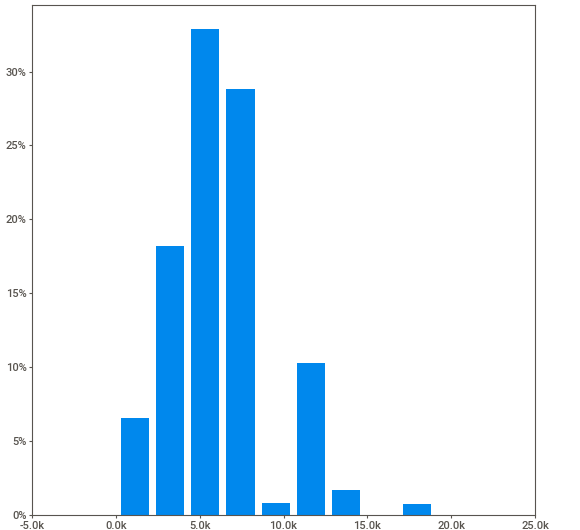
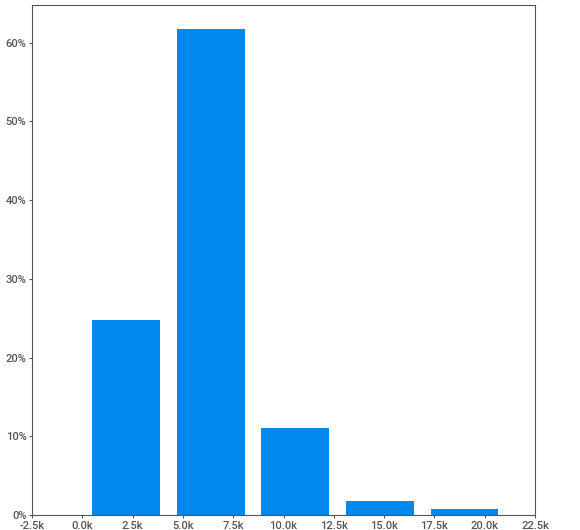
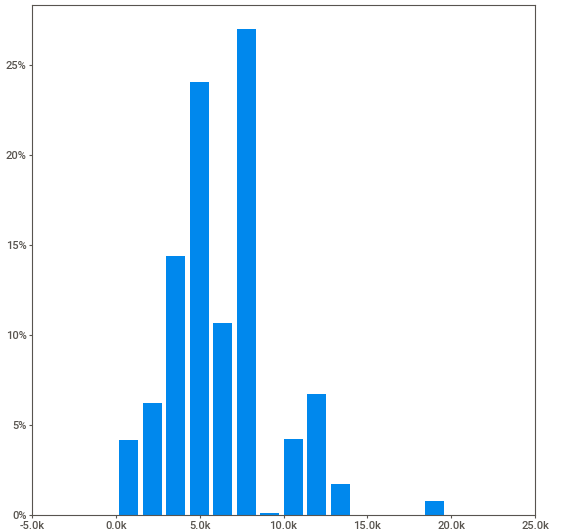
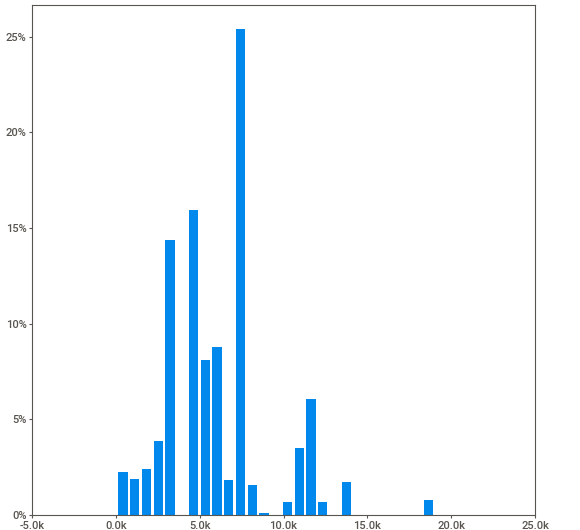
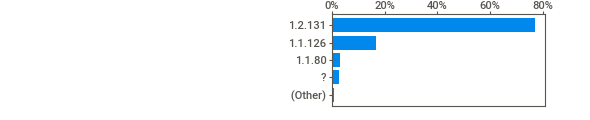
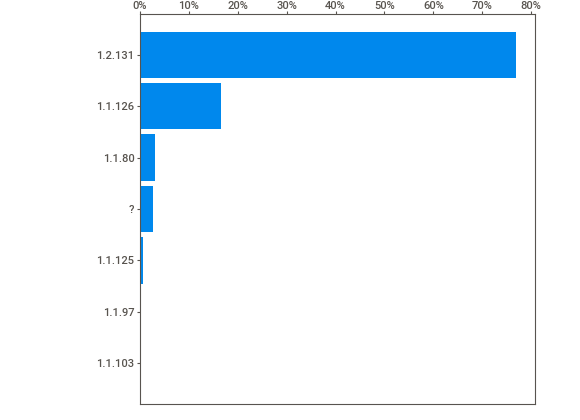
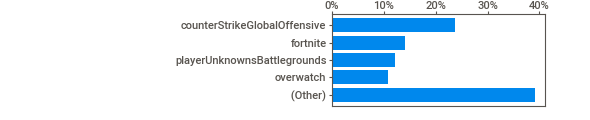
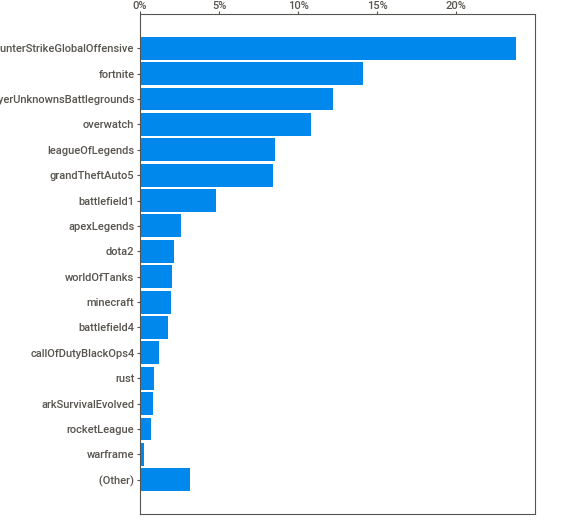
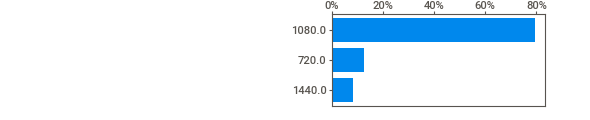
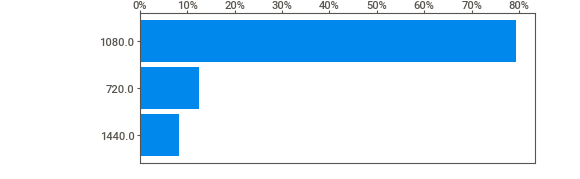
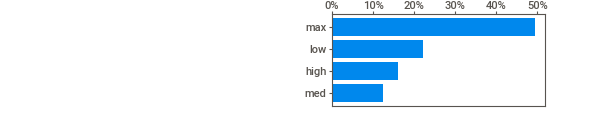
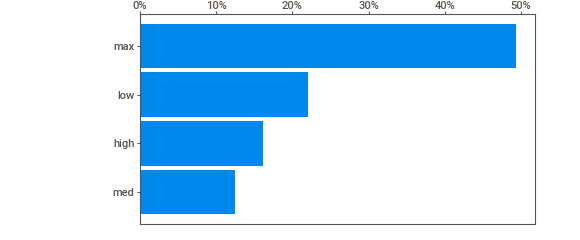
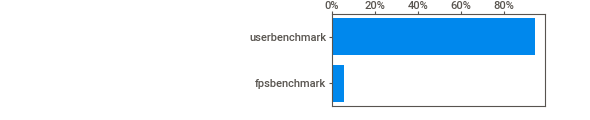
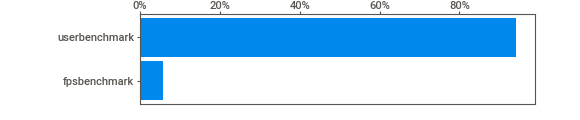
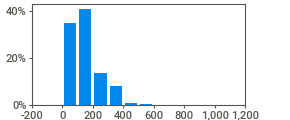
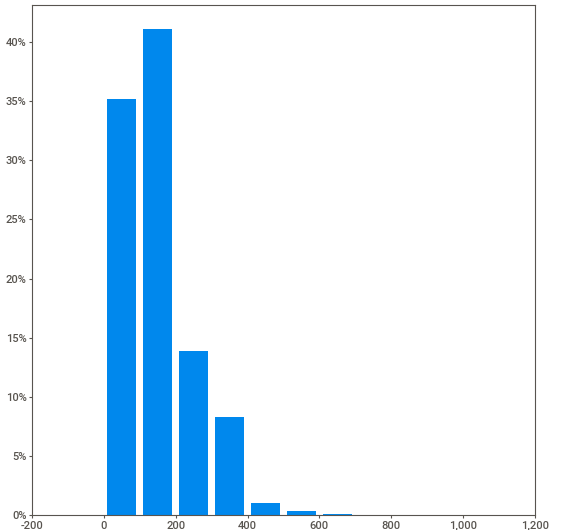
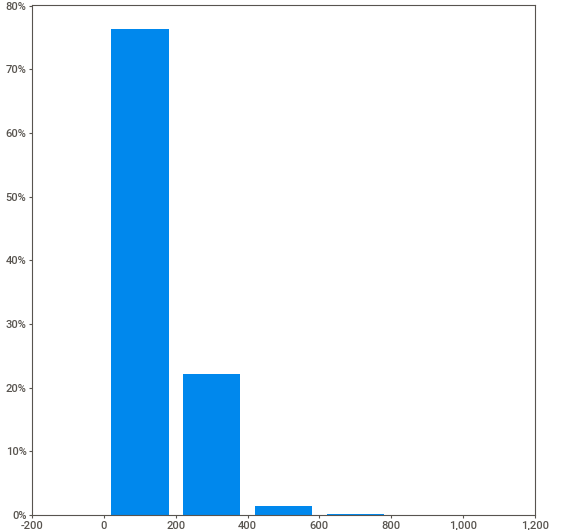
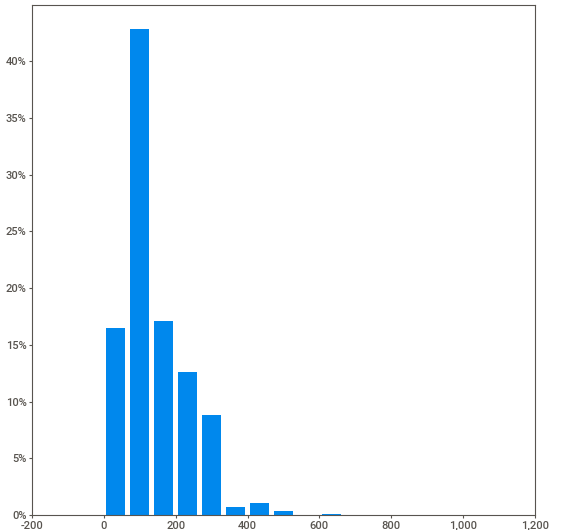
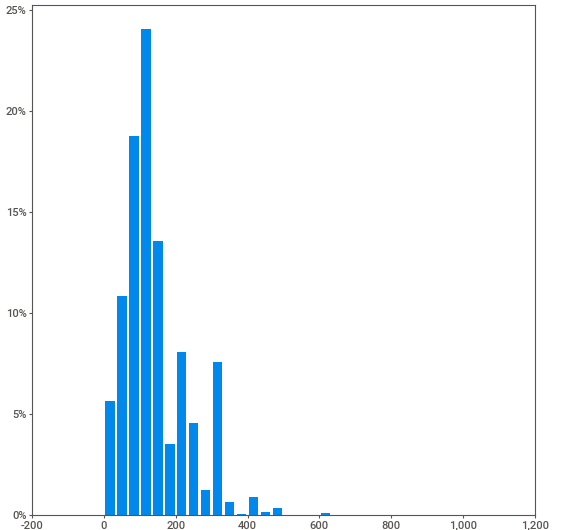
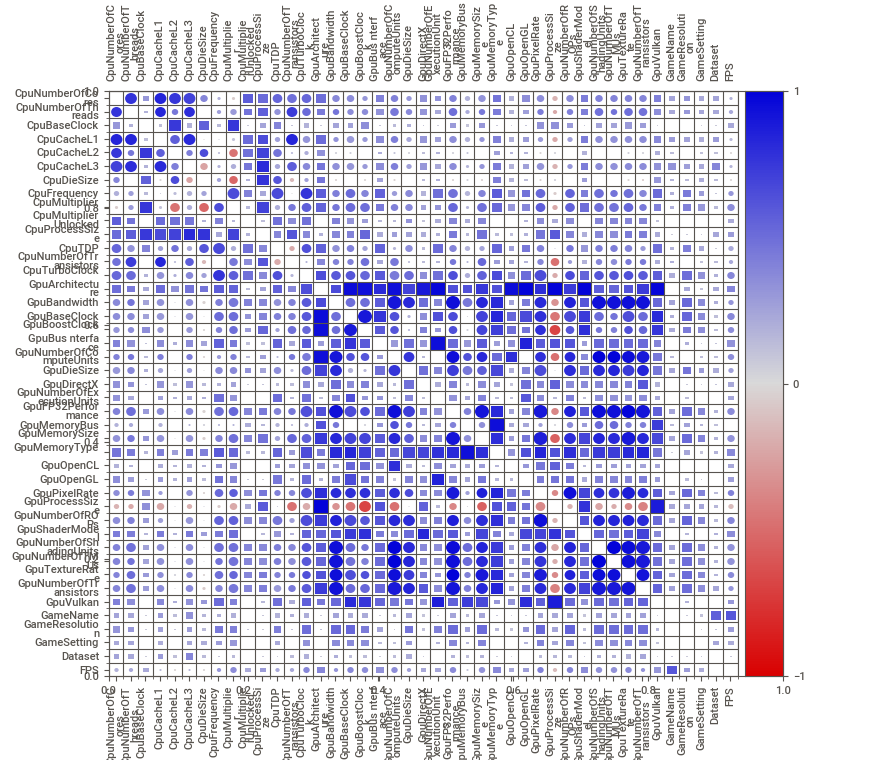
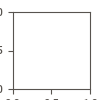

In [46]:
# Showing the report
report.show_notebook()

# Preliminary Data Cleaning

In [47]:
# Select clumns to drop
drop_cols = ['CpuDieSize', 'CpuNumberOfTransistors', 'GpuNumberOfComputeUnits', 'GpuNumberOfExecutionUnits']

In [48]:
# Dropping columns
df = df.drop(columns=drop_cols)

In [49]:
# Display the first rows
df.head()

CpuName  CpuNumberOfCores  CpuNumberOfThreads  CpuBaseClock  \
0   Intel Core i7-920               4.0                 8.0         133.0   
1   Intel Core i7-920               4.0                 8.0         133.0   
2  Intel Core i5-4690               4.0                 4.0         100.0   
3  Intel Core i5-4690               4.0                 4.0         100.0   
4  Intel Core i5-4690               4.0                 4.0         100.0   

   CpuCacheL1  CpuCacheL2  CpuCacheL3  CpuFrequency  CpuMultiplier  \
0       256.0      1024.0         8.0        2666.0           20.0   
1       256.0      1024.0         8.0        2666.0           20.0   
2       256.0      1024.0         6.0        3400.0           34.0   
3       256.0      1024.0         6.0        3400.0           34.0   
4       256.0      1024.0         6.0        3400.0           34.0   

  CpuMultiplierUnlocked  CpuProcessSize  CpuTDP  CpuTurboClock  \
0                     0            45.0   130.0         2933.0   
1                     0            45.0   130.0         2933.0   
2                     0            22.0    84.0         3800.0   
3                     0            22.0    84.0         3800.0   
4                     0            22.0    84.0         3800.0   

                          GpuName GpuArchitecture  GpuBandwidth  GpuBaseClock  \
0               AMD Radeon RX 480         GCN 4.0      256000.0        1120.0   
1               AMD Radeon RX 480         GCN 4.0      256000.0        1120.0   
2  NVIDIA GeForce GTX 1080 11Gbps          Pascal      352300.0        1607.0   
3  NVIDIA GeForce GTX 1080 11Gbps          Pascal      352300.0        1607.0   
4              AMD Radeon R7 260X         GCN 2.0      104000.0        1100.0   

   GpuBoostClock GpuBus nterface  GpuDieSize GpuDirectX  GpuFP32Performance  \
0         1266.0    PCIe 3.0 x16    0.000232         12           5834000.0   
1         1266.0    PCIe 3.0 x16    0.000232         12           5834000.0   
2         1733.0    PCIe 3.0 x16    0.000314         12           8873000.0   
3         1733.0    PCIe 3.0 x16    0.000314         12           8873000.0   
4         1100.0    PCIe 3.0 x16    0.000160         12           1971000.0   

   GpuMemoryBus  GpuMemorySize GpuMemoryType GpuOpenCL GpuOpenGL  \
0         256.0         8000.0         GDDR5         2       4.6   
1         256.0         8000.0         GDDR5         2       4.6   
2         256.0         8000.0        GDDR5X       1.2       4.6   
3         256.0         8000.0        GDDR5X       1.2       4.6   
4         128.0         2000.0         GDDR5         2       4.6   

   GpuPixelRate  GpuProcessSize  GpuNumberOfROPs GpuShaderModel  \
0       40510.0            14.0             32.0            6.4   
1       40510.0            14.0             32.0            6.4   
2      110900.0            16.0             64.0            6.4   
3      110900.0            16.0             64.0            6.4   
4       17600.0            28.0             16.0            6.3   

   GpuNumberOfShadingUnits  GpuNumberOfTMUs  GpuTextureRate  \
0                   2304.0            144.0        182300.0   
1                   2304.0            144.0        182300.0   
2                   2560.0            160.0        277300.0   
3                   2560.0            160.0        277300.0   
4                    896.0             56.0         61600.0   

   GpuNumberOfTransistors GpuVulkan                      GameName  \
0                  5700.0   1.2.131  counterStrikeGlobalOffensive   
1                  5700.0   1.2.131  counterStrikeGlobalOffensive   
2                  7200.0   1.2.131  counterStrikeGlobalOffensive   
3                  7200.0   1.2.131  counterStrikeGlobalOffensive   
4                  2080.0   1.2.131  counterStrikeGlobalOffensive   

   GameResolution GameSetting        Dataset    FPS  
0          1080.0         low  userbenchmark   70.0  
1          1080.0         low  userbenchmark  230.0  
2  

In [50]:
# Checking the number of rows and columns
df.shape

(425833, 41)

In [51]:
# Dropping na
df = df.dropna()

In [52]:
# Checking missing values
df.isna().sum()

CpuName                    0
CpuNumberOfCores           0
CpuNumberOfThreads         0
CpuBaseClock               0
CpuCacheL1                 0
CpuCacheL2                 0
CpuCacheL3                 0
CpuFrequency               0
CpuMultiplier              0
CpuMultiplierUnlocked      0
CpuProcessSize             0
CpuTDP                     0
CpuTurboClock              0
GpuName                    0
GpuArchitecture            0
GpuBandwidth               0
GpuBaseClock               0
GpuBoostClock              0
GpuBus nterface            0
GpuDieSize                 0
GpuDirectX                 0
GpuFP32Performance         0
GpuMemoryBus               0
GpuMemorySize              0
GpuMemoryType              0
GpuOpenCL                  0
GpuOpenGL                  0
GpuPixelRate               0
GpuProcessSize             0
GpuNumberOfROPs            0
GpuShaderModel             0
GpuNumberOfShadingUnits    0
GpuNumberOfTMUs            0
GpuTextureRate             0
GpuNumberOfTra

In [53]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

In [54]:
# Check basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194700 entries, 0 to 425832
Data columns (total 41 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CpuName                  194700 non-null  object 
 1   CpuNumberOfCores         194700 non-null  float64
 2   CpuNumberOfThreads       194700 non-null  float64
 3   CpuBaseClock             194700 non-null  float64
 4   CpuCacheL1               194700 non-null  float64
 5   CpuCacheL2               194700 non-null  float64
 6   CpuCacheL3               194700 non-null  float64
 7   CpuFrequency             194700 non-null  float64
 8   CpuMultiplier            194700 non-null  float64
 9   CpuMultiplierUnlocked    194700 non-null  object 
 10  CpuProcessSize           194700 non-null  float64
 11  CpuTDP                   194700 non-null  float64
 12  CpuTurboClock            194700 non-null  float64
 13  GpuName                  194700 non-null  object 
 14  GpuArchit

In [55]:
# Verify if there is any row with '?' value
mask = df.applymap(lambda x: '?' in str(x))
df = df[~mask.any(axis=1)]
df

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27900\1446267545.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = df.applymap(lambda x: '?' in str(x))


CpuName  CpuNumberOfCores  CpuNumberOfThreads  \
0        Intel Core i7-920               4.0                 8.0   
1        Intel Core i7-920               4.0                 8.0   
2       Intel Core i5-4690               4.0                 4.0   
3       Intel Core i5-4690               4.0                 4.0   
4       Intel Core i5-4690               4.0                 4.0   
...                    ...               ...                 ...   
425828    AMD Ryzen 5 3600               6.0                12.0   
425829   AMD Ryzen 5 2600X               6.0                12.0   
425830   AMD Ryzen 5 1600X               6.0                12.0   
425831    AMD Ryzen 5 2600               6.0                12.0   
425832   AMD Ryzen 7 1700X               8.0                16.0   

        CpuBaseClock  CpuCacheL1  CpuCacheL2  CpuCacheL3  CpuFrequency  \
0              133.0       256.0      1024.0         8.0        2666.0   
1              133.0       256.0      1024.0         8.0        2666.0   
2              100.0       256.0      1024.0         6.0        3400.0   
3              100.0       256.0      1024.0         6.0        3400.0   
4              100.0       256.0      1024.0         6.0        3400.0   
...              ...         ...         ...         ...           ...   
425828         100.0       576.0      3072.0        32.0        3600.0   
425829         100.0       576.0      3072.0        16.0        3600.0   
425830         100.0       576.0      3072.0        16.0        3600.0   
425831         100.0       576.0      3072.0        16.0        3400.0   
425832         100.0       768.0      4096.0        16.0        3400.0   

        CpuMultiplier CpuMultiplierUnlocked  CpuProcessSize  CpuTDP  \
0                20.0                     0            45.0   130.0   
1                20.0                     0            45.0   130.0   
2                34.0                     0            22.0    84.0   
3                34.0                     0            22.0    84.0   
4                34.0                     0            22.0    84.0   
...               ...                   ...             ...     ...   
425828           36.0                     1             7.0    65.0   
425829           36.0                     1            12.0    95.0   
425830           36.0                     1            14.0    95.0   
425831           34.0                     1            12.0    65.0   
425832           34.0                     1            14.0    95.0   

        CpuTurboClock                         GpuName GpuArchitecture  \
0              2933.0               AMD Radeon RX 480         GCN 4.0   
1              2933.0               AMD Radeon RX 480         GCN 4.0   
2              3800.0  NVIDIA GeForce GTX 1080 11Gbps          Pascal   
3              3800.0  NVIDIA GeForce GTX 1080 11Gbps          Pascal   
4              3800.0              AMD Radeon R7 260X         GCN 2.0   
...               ...                             ...             ...   
425828         4200.0               AMD Radeon RX 570         GCN 4.0   
425829         4250.0               AMD Radeon RX 570         GCN 4.0   
425830         4000.0               AMD Radeon RX 570         GCN 4.0   
425831         3900.0               AMD Radeon RX 570         GCN 4.0   
425832         3800.0               AMD Radeon RX 570         GCN 4.0   

        GpuBandwidth  GpuBaseClock  GpuBoostClock GpuBus nterface  GpuDieSize  \
0           256000.0        1120.0         1266.0    PCIe 3.0 x16    0.000232   
1           256000.0        1120.0         1266.0    PCIe 3.0 x16    0.000232   
2           352300.0        1607.0         1733.0    PCIe 3.0 x16    0.000314   
3           352300.0        1607.0         1733.0    PCIe 3.0 x16    0.000314   
4           104000.0        1100.0         1100.0    PCIe 3.0 x16    0.000160   
...              ...           ...            ...             ...         ...   
425828      2240

In [56]:
# Checking the number of unique values
for column_name in df.select_dtypes(include=["object"]):
  print(column_name, "->", df[column_name].unique())
  print()

CpuName -> ['Intel Core i7-920' 'Intel Core i5-4690' 'Intel Core i5-4570'
 'Intel Core i5-6600' 'Intel Core i5-4590' 'Intel Core i5-2400'
 'Intel Core i5-4440' 'Intel Core i5-3470' 'Intel Core i5-8600K'
 'Intel Core i5-8400' 'Intel Core i5-2500K' 'Intel Core i5-7500'
 'Intel Core i5-4670K' 'Intel Core i5-7600K' 'Intel Core i5-3570K'
 'Intel Core i5-6500' 'Intel Core i5-7400' 'Intel Core i5-6400'
 'Intel Core i5-4690K' 'Intel Core i5-6600K' 'Intel Core i7-9700K'
 'Intel Core i7-8750H' 'Intel Core i7-8700' 'Intel Core i7-2600K'
 'Intel Core i7-3770K' 'Intel Core i7-4770' 'Intel Core i7-2600'
 'Intel Core i7-7700' 'Intel Core i7-4770K' 'Intel Core i7-6700'
 'Intel Core i7-3770' 'Intel Core i7-8700K' 'Intel Core i7-4790'
 'Intel Core i7-6700K' 'Intel Core i7-4790K' 'Intel Core i7-7700K'
 'AMD Ryzen 5 3400G' 'AMD FX-9370' 'AMD FX-6200' 'AMD FX-8370E'
 'AMD FX-9590' 'AMD FX-4350' 'AMD FX-8150' 'AMD FX-8370' 'AMD FX-8120'
 'AMD FX-8320E' 'AMD FX-4100' 'AMD FX-6100' 'AMD FX-8300' 'AMD FX-4300'

In [57]:
# Verify if there is any row with '?' value
df['GpuVulkan'].value_counts()

GpuVulkan
1.2.131    142469
1.1.126     42251
1.1.125      2463
Name: count, dtype: int64

In [58]:
# Delete dataset column
df = df.drop(columns=['Dataset'])

In [59]:
# Save the cleaned data
df.to_csv('../data/fps-dataset-clean.csv', index=False)

# Data visualization

In [60]:
# Get numerical columns
numerical_columns = df.select_dtypes(include=[np.number])

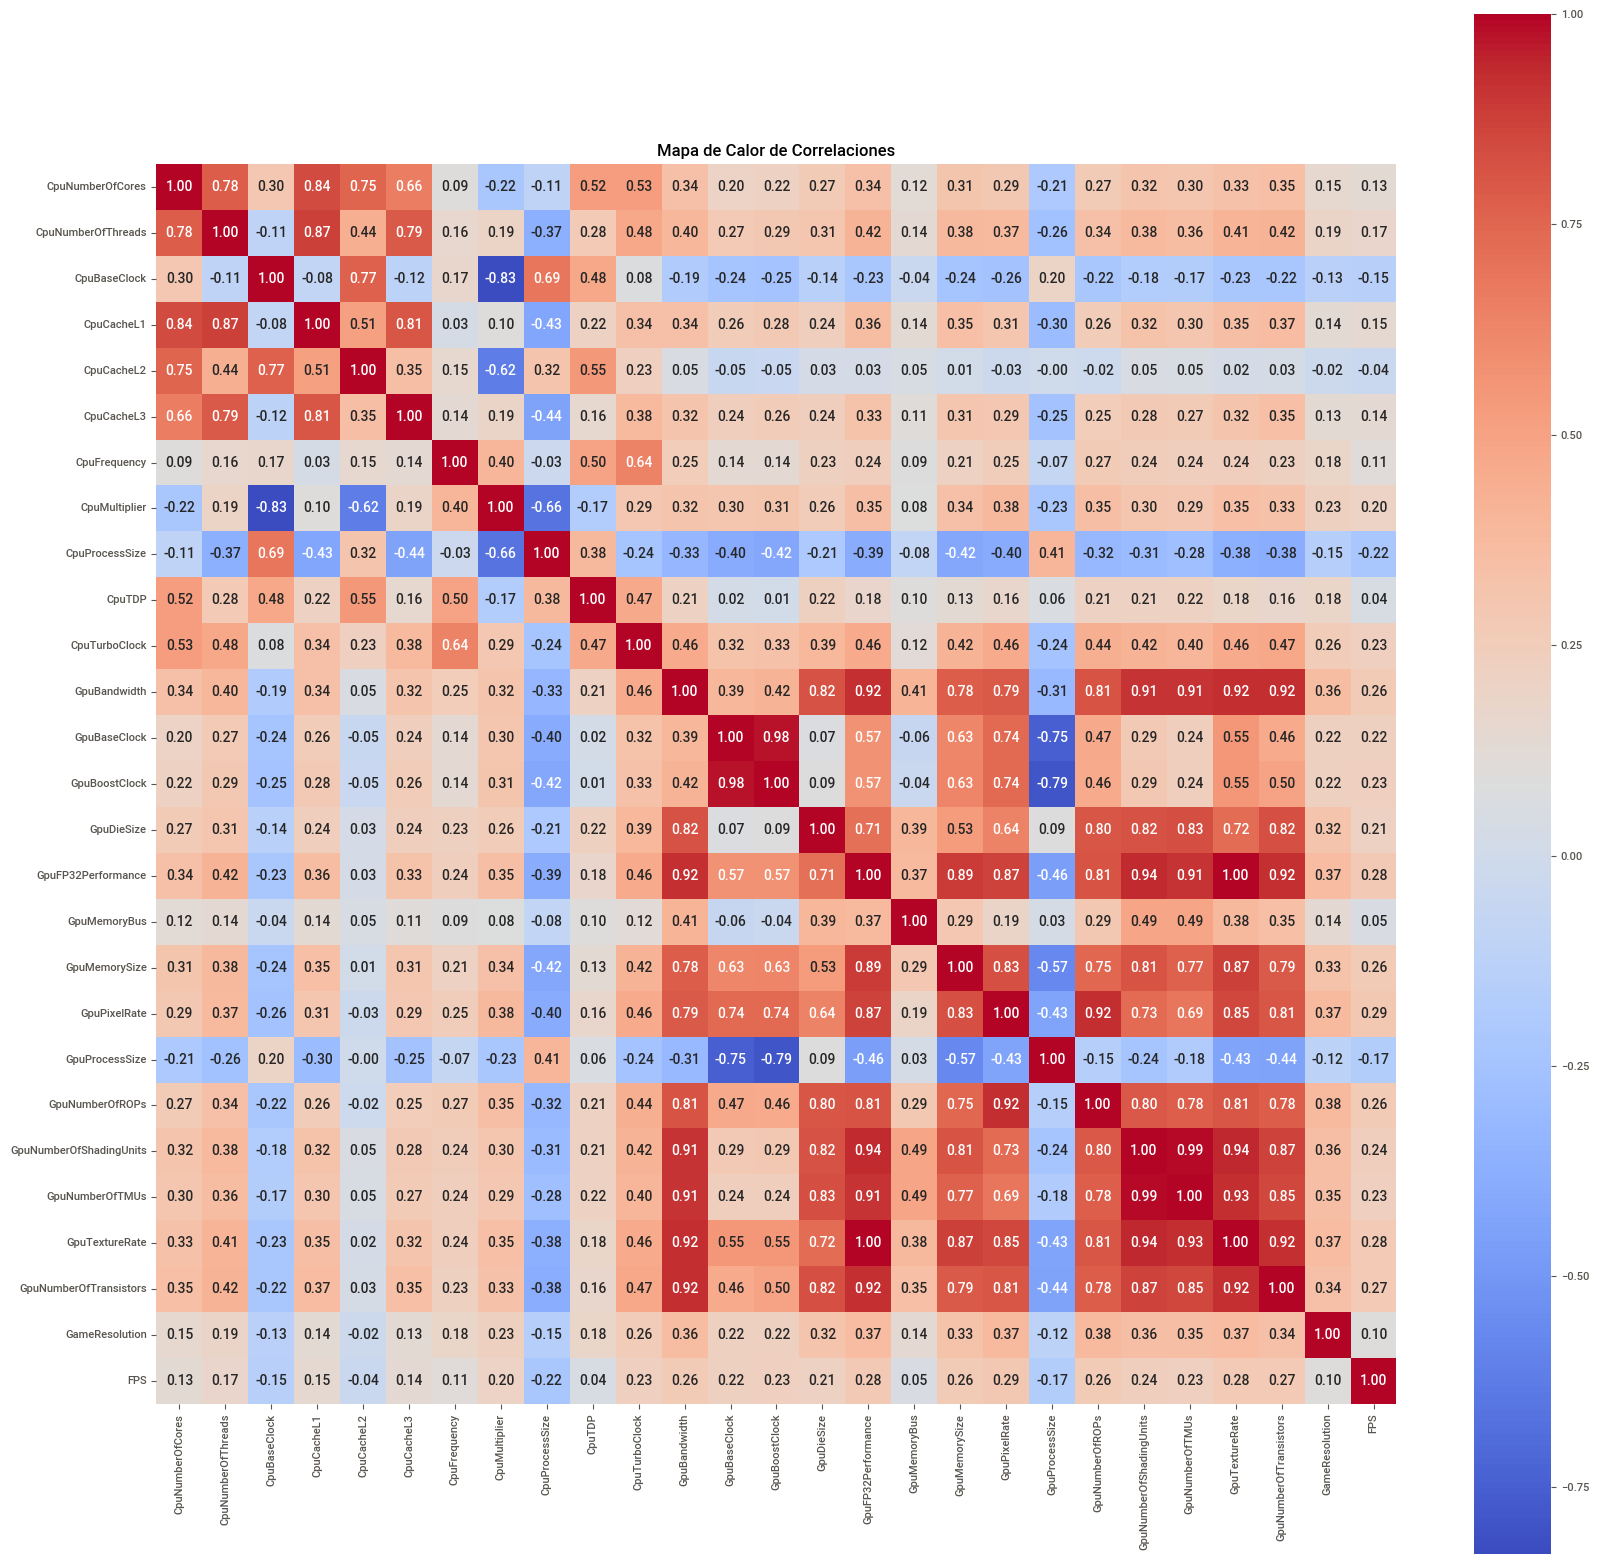

In [61]:
# Display heatmap graphic
plt.figure(figsize=(20, 20))
sns.heatmap(numerical_columns.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

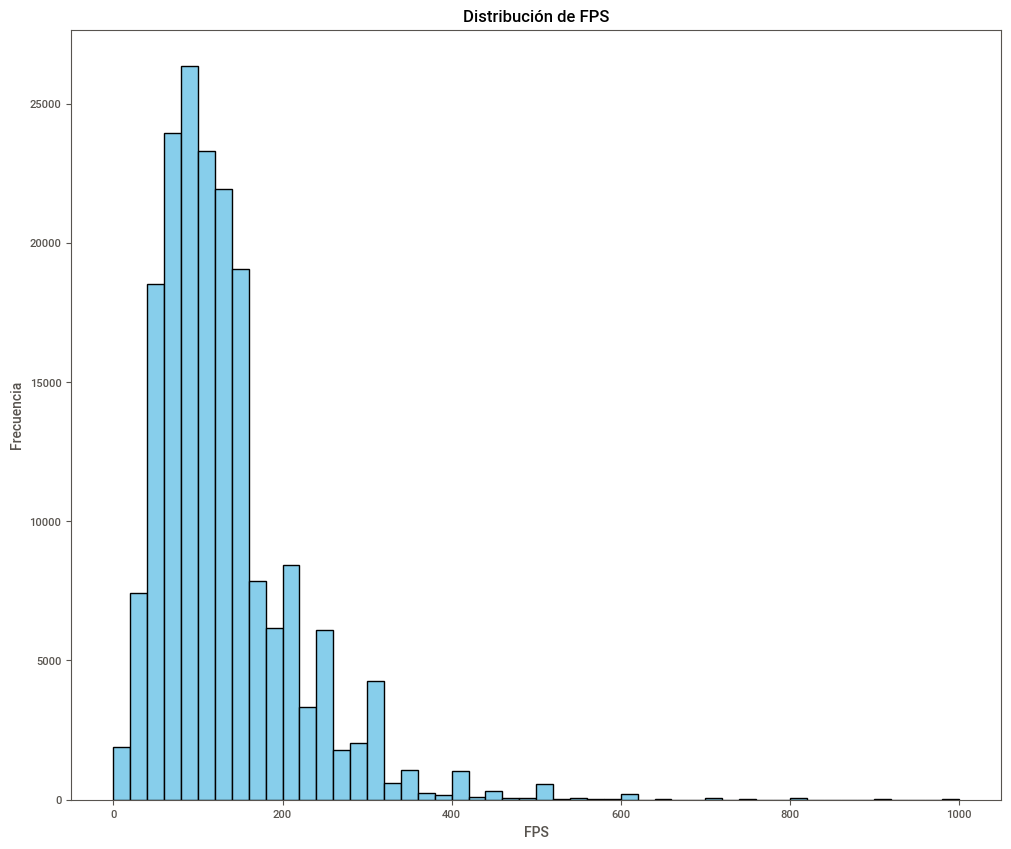

In [62]:
# FPS distribution
plt.figure(figsize=(12, 10))
plt.hist(df['FPS'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de FPS')
plt.xlabel('FPS')
plt.ylabel('Frecuencia')
plt.show()

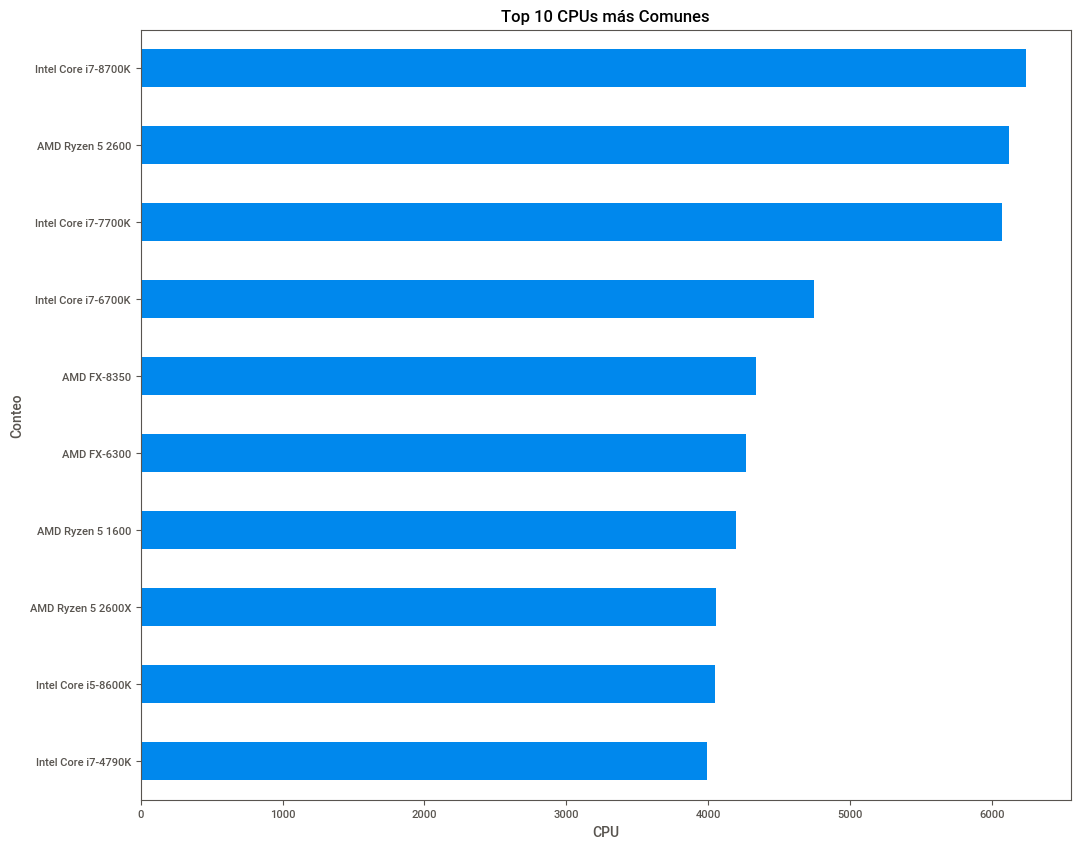

In [63]:
# Top 10 CPUs
cpu_counts = df['CpuName'].value_counts().head(10).sort_values(ascending=True)
plt.figure(figsize=(12, 10))
cpu_counts.plot(kind='barh')
plt.title('Top 10 CPUs más Comunes')
plt.xlabel('CPU')
plt.ylabel('Conteo')
plt.show()

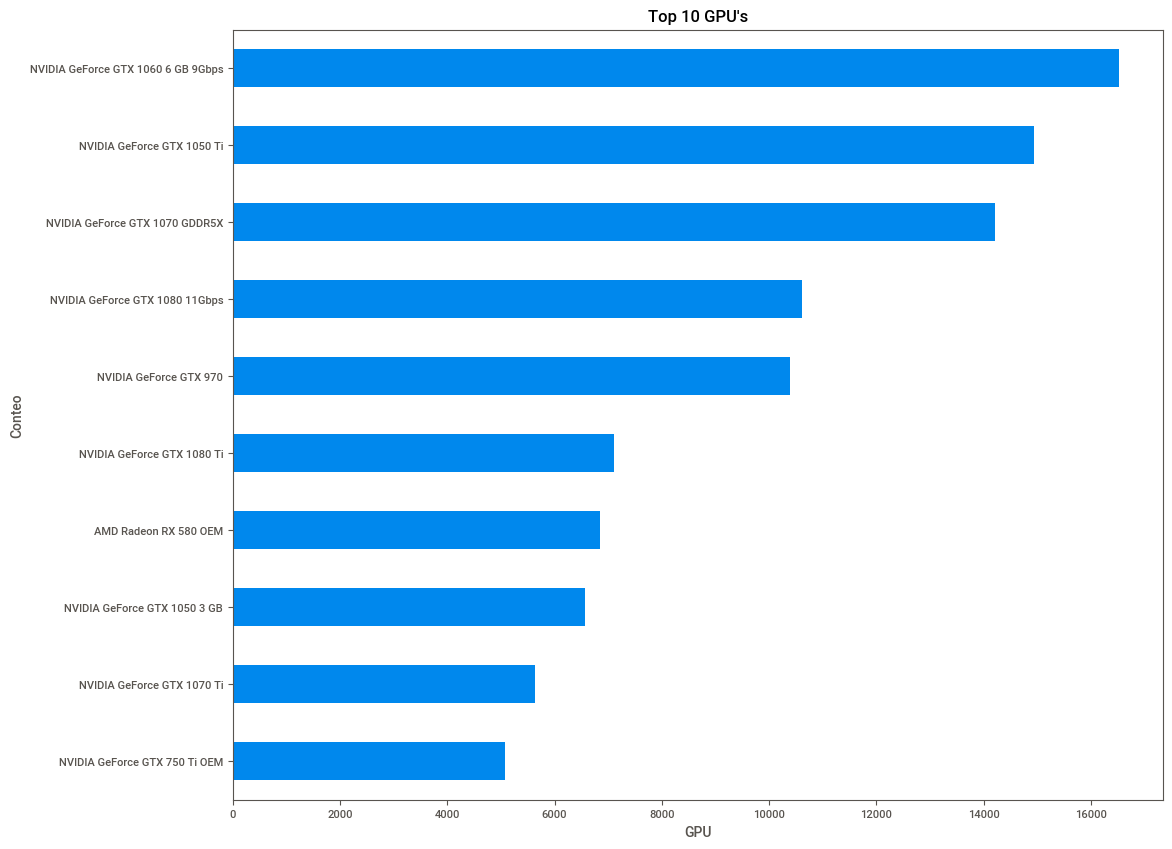

In [64]:
# Top 10 GPU's
cpu_counts = df['GpuName'].value_counts().head(10).sort_values(ascending=True)
plt.figure(figsize=(12, 10))
cpu_counts.plot(kind='barh')
plt.title('Top 10 GPU\'s')
plt.xlabel('GPU')
plt.ylabel('Conteo')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27900\93842206.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cpu_avg_fps[:10], x='CpuName', y='FPS', palette='viridis')


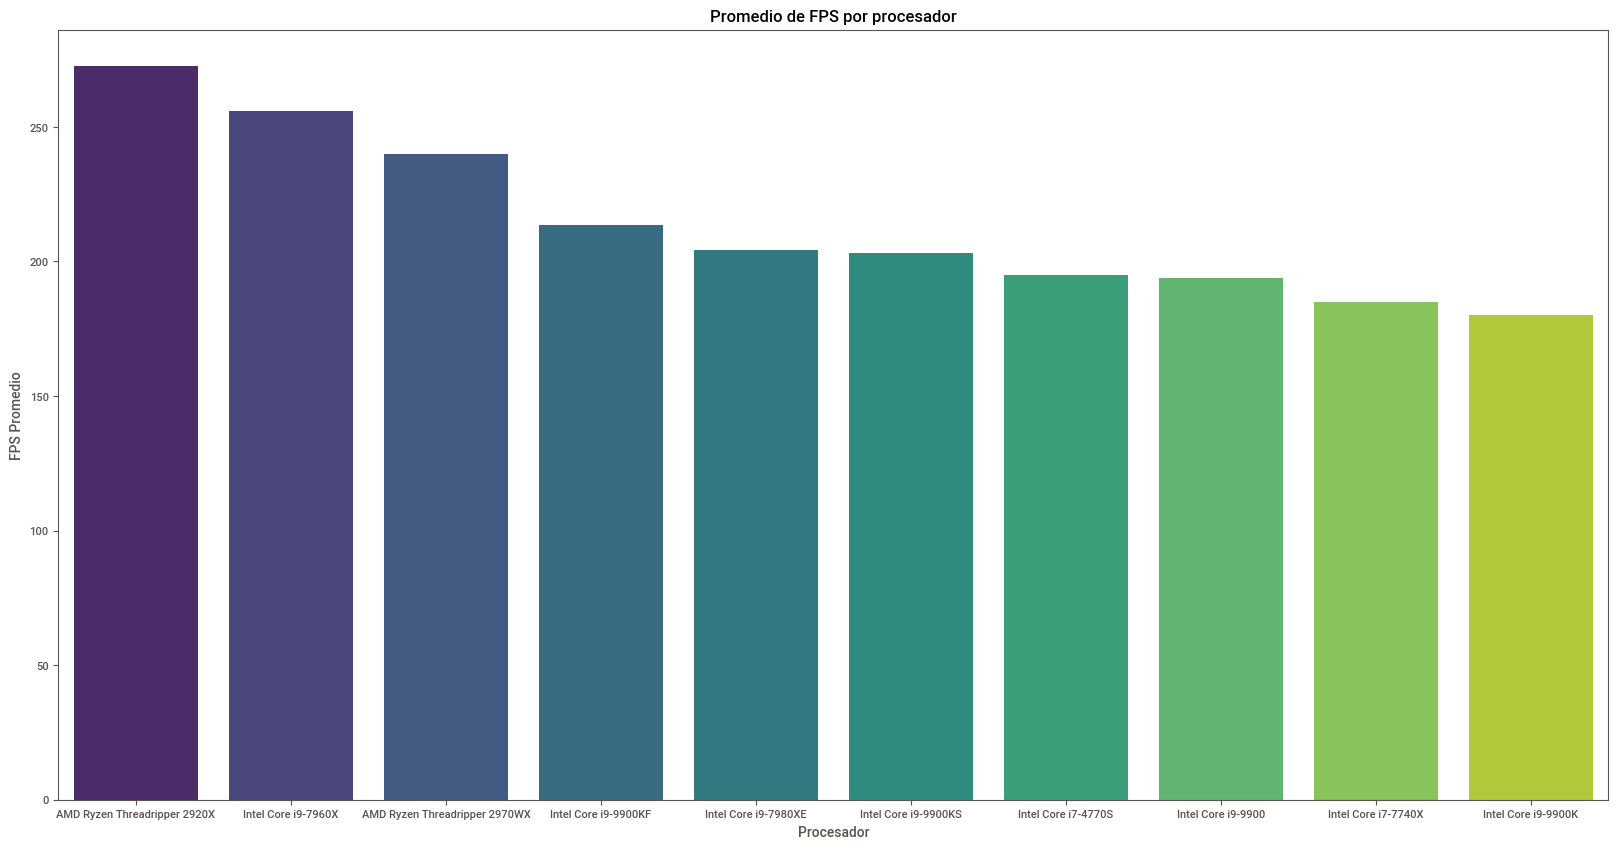

In [65]:
# Average FPS by CPU
cpu_avg_fps = df.groupby('CpuName')['FPS'].mean().reset_index().sort_values(by='FPS', ascending=False)
plt.figure(figsize=(20, 10))
sns.barplot(data=cpu_avg_fps[:10], x='CpuName', y='FPS', palette='viridis')
plt.title('Promedio de FPS por procesador')
plt.xlabel('Procesador')
plt.ylabel('FPS Promedio')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27900\3799835964.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gpu_avg_fps[:10], x='GpuName', y='FPS', palette='viridis')


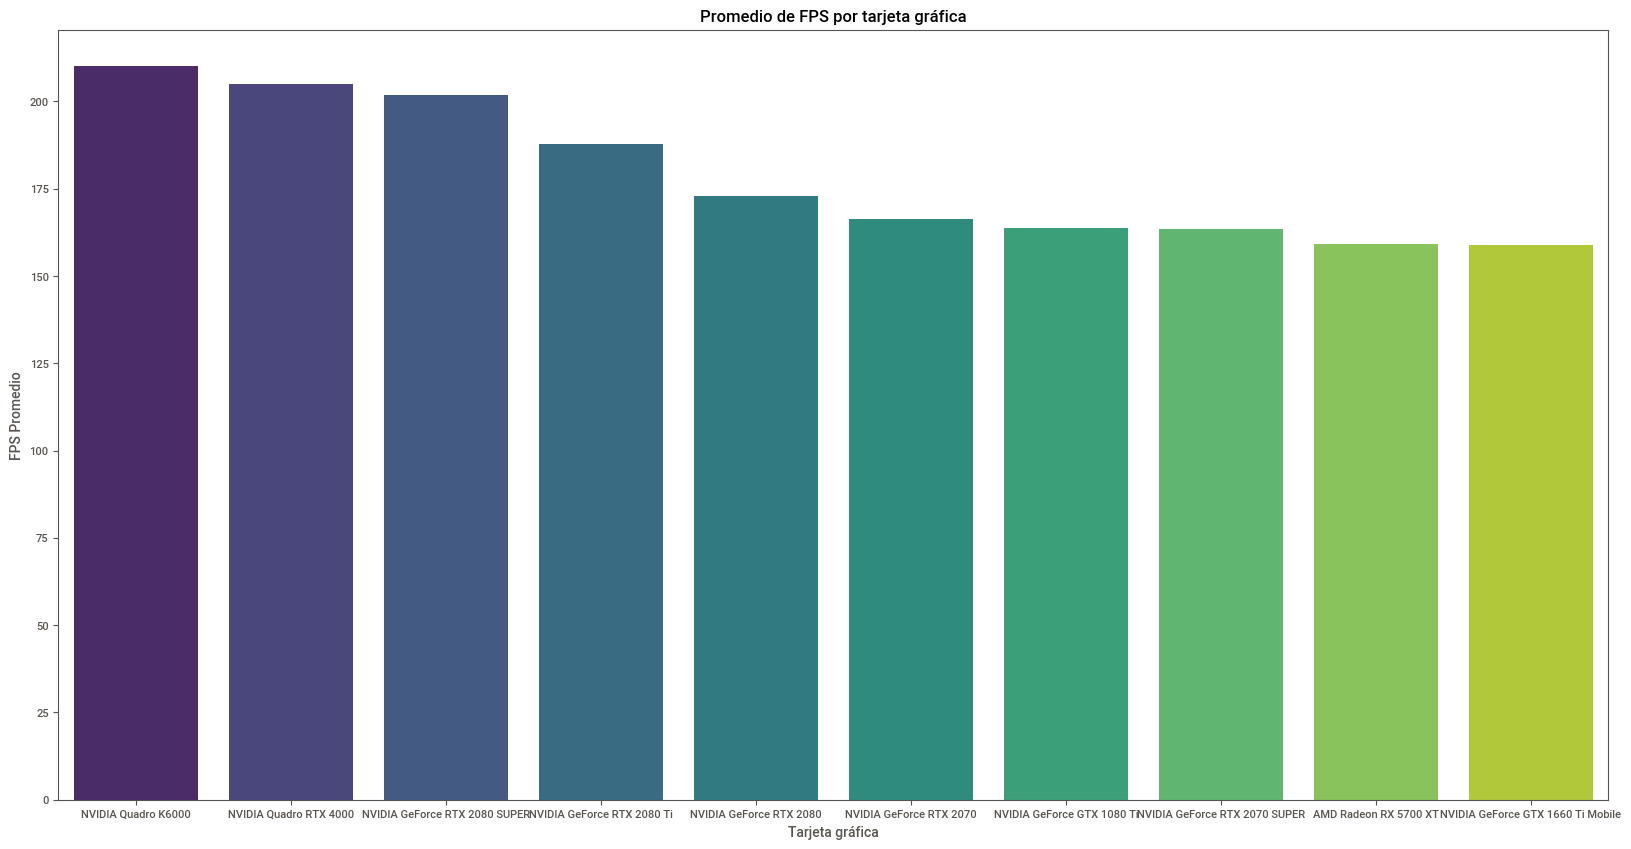

In [66]:
# Average FPS by GPU
gpu_avg_fps = df.groupby('GpuName')['FPS'].mean().reset_index().sort_values(by='FPS', ascending=False)
plt.figure(figsize=(20, 10))
sns.barplot(data=gpu_avg_fps[:10], x='GpuName', y='FPS', palette='viridis')
plt.title('Promedio de FPS por tarjeta gráfica')
plt.xlabel('Tarjeta gráfica')
plt.ylabel('FPS Promedio')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27900\2344337297.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_fps, x='GameSetting', y='FPS', palette='viridis')


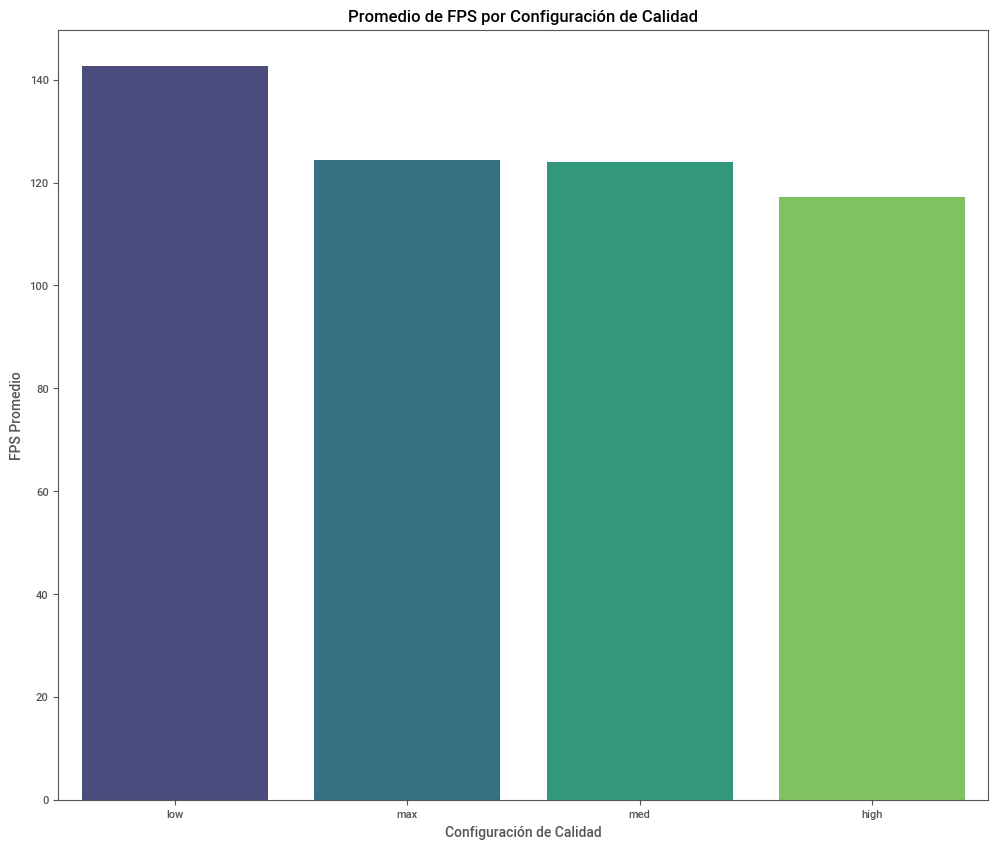

In [67]:
# Average FPS by Game Setting
avg_fps = df.groupby('GameSetting')['FPS'].mean().reset_index().sort_values(by='FPS', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(data=avg_fps, x='GameSetting', y='FPS', palette='viridis')
plt.title('Promedio de FPS por Configuración de Calidad')
plt.xlabel('Configuración de Calidad')
plt.ylabel('FPS Promedio')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27900\1578750986.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_fps_cores, x='CpuNumberOfCores', y='FPS', palette='coolwarm')


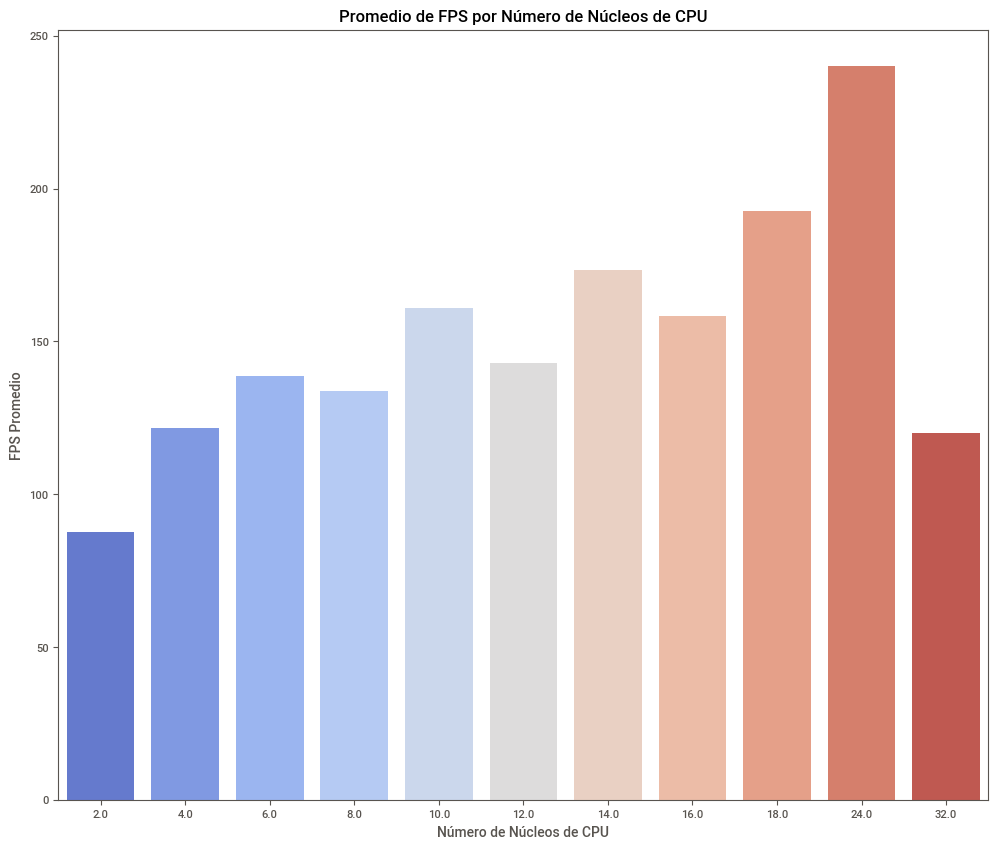

In [68]:
# Average FPS by CPUNumberOfCores
avg_fps_cores = df.groupby('CpuNumberOfCores')['FPS'].mean().reset_index()
plt.figure(figsize=(12, 10))
sns.barplot(data=avg_fps_cores, x='CpuNumberOfCores', y='FPS', palette='coolwarm')
plt.title('Promedio de FPS por Número de Núcleos de CPU')
plt.xlabel('Número de Núcleos de CPU')
plt.ylabel('FPS Promedio')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27900\3967694499.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_fps_per_game.sort_values('FPS', ascending=False).head(10), x='FPS', y='GameName', palette='plasma')


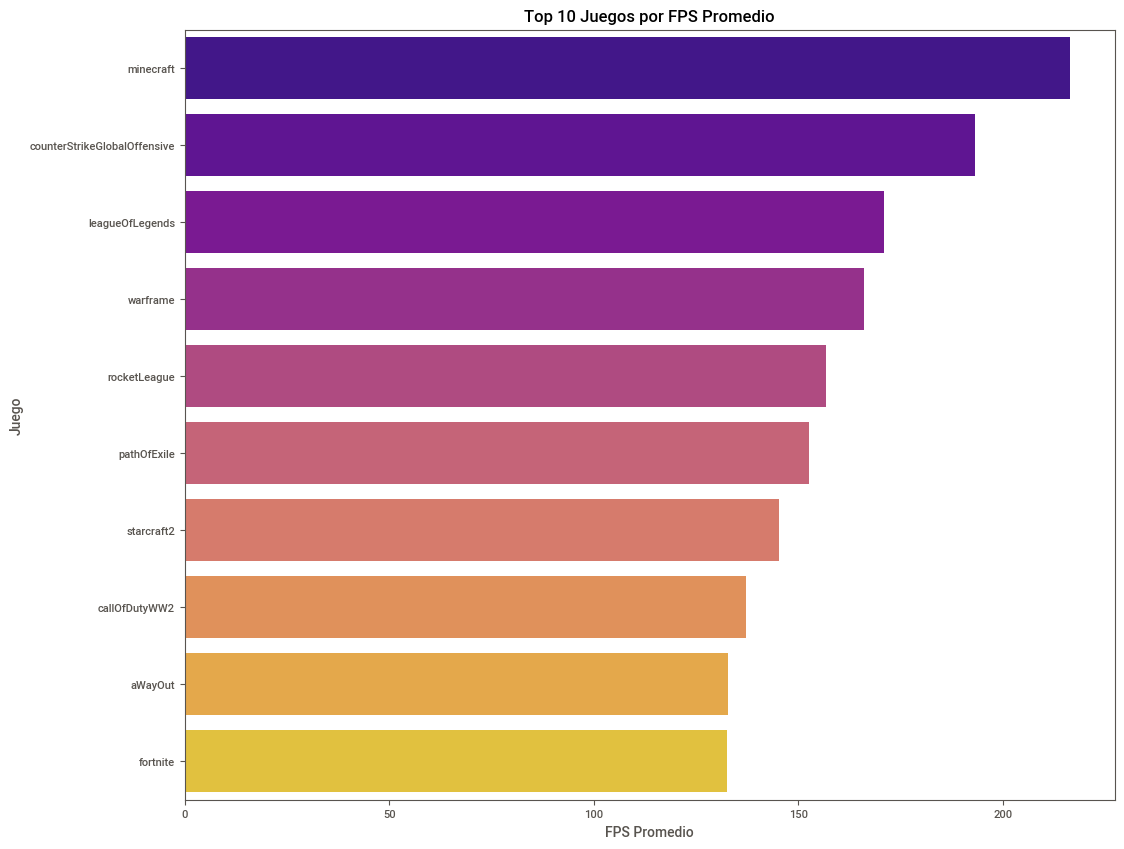

In [69]:
# Top 10 Games by Average FPS
avg_fps_per_game = df.groupby('GameName')['FPS'].mean().reset_index()
plt.figure(figsize=(12, 10))
sns.barplot(data=avg_fps_per_game.sort_values('FPS', ascending=False).head(10), x='FPS', y='GameName', palette='plasma')
plt.title('Top 10 Juegos por FPS Promedio')
plt.xlabel('FPS Promedio')
plt.ylabel('Juego')
plt.show()

# Clean Data Analysis Report

In [70]:
clean_report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)


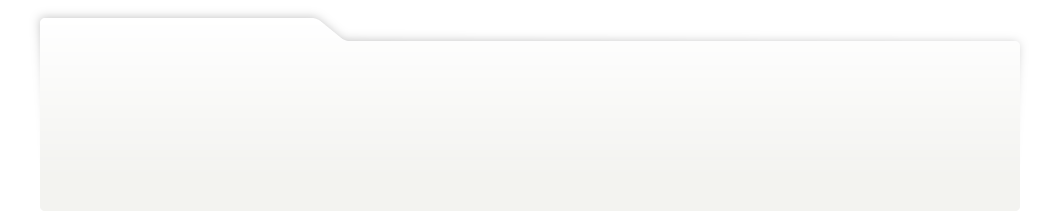
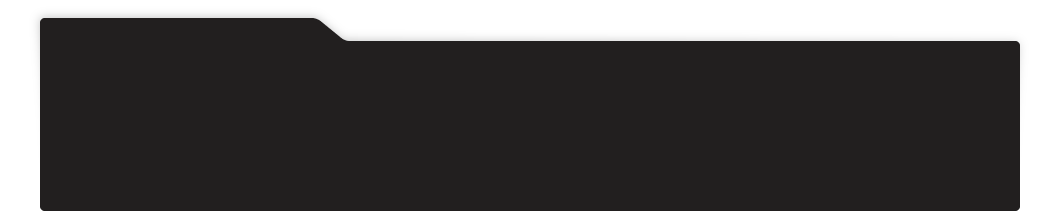
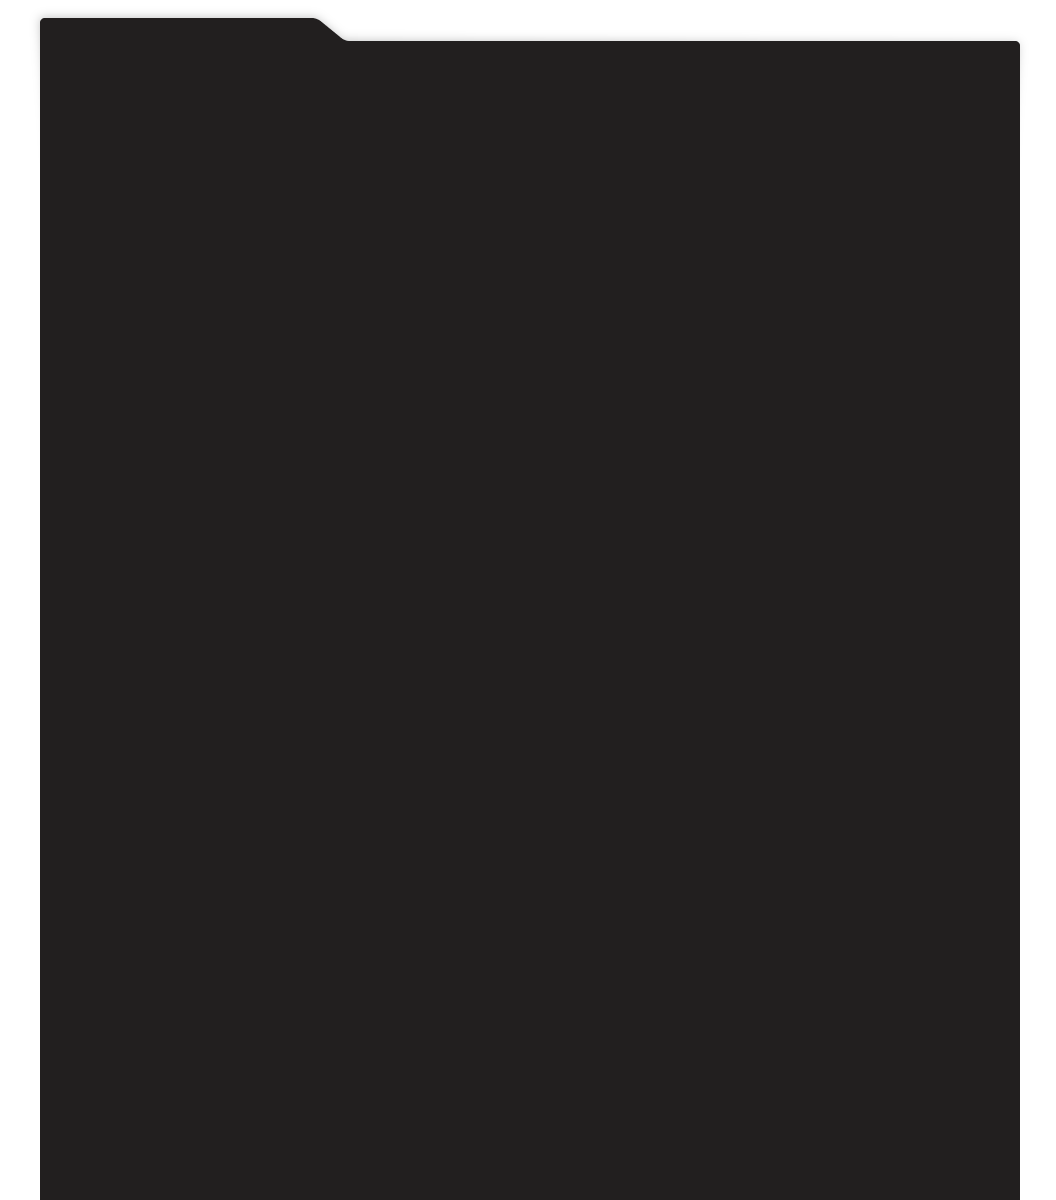
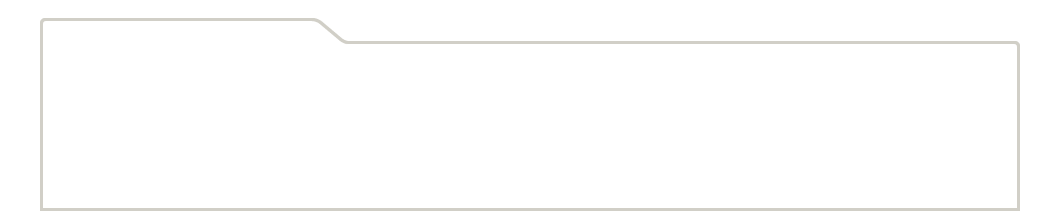
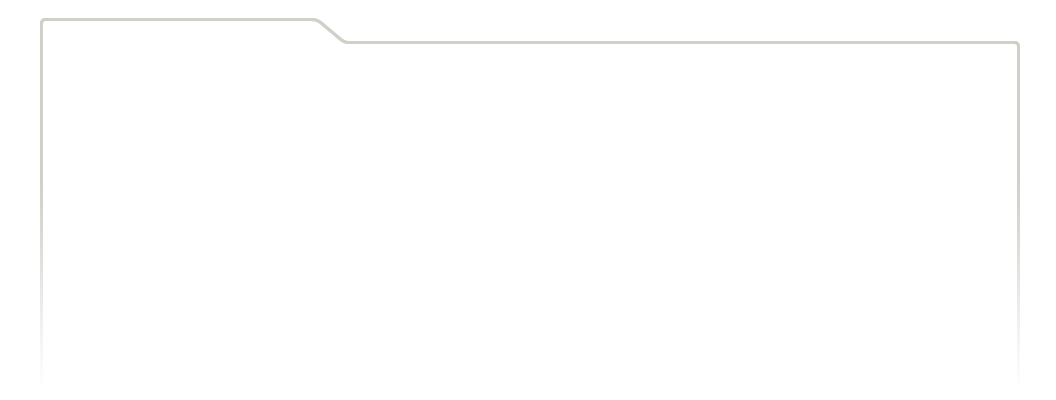
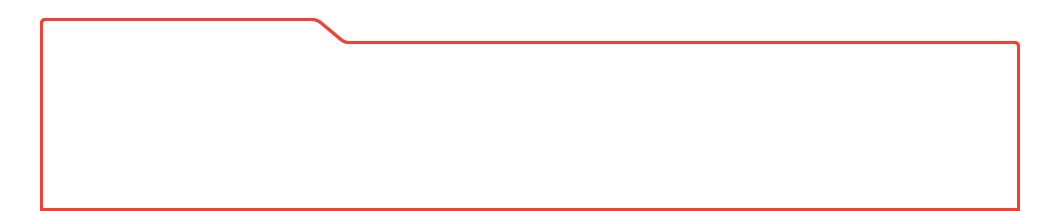
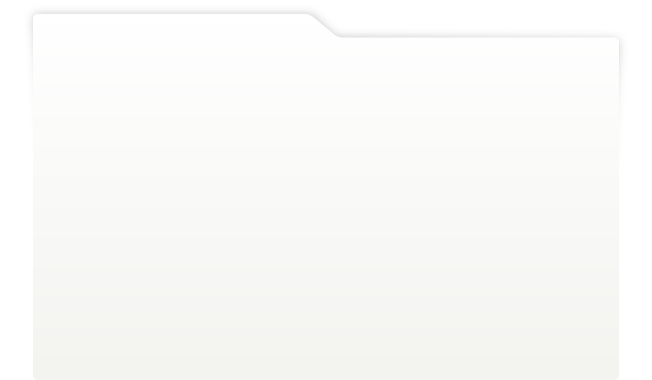
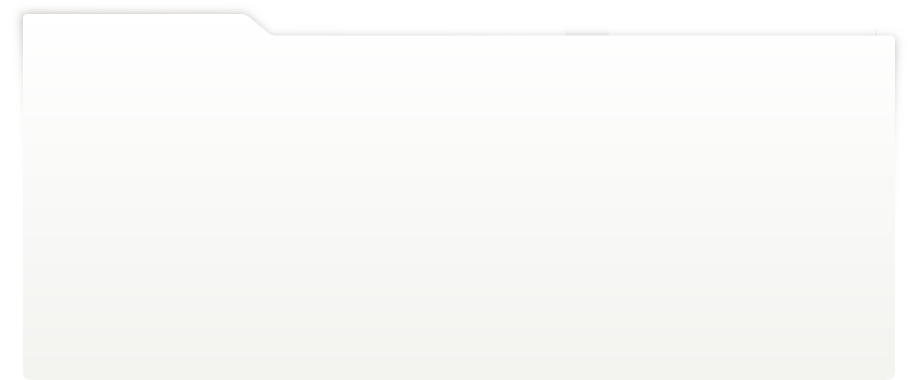
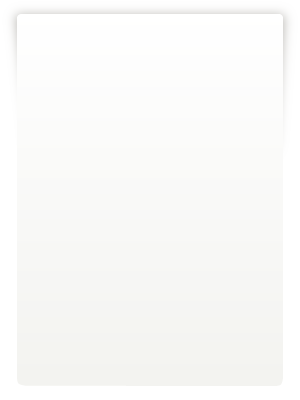
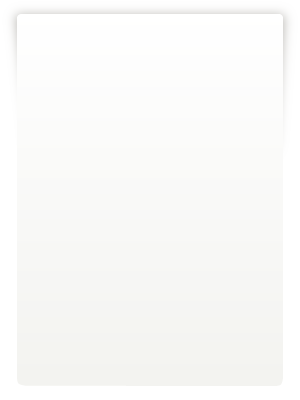
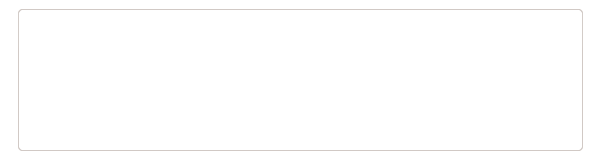
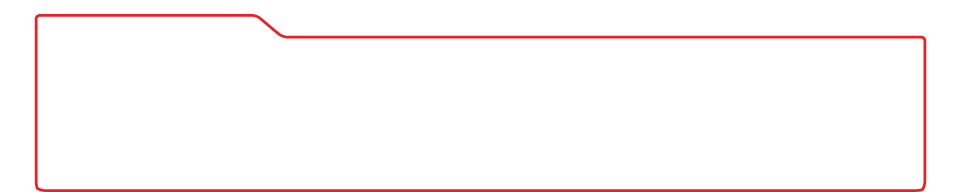
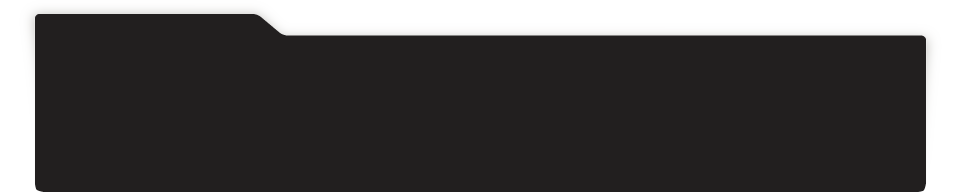
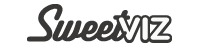
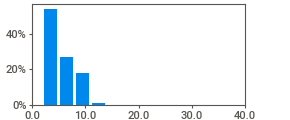
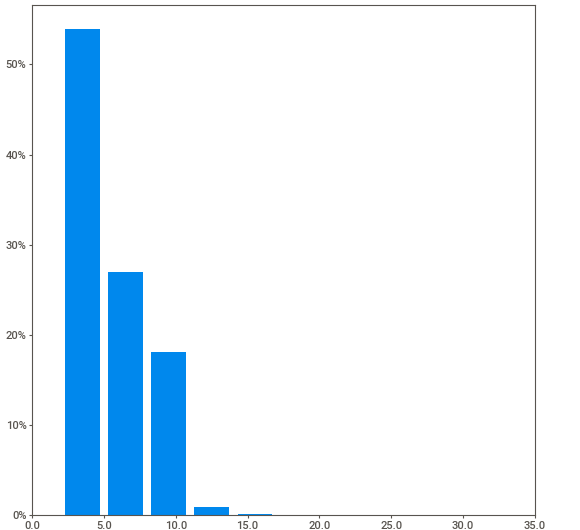
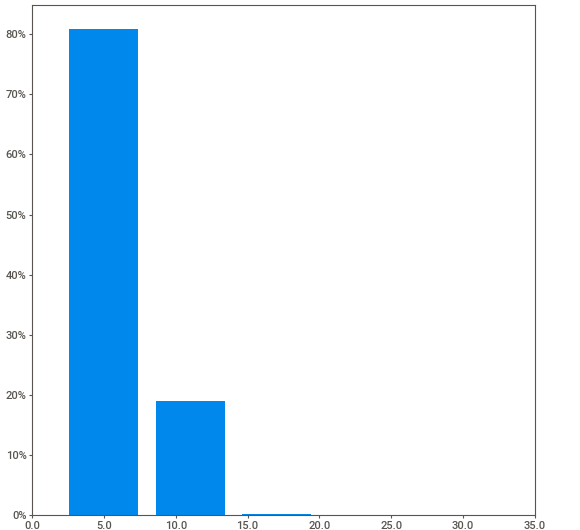
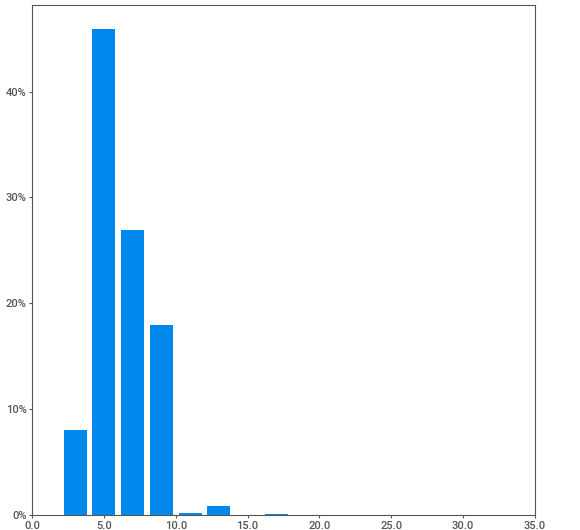
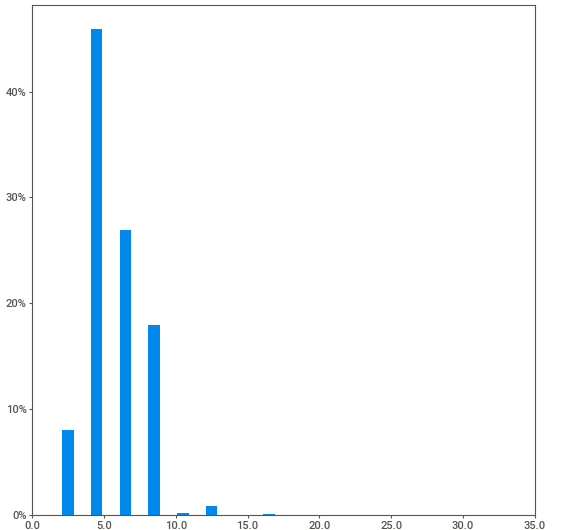
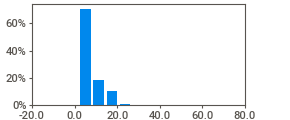
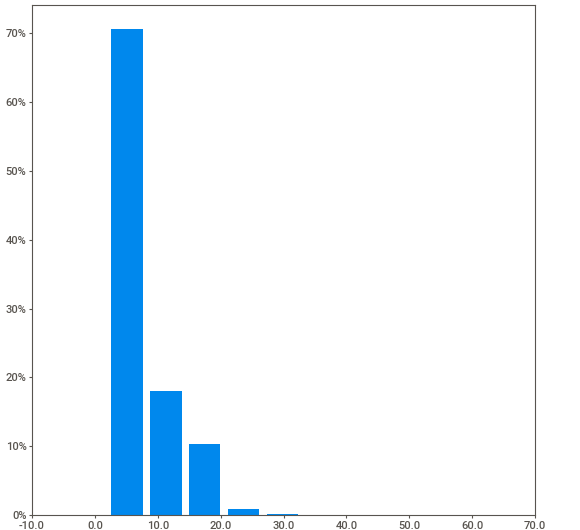
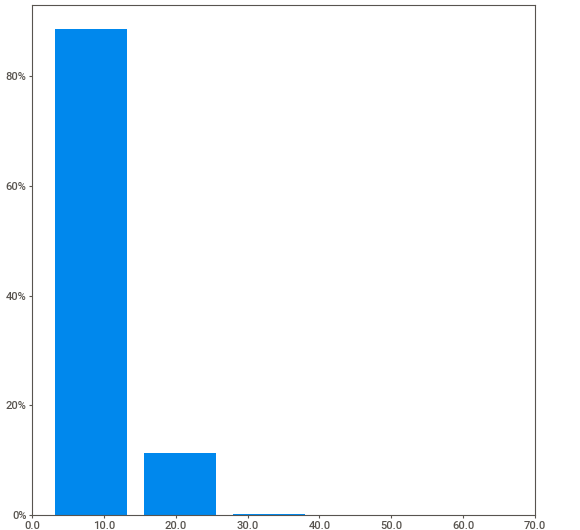
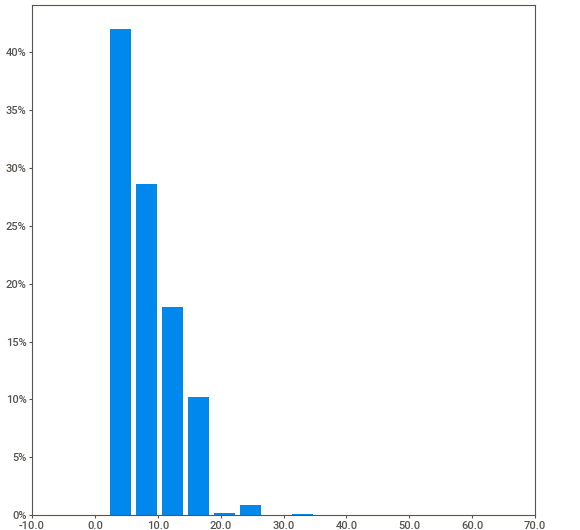
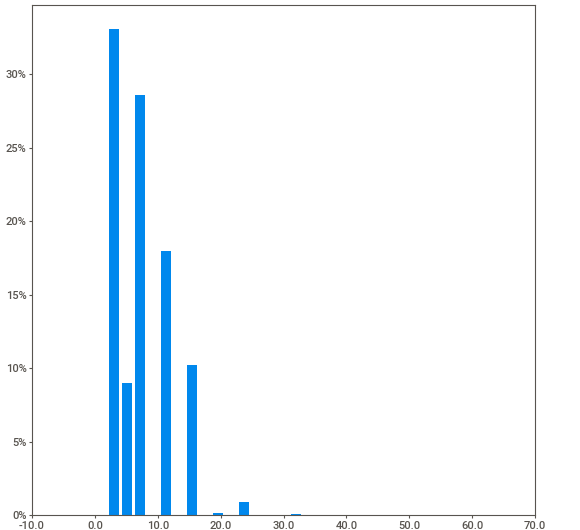
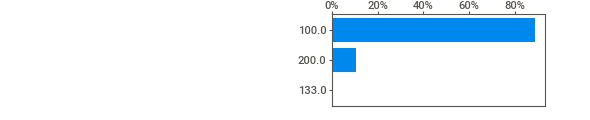
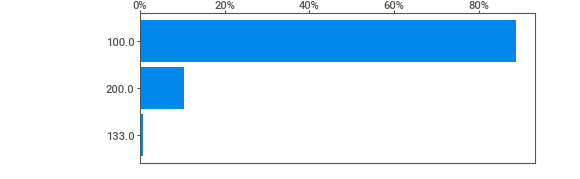
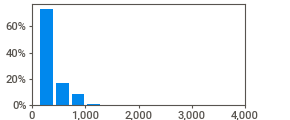
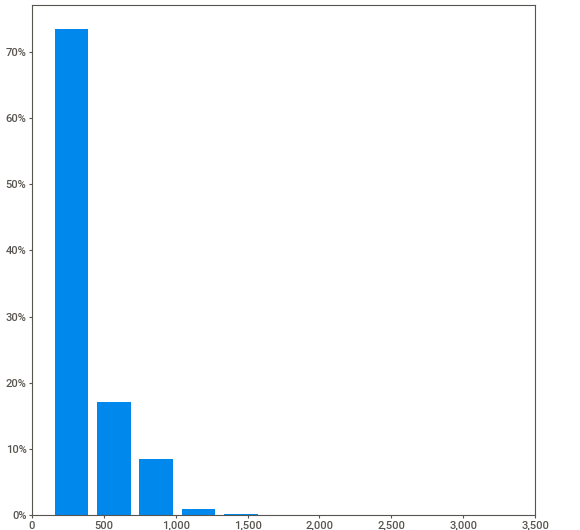
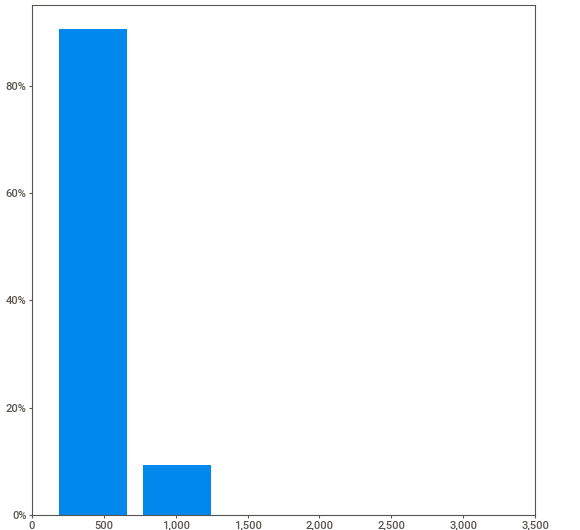
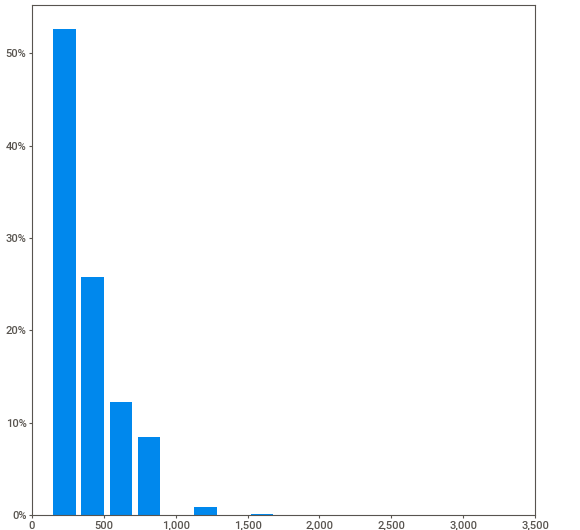
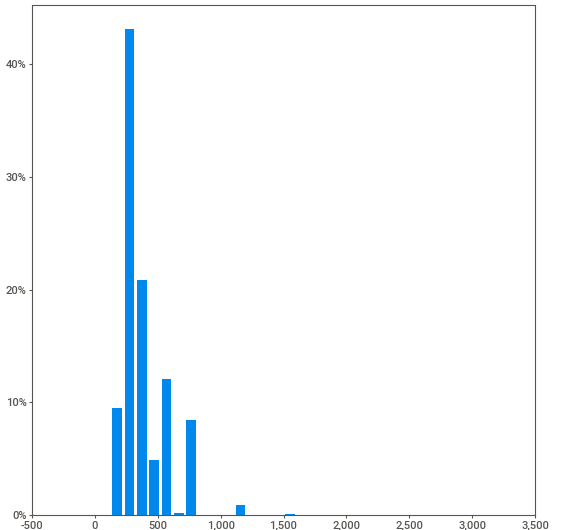
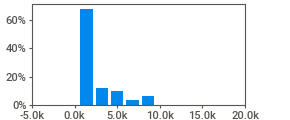
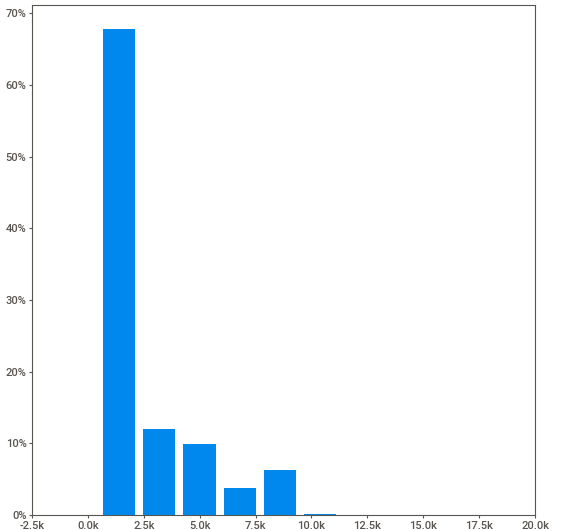
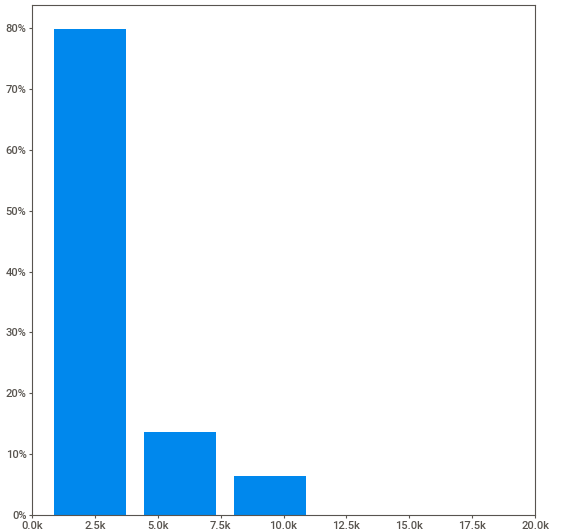
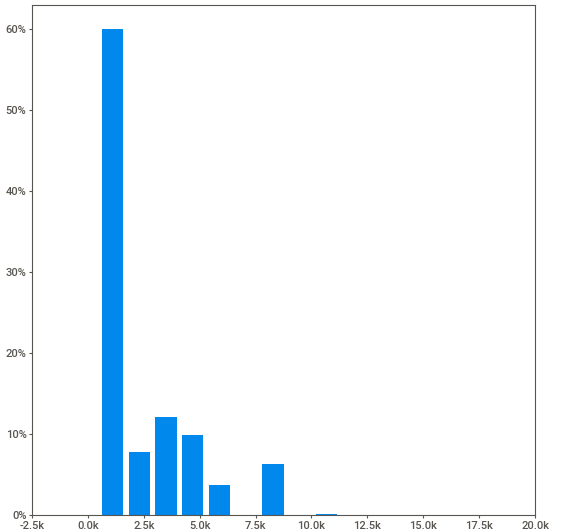
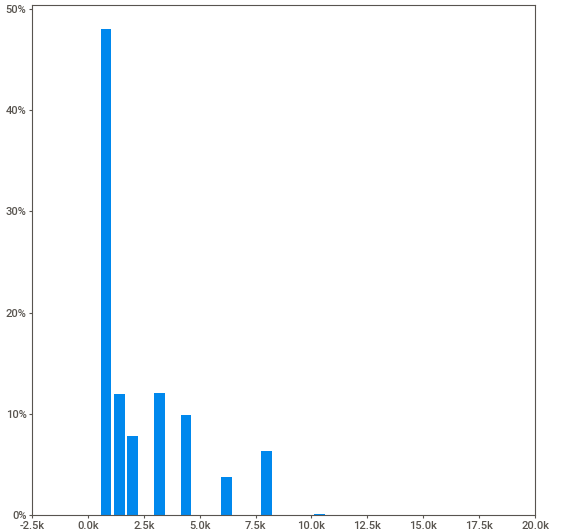
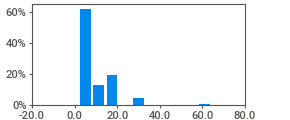
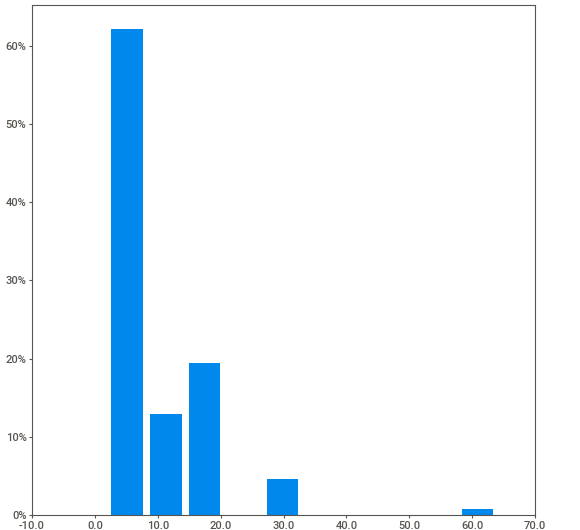
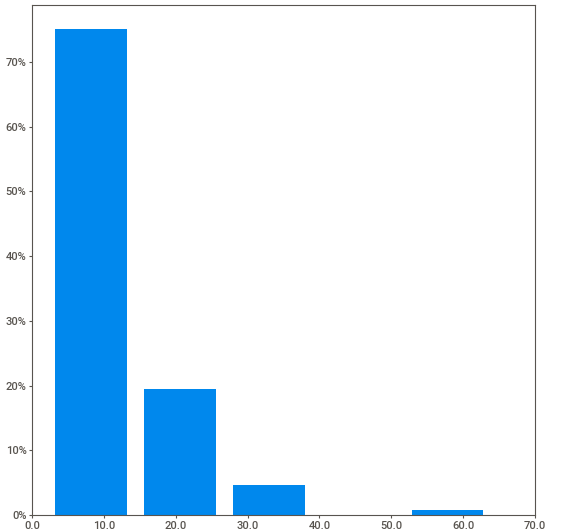
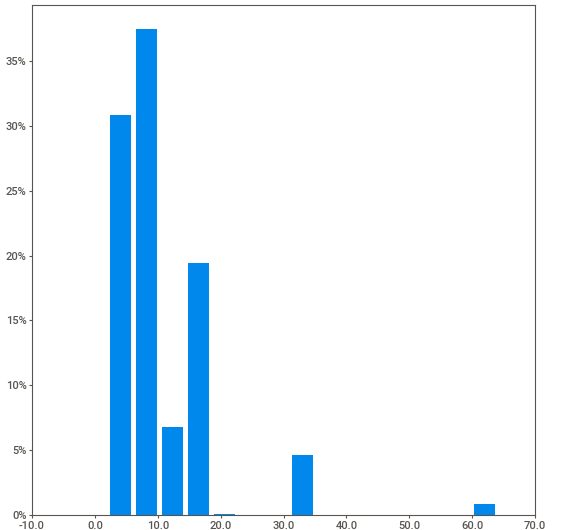
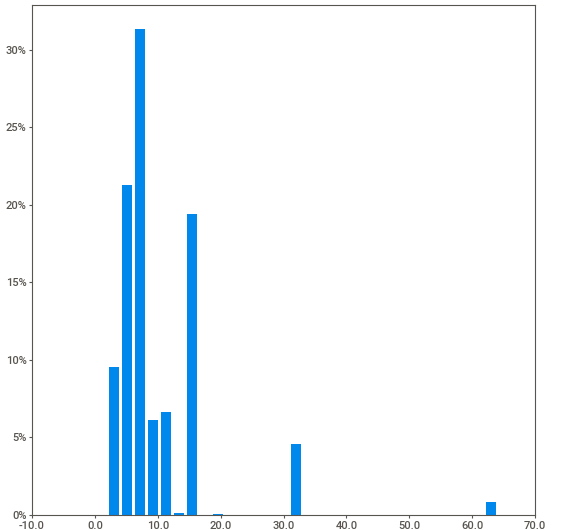
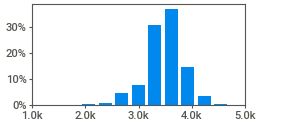
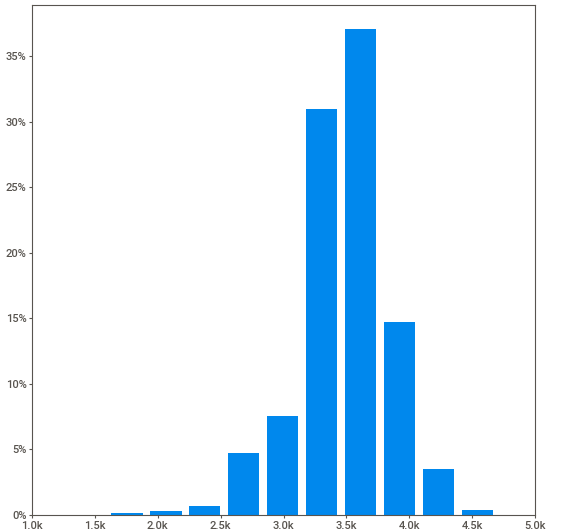
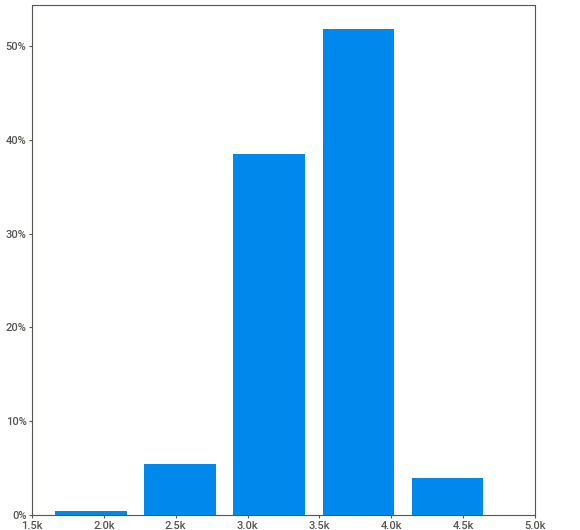
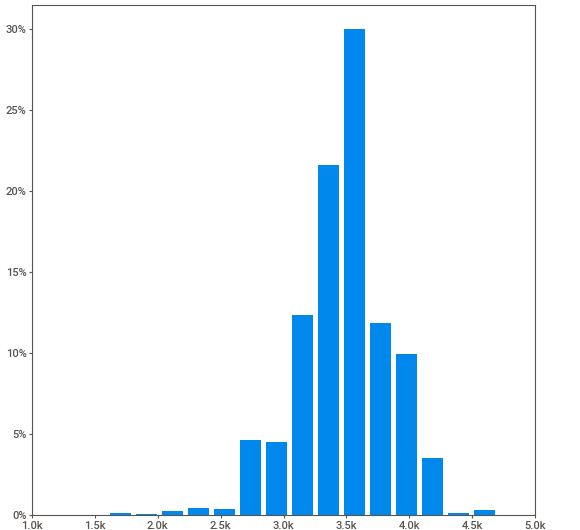
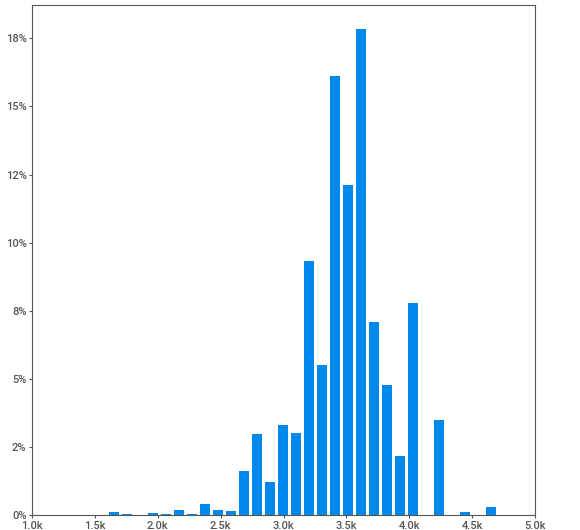
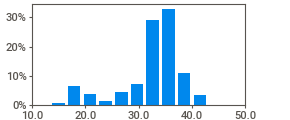
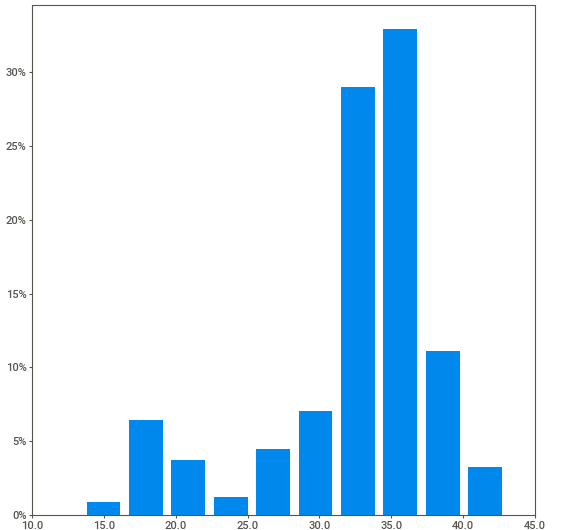
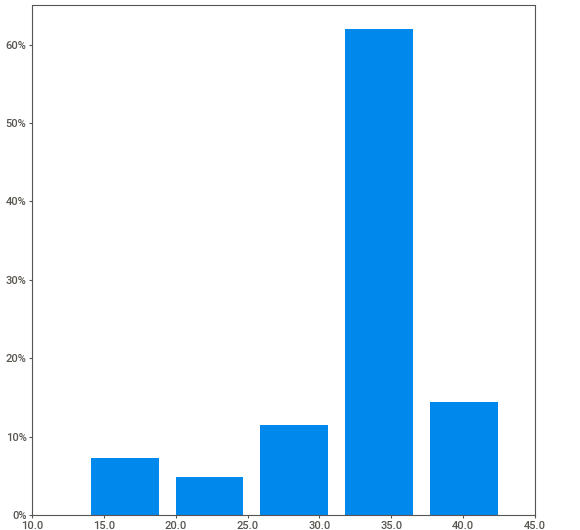
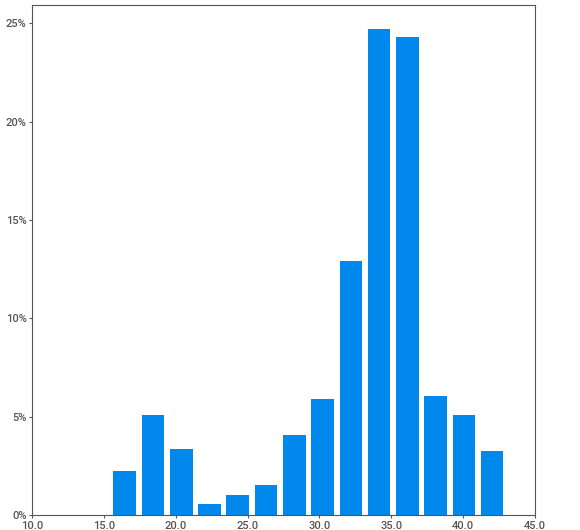
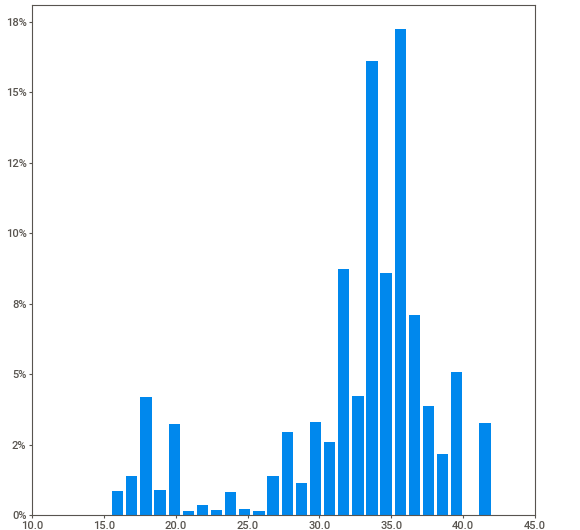
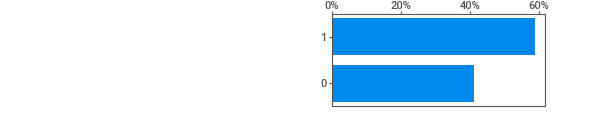
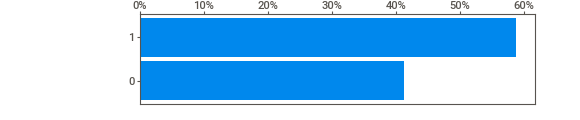
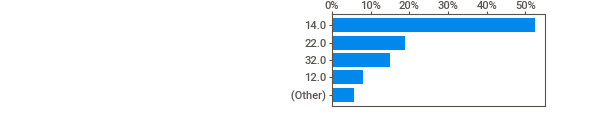
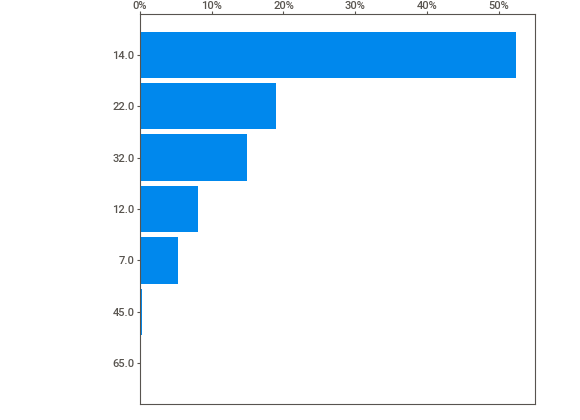
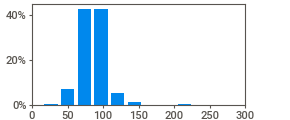
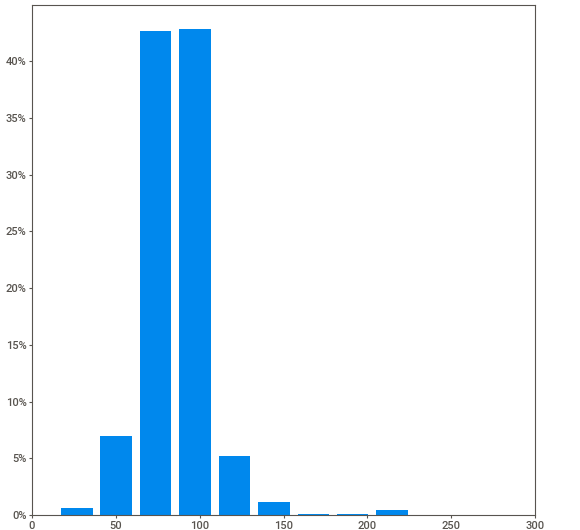
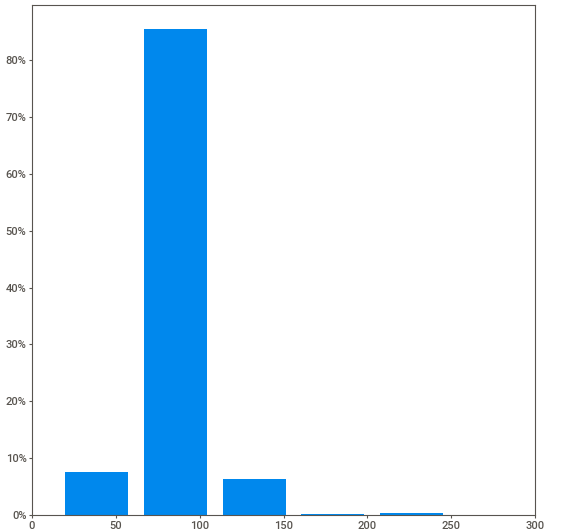
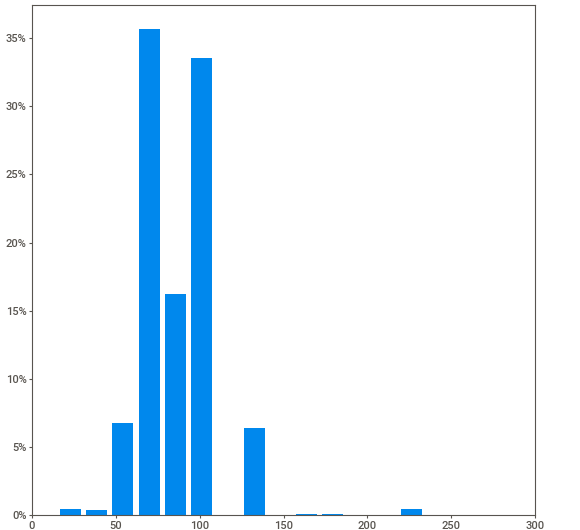
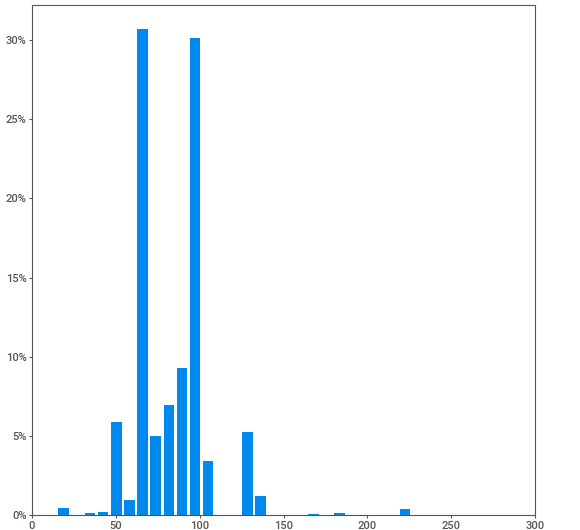
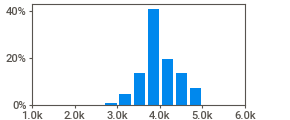
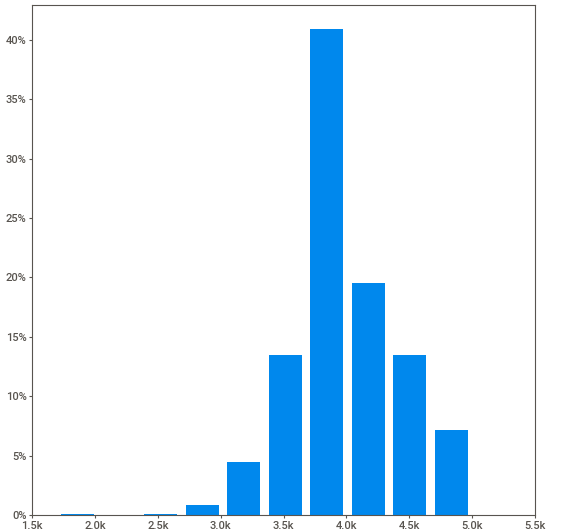
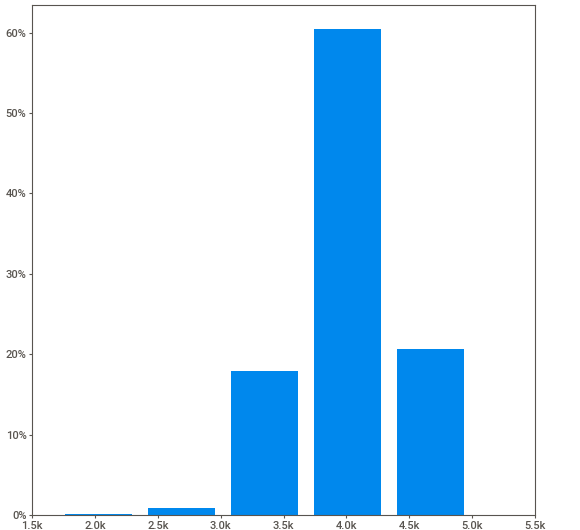
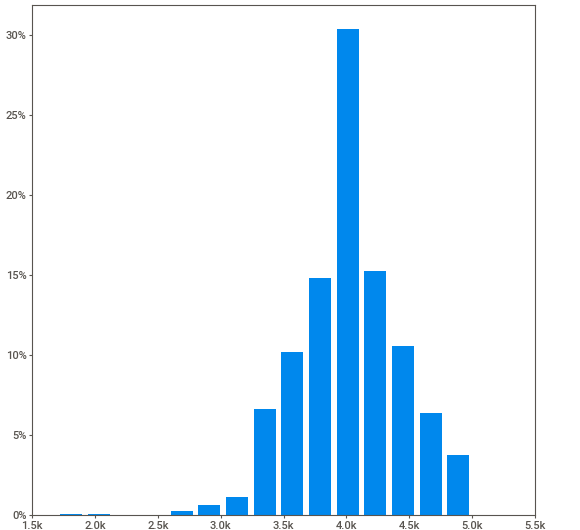
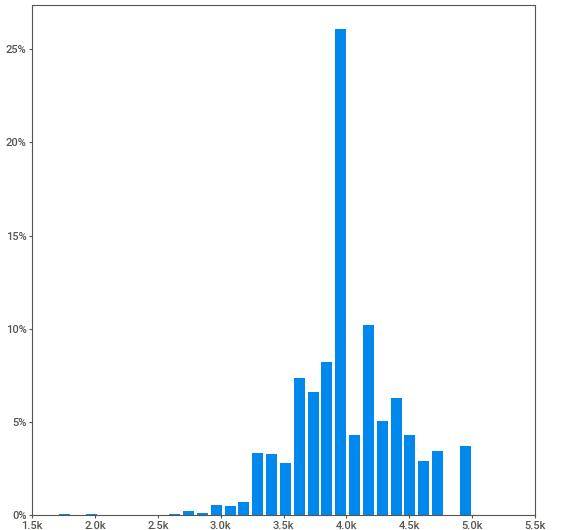
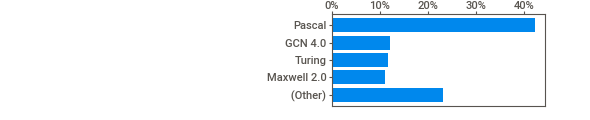
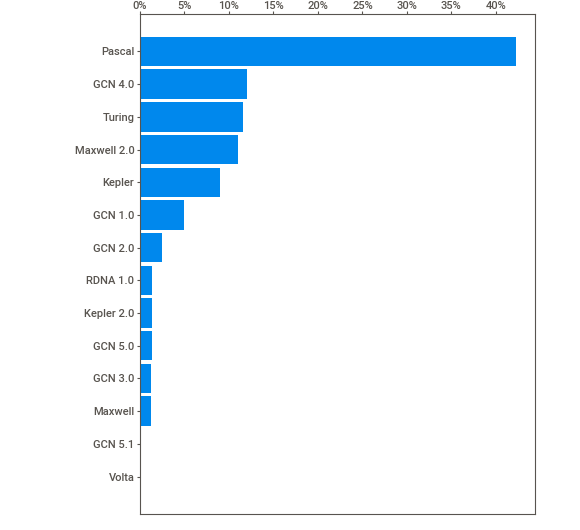
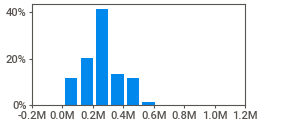
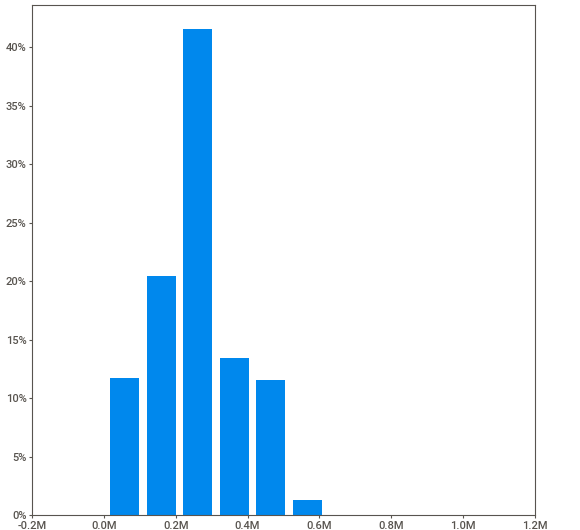
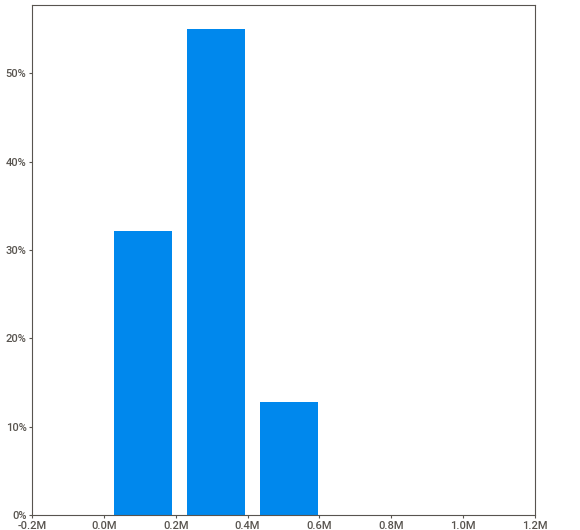
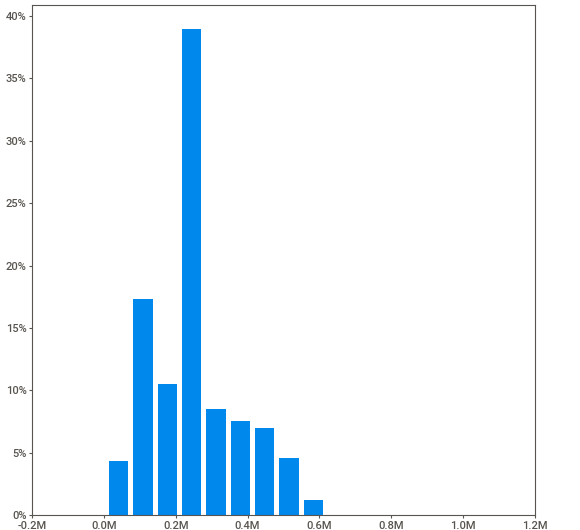
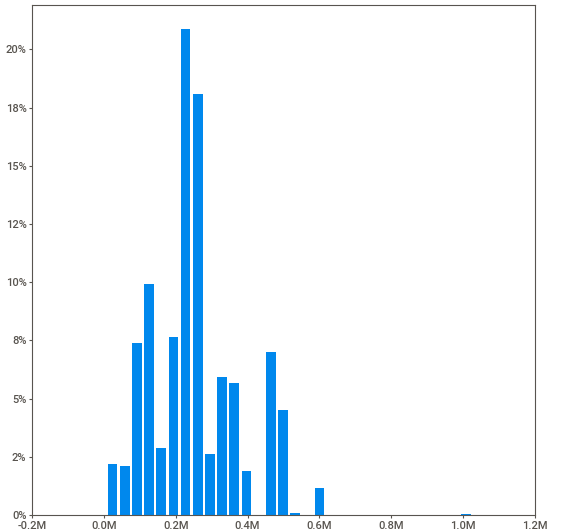
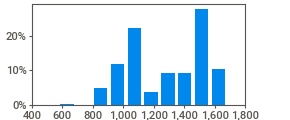
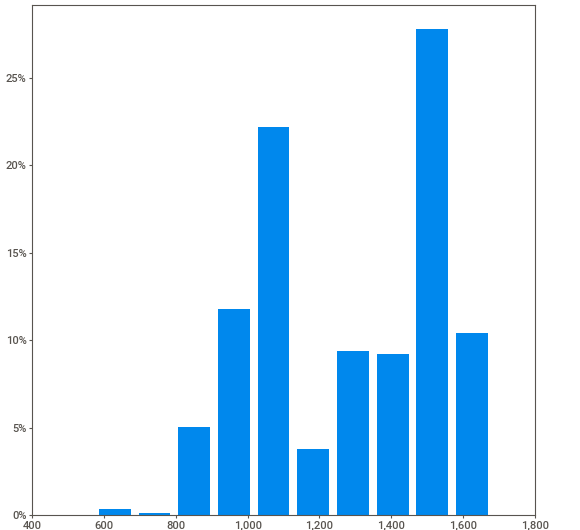
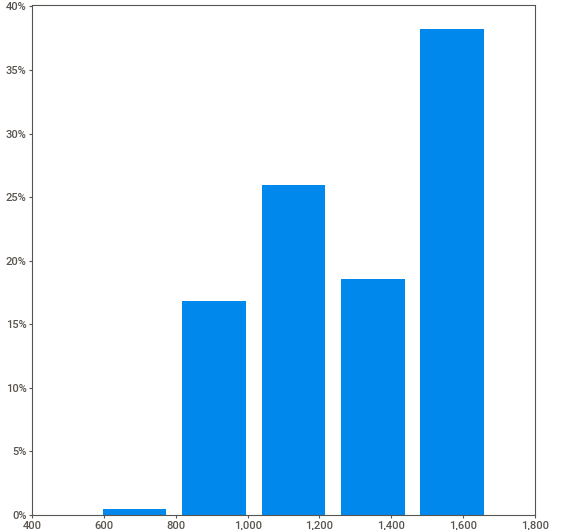
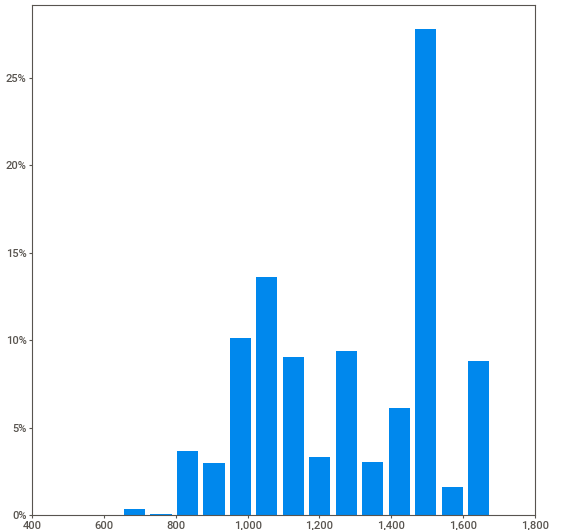
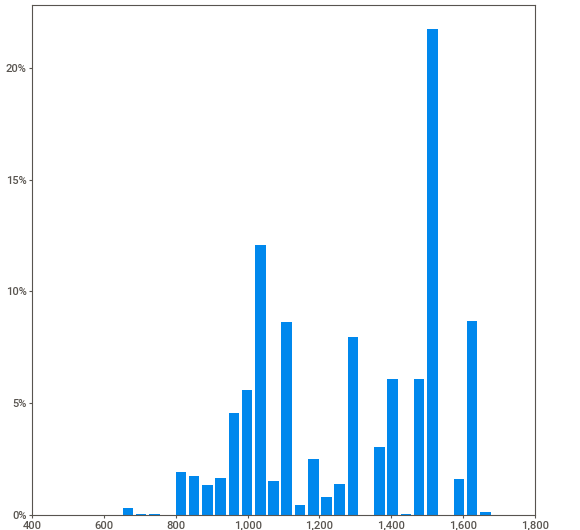
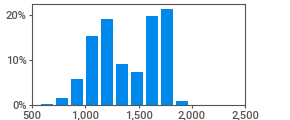
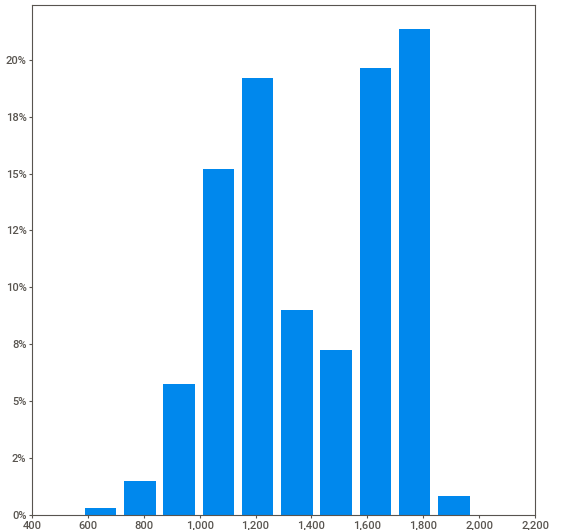
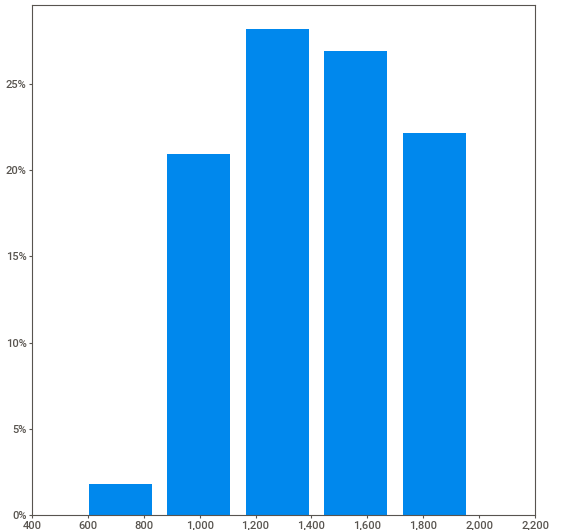
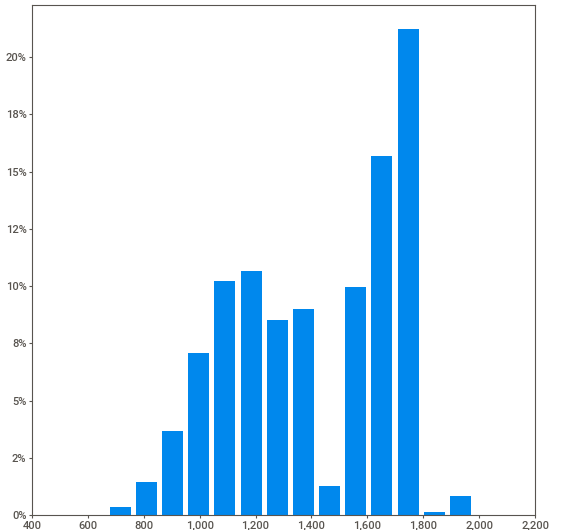
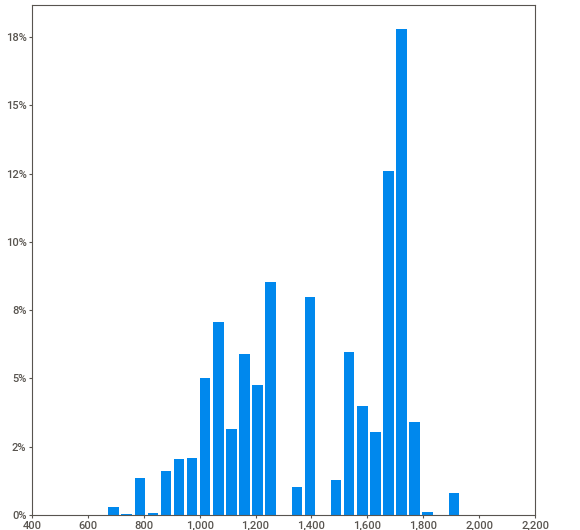
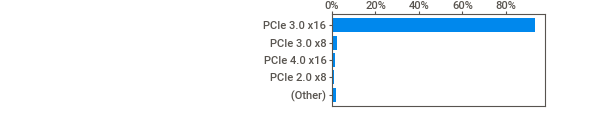
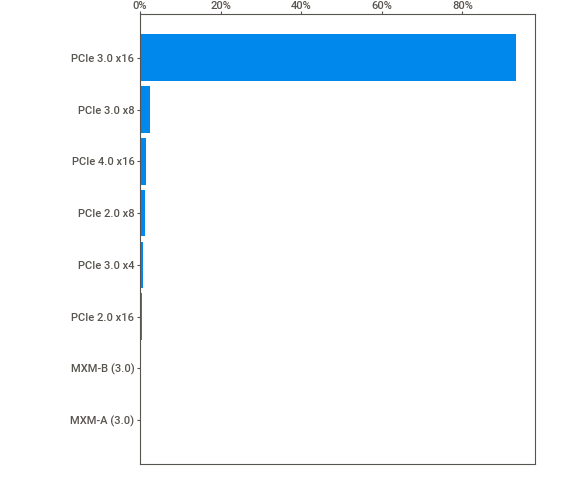
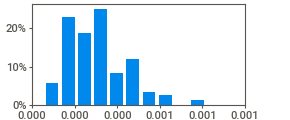
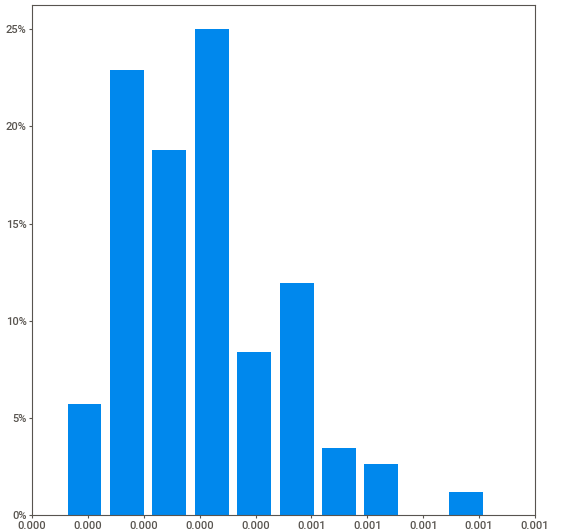
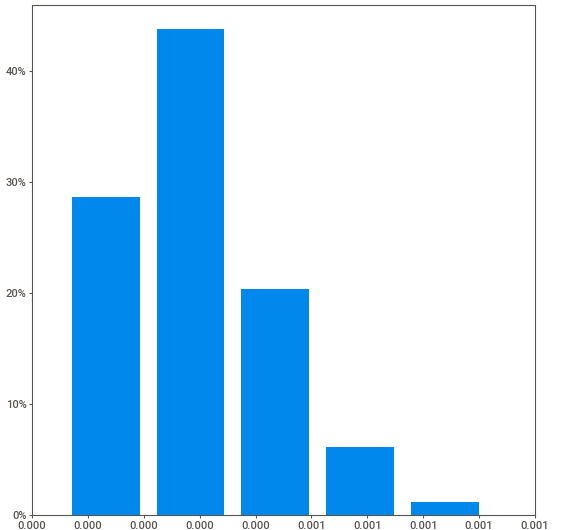
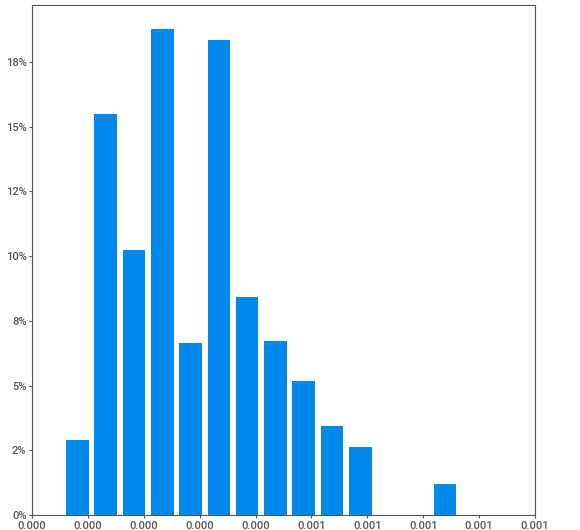
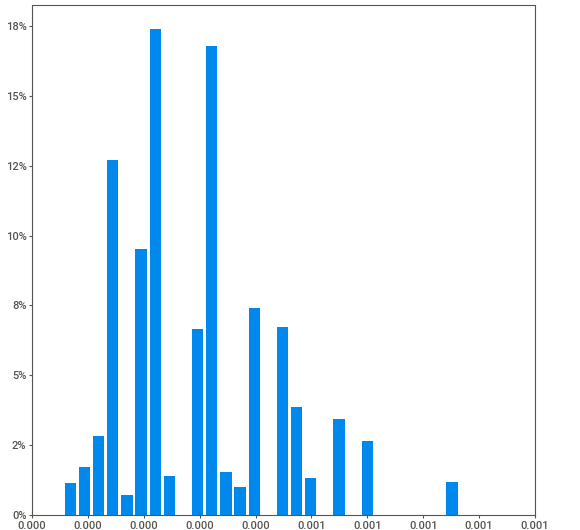
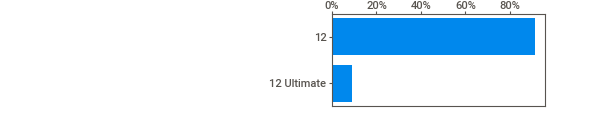
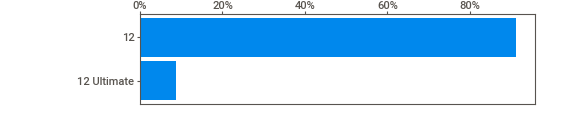
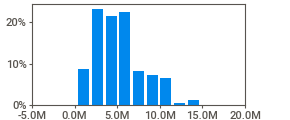
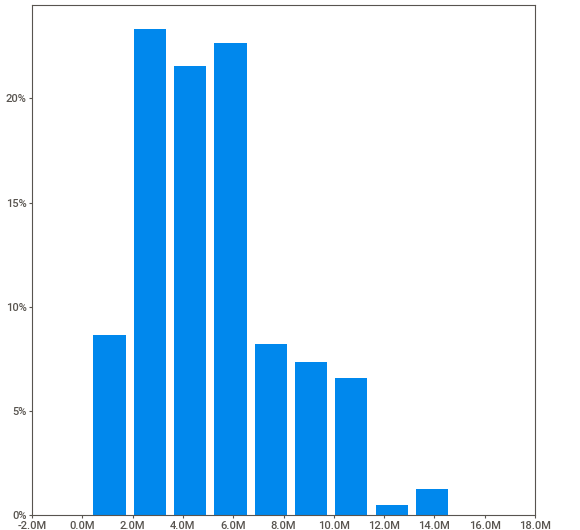
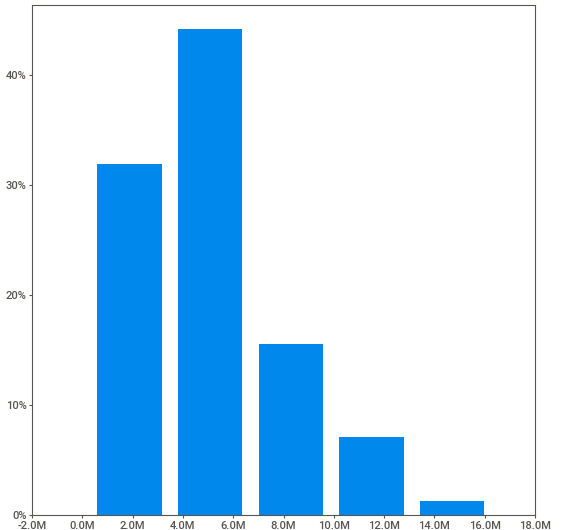
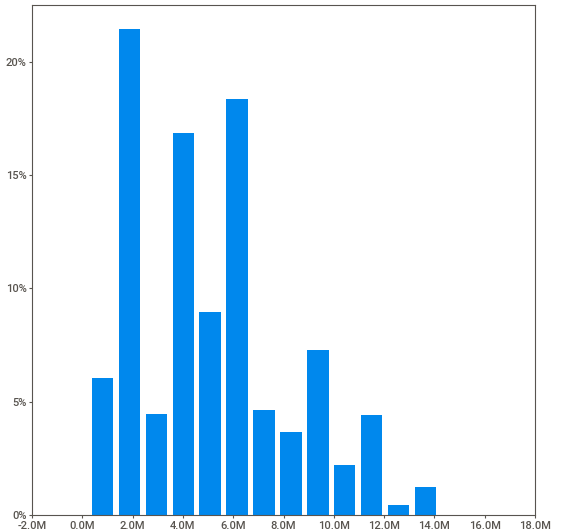
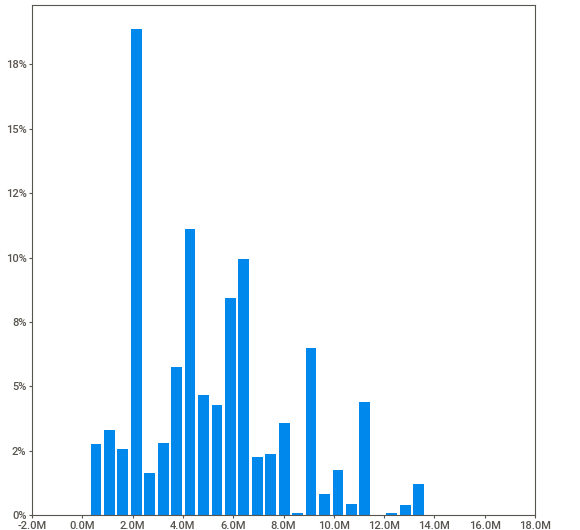
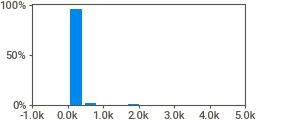
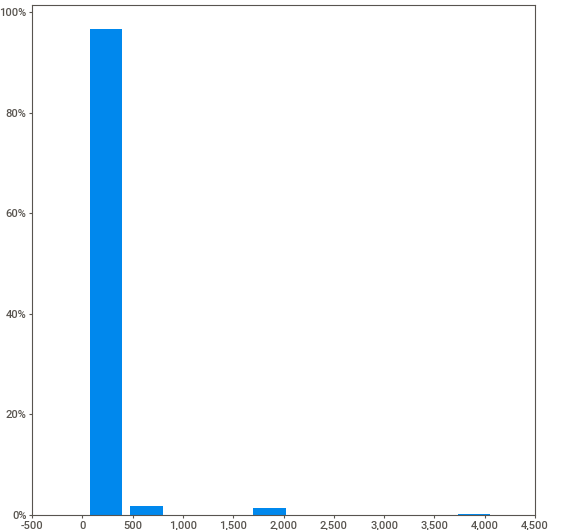
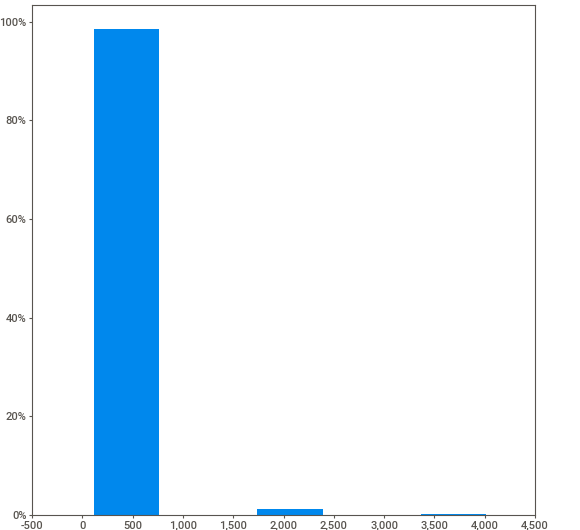
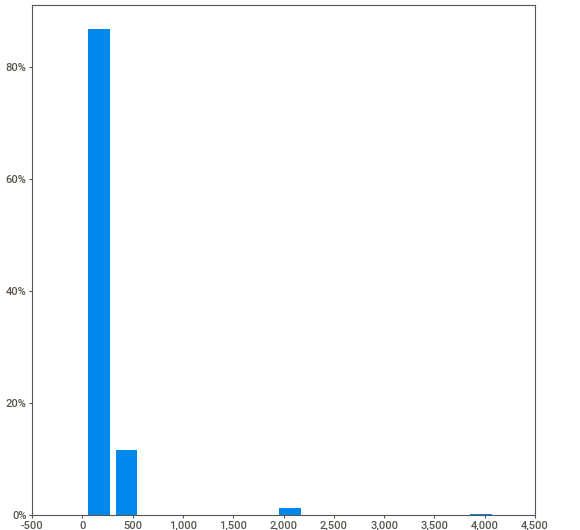
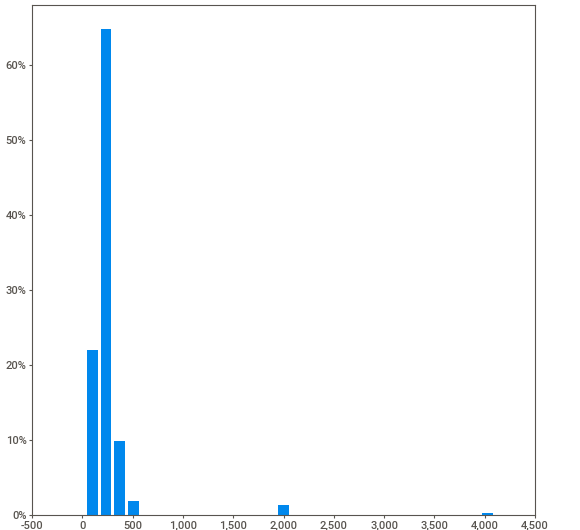
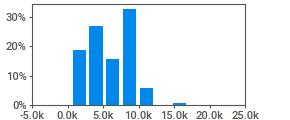
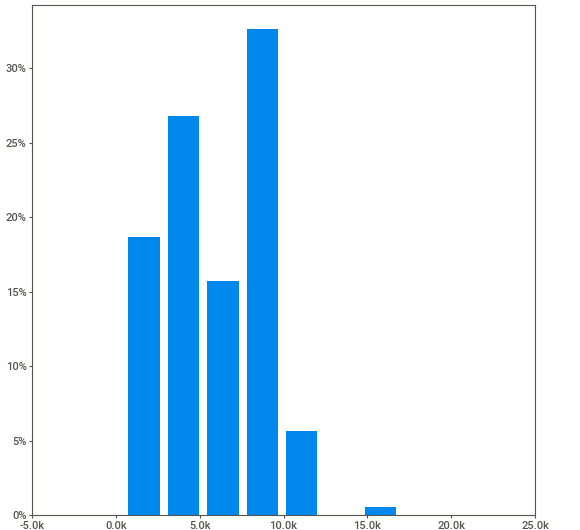
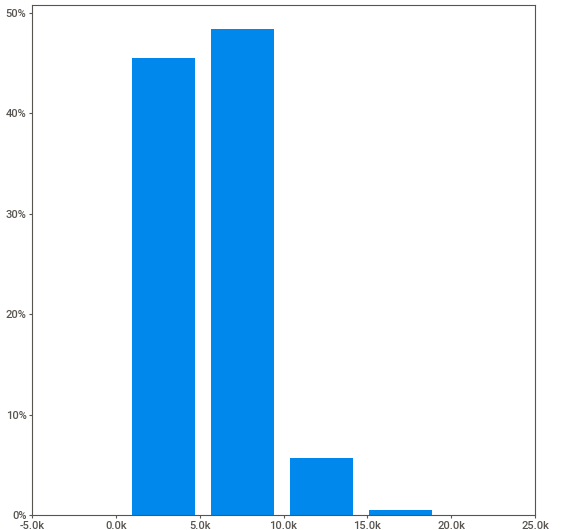
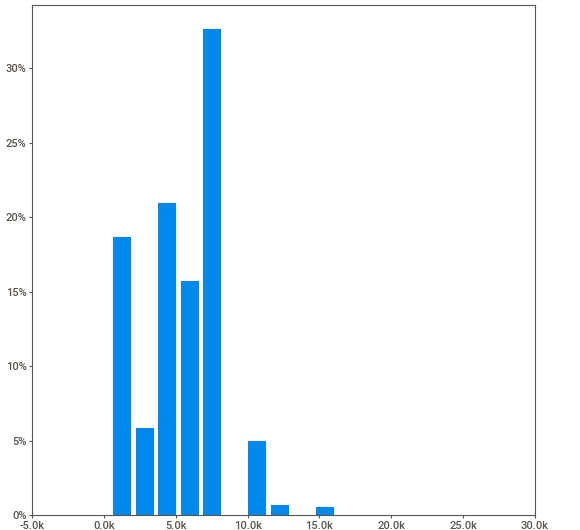
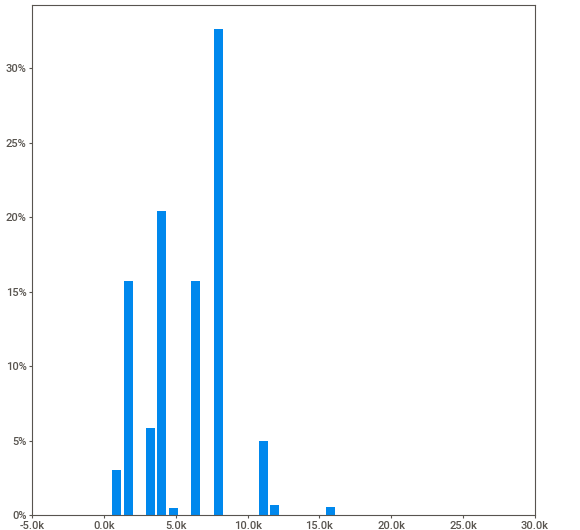
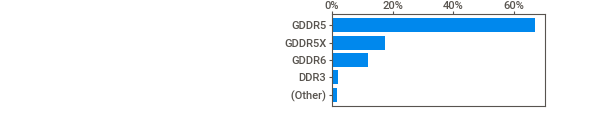
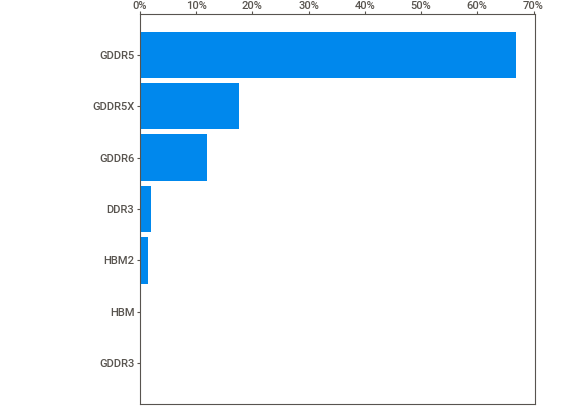
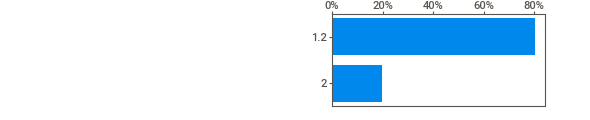
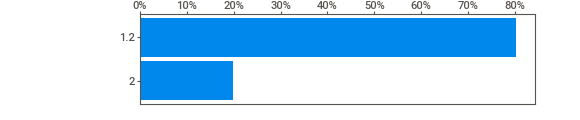
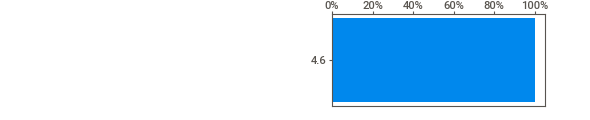
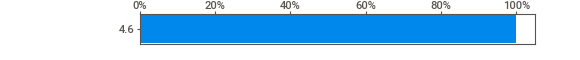
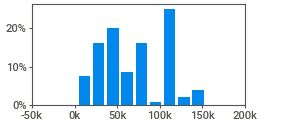
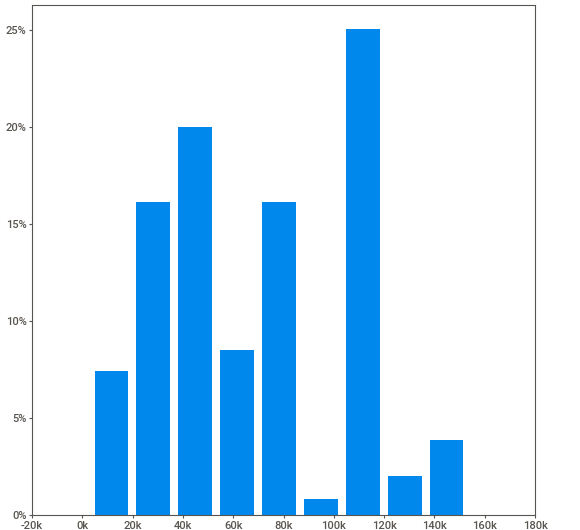
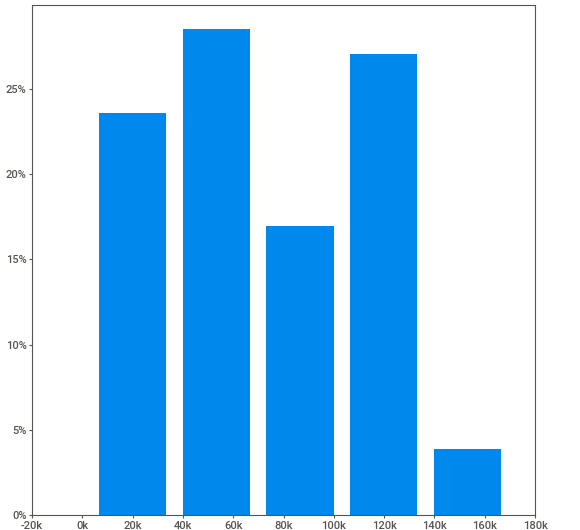
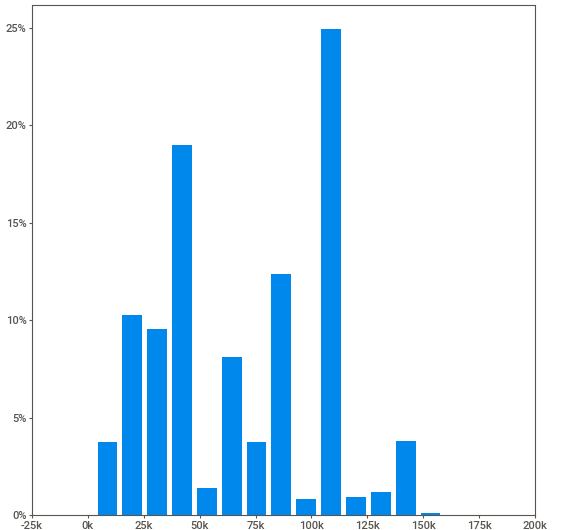
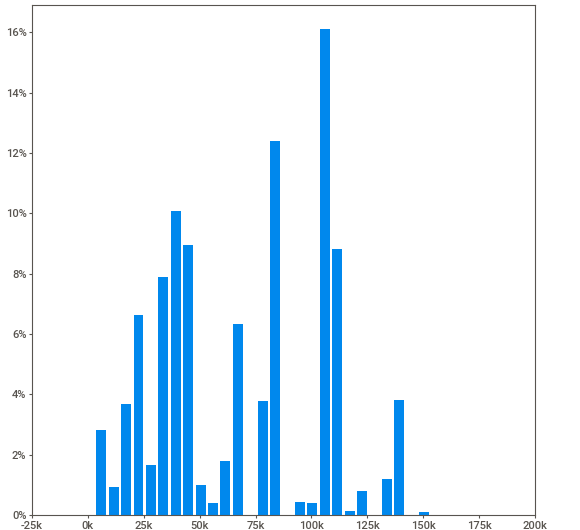
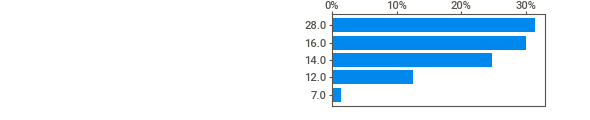
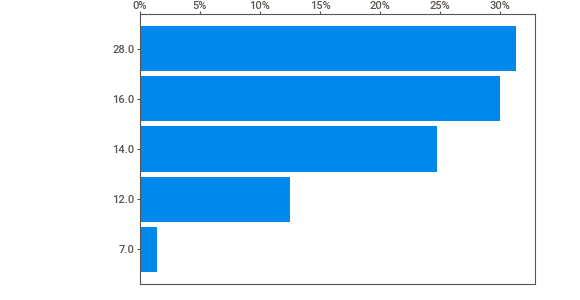
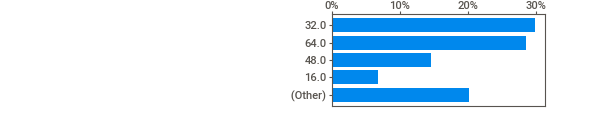
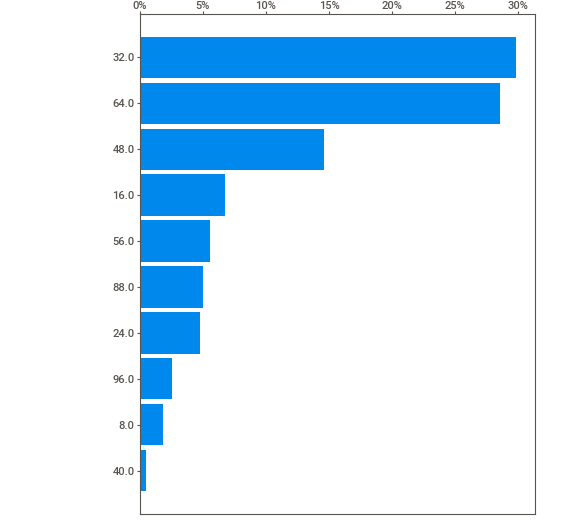
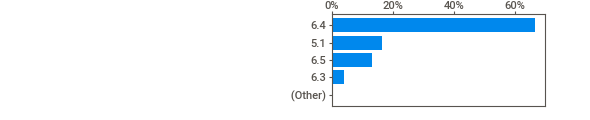
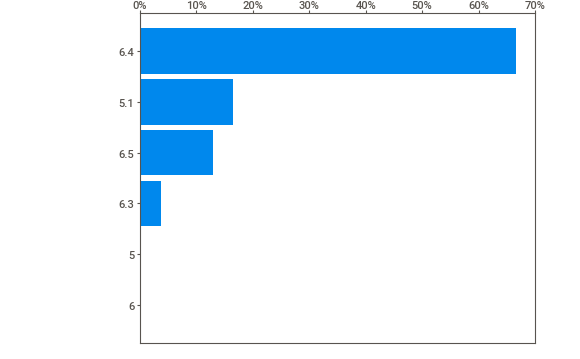
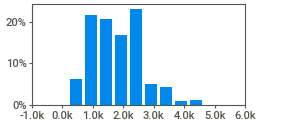
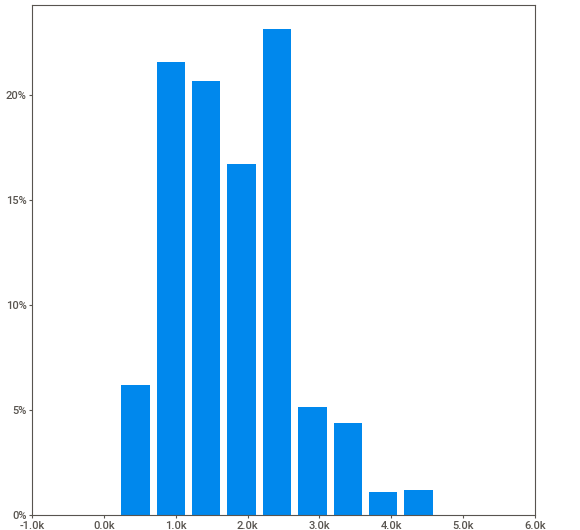
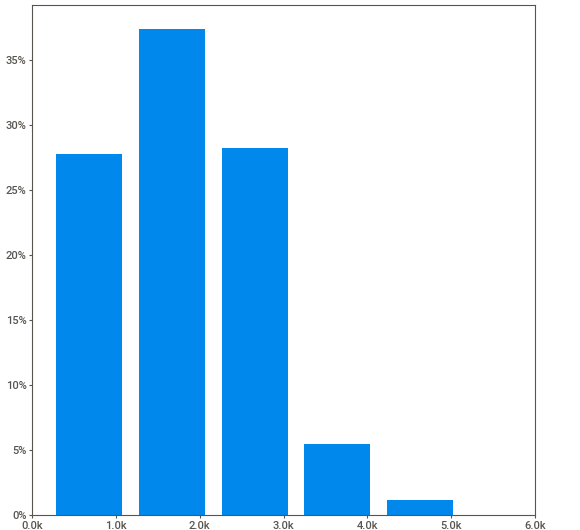
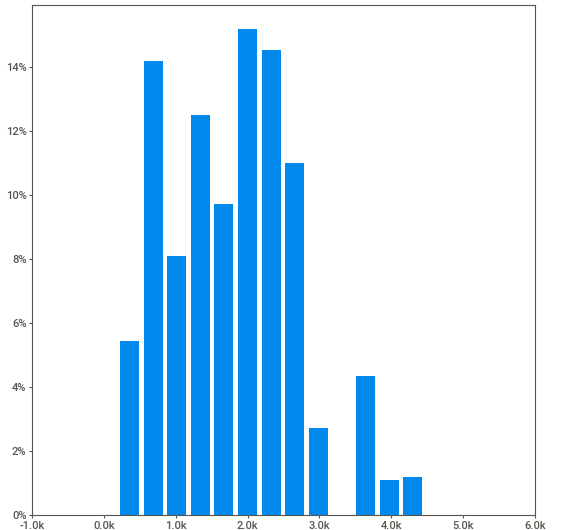
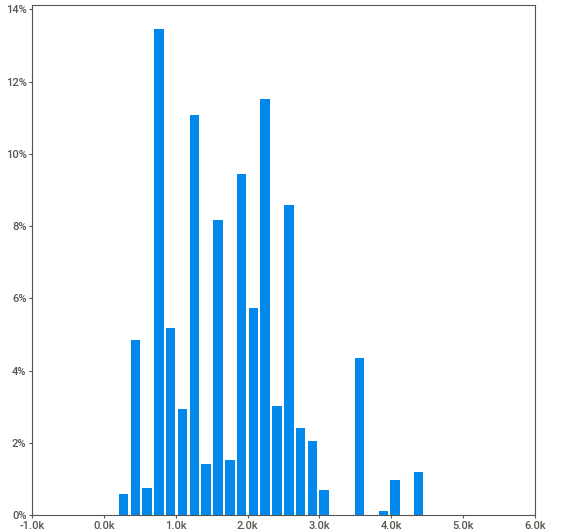
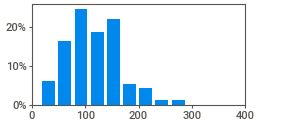
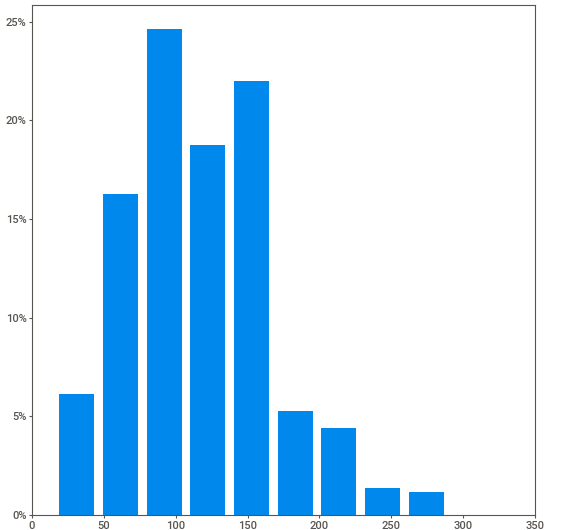
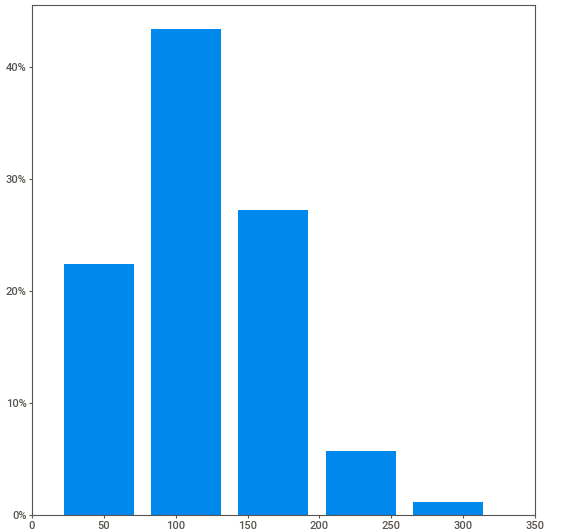
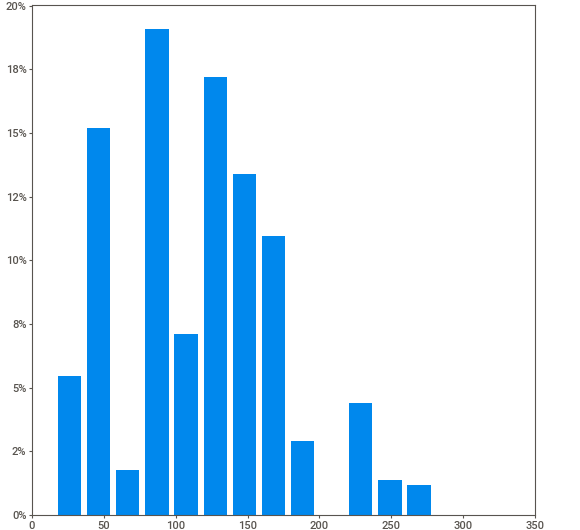
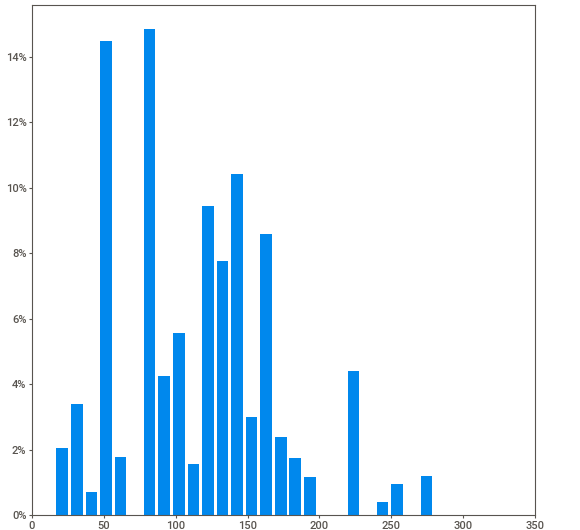
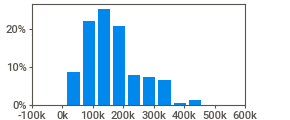
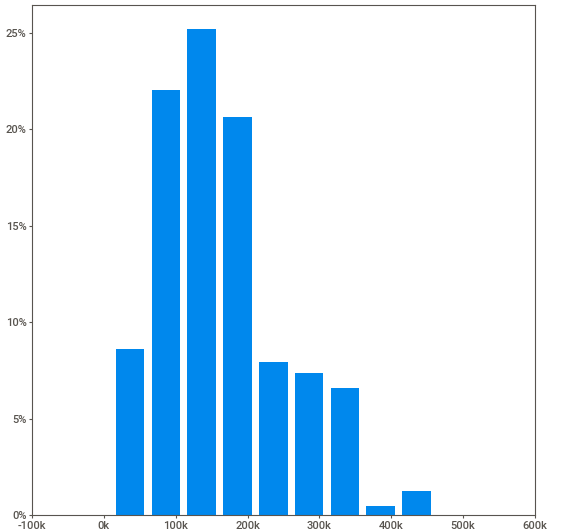
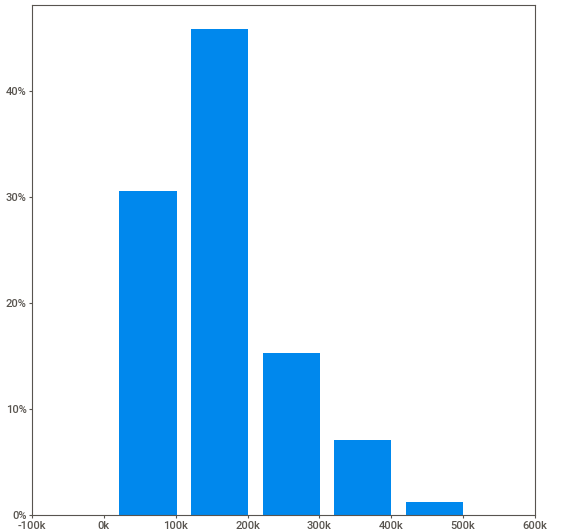
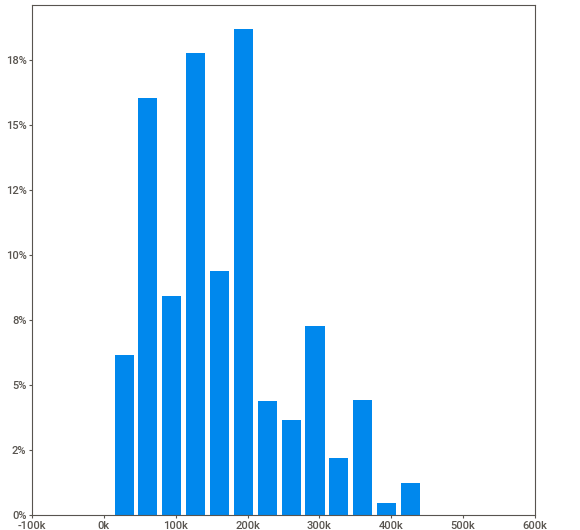
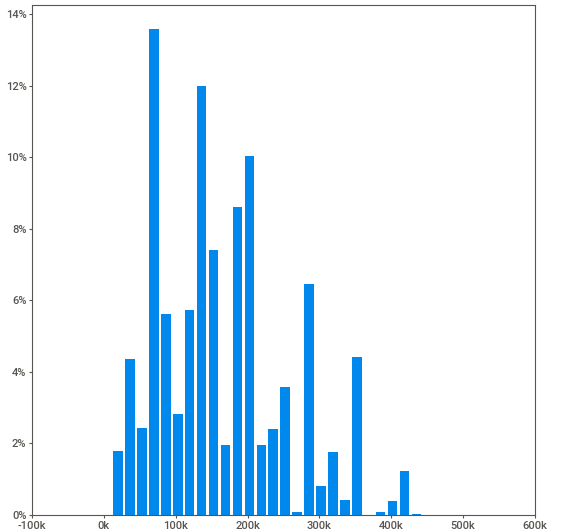
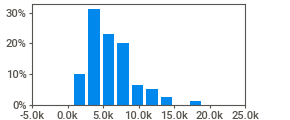
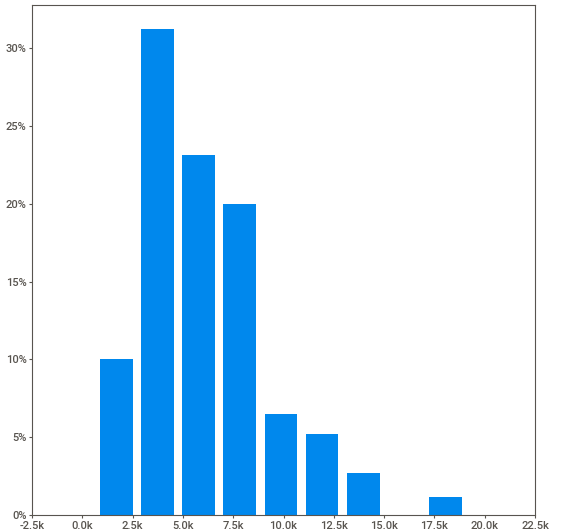
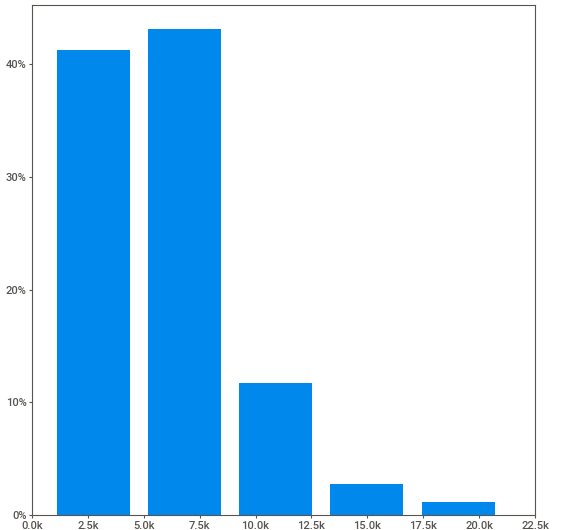
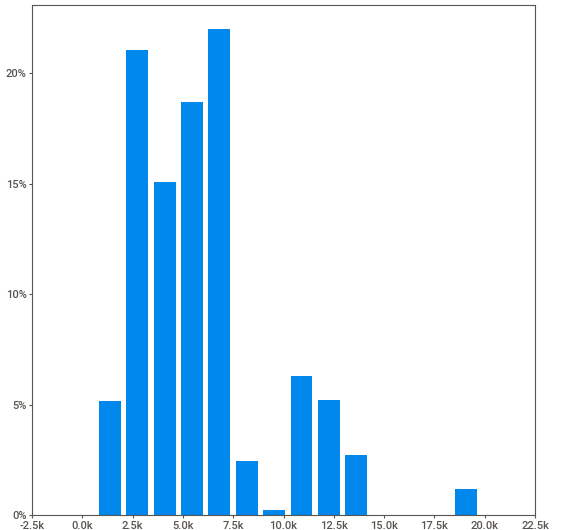
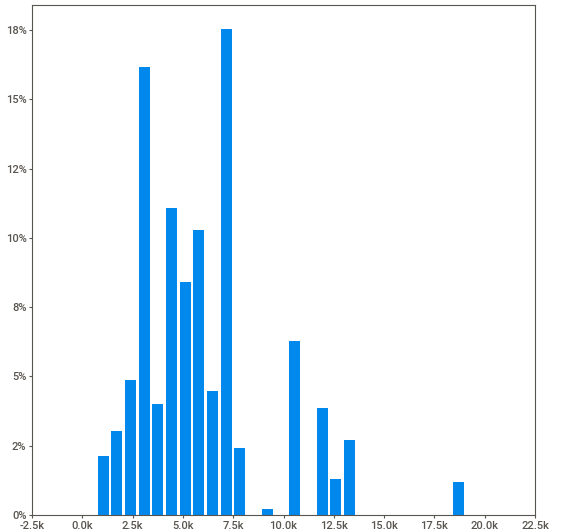
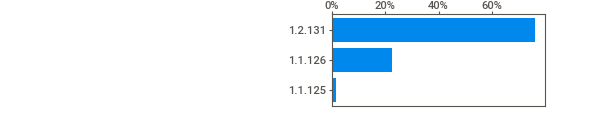
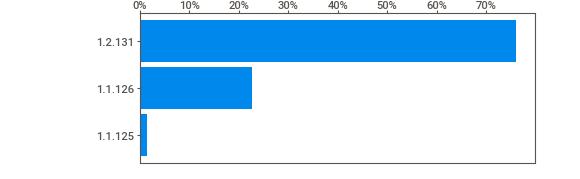
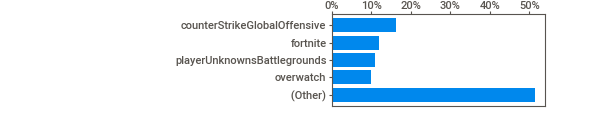
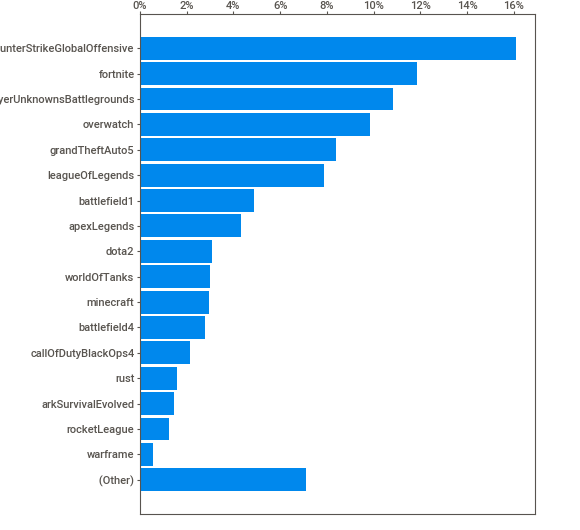
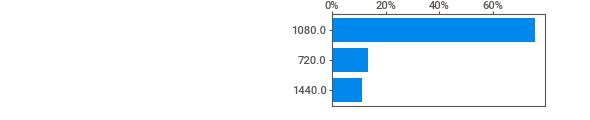
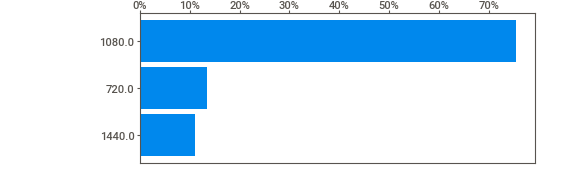
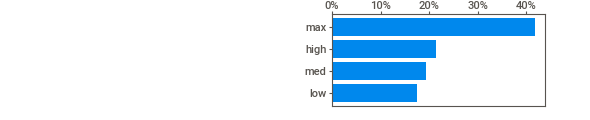
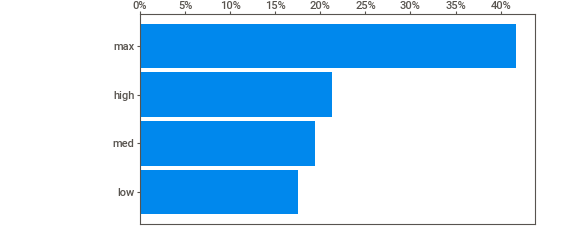
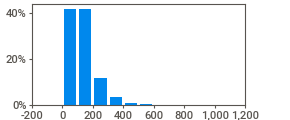
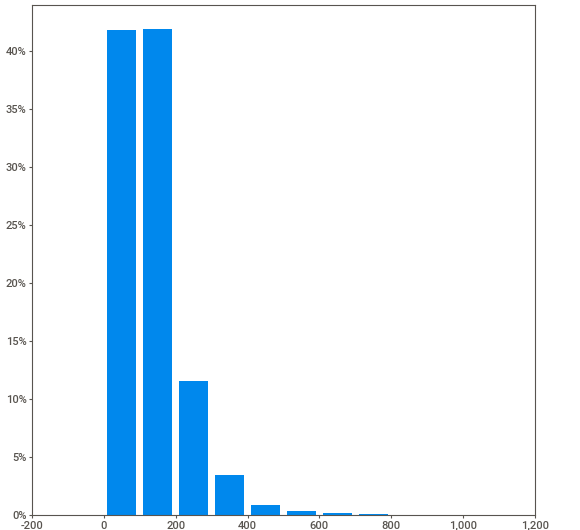
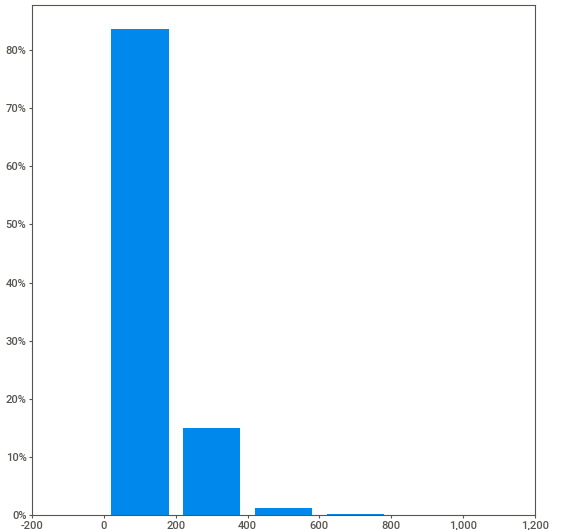
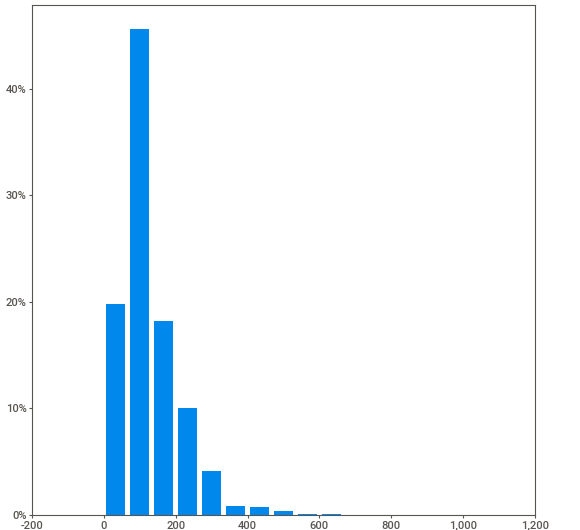
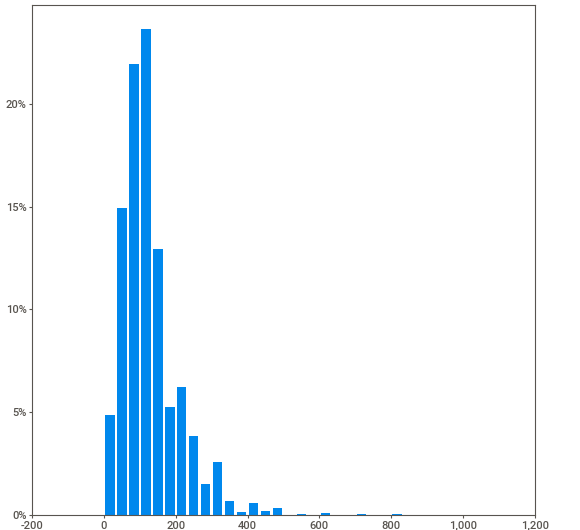
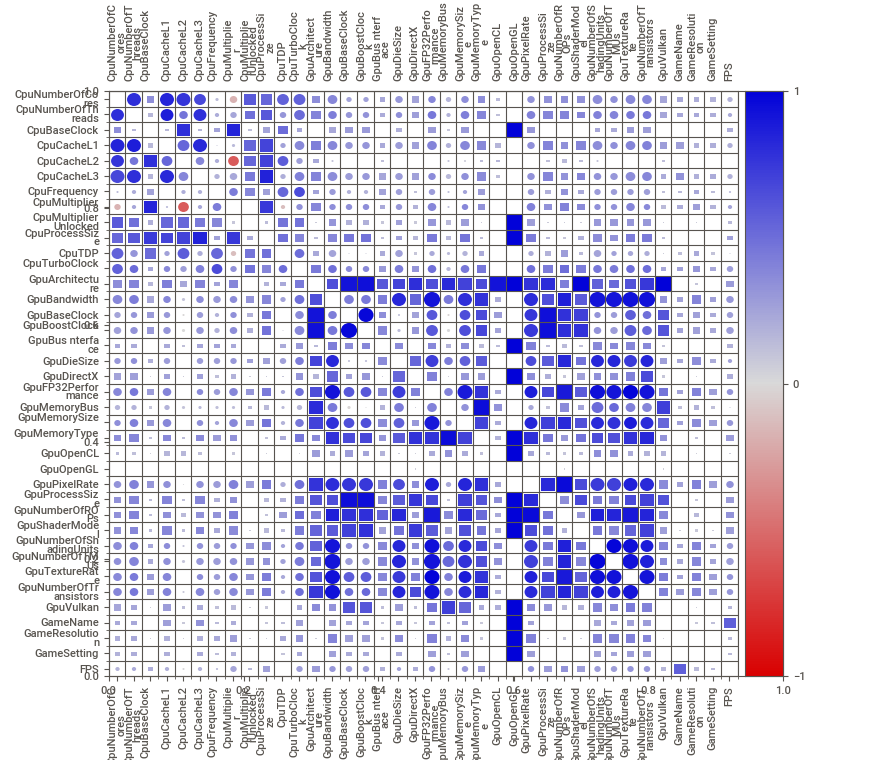
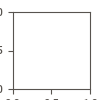

In [71]:
clean_report.show_notebook()